In [2]:
import pandas as pd
import matplotlib.pyplot as plt
excel_file = "/Users/nargeshosseinzadeh/Downloads/Dataset (2).csv"
data = pd.read_csv(excel_file)

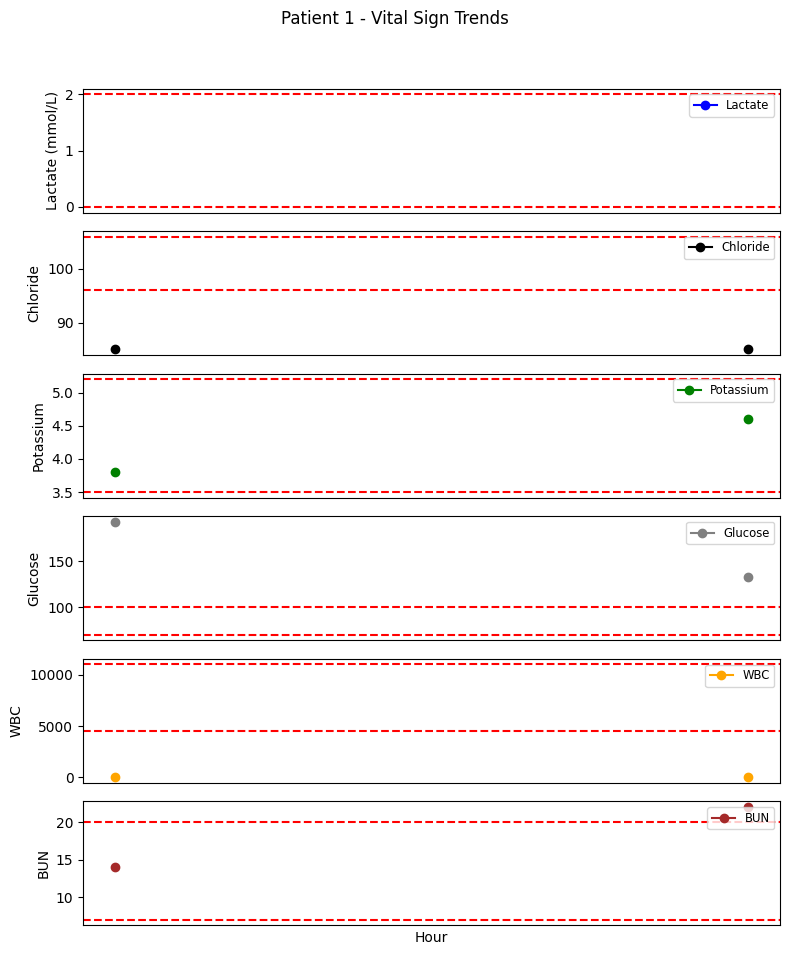

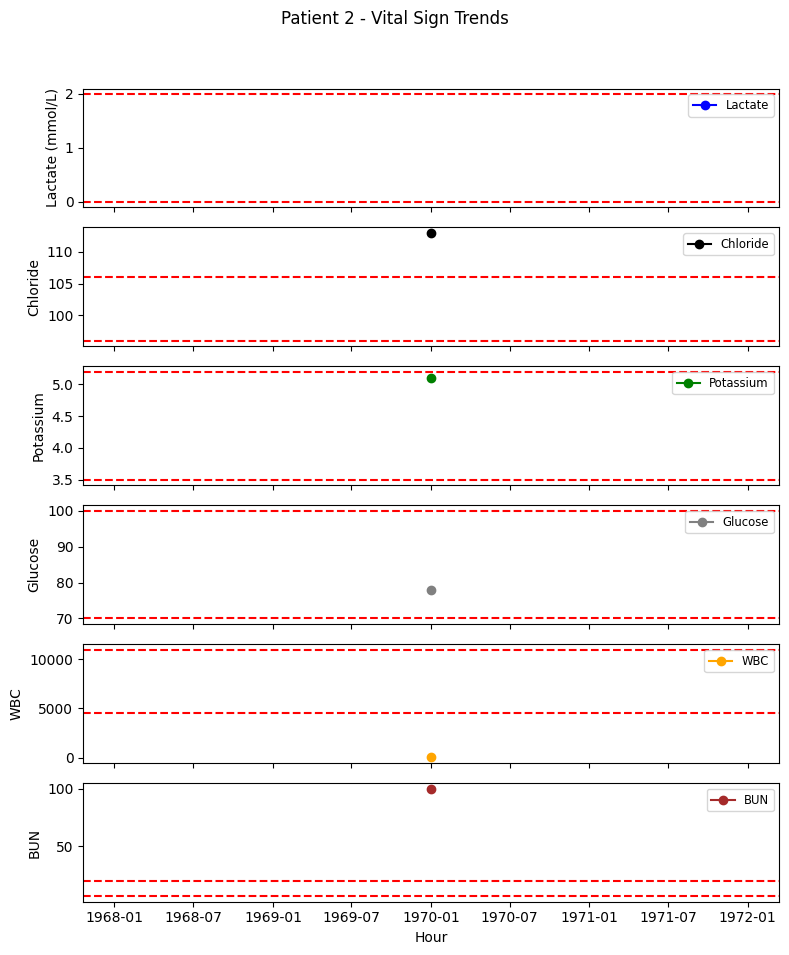

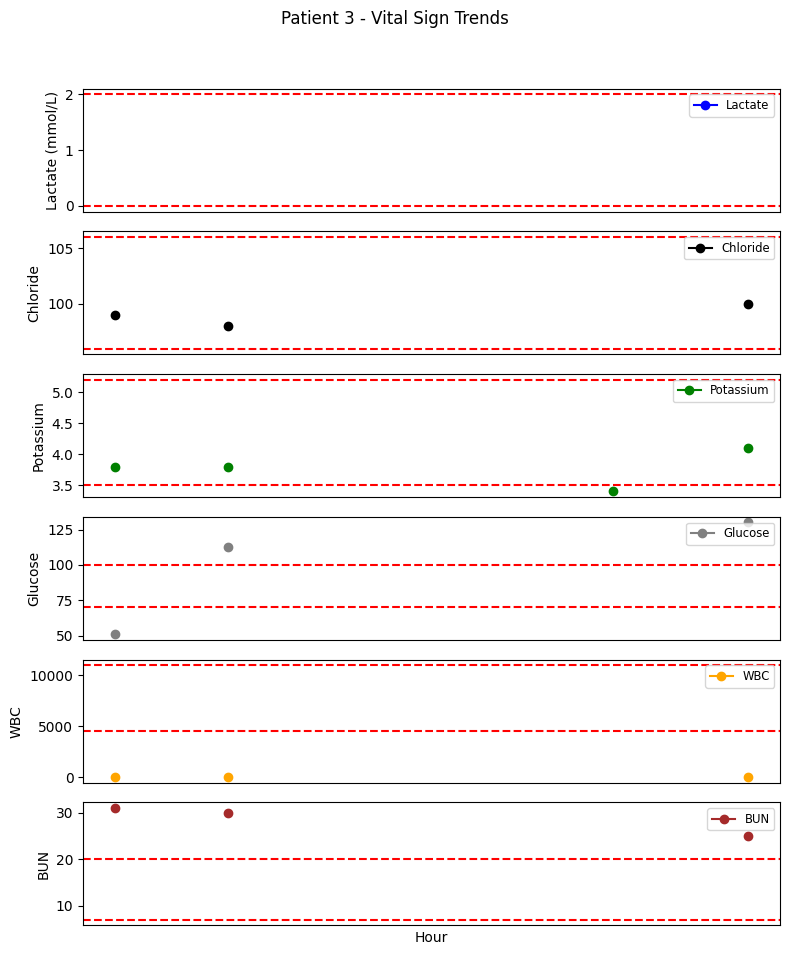

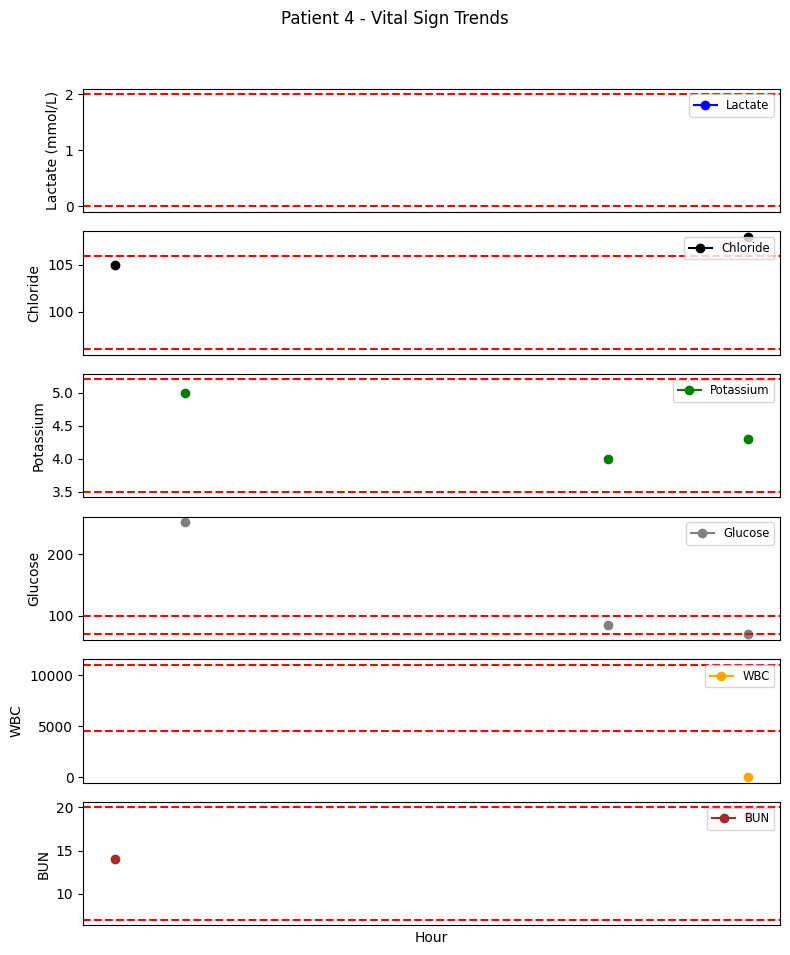

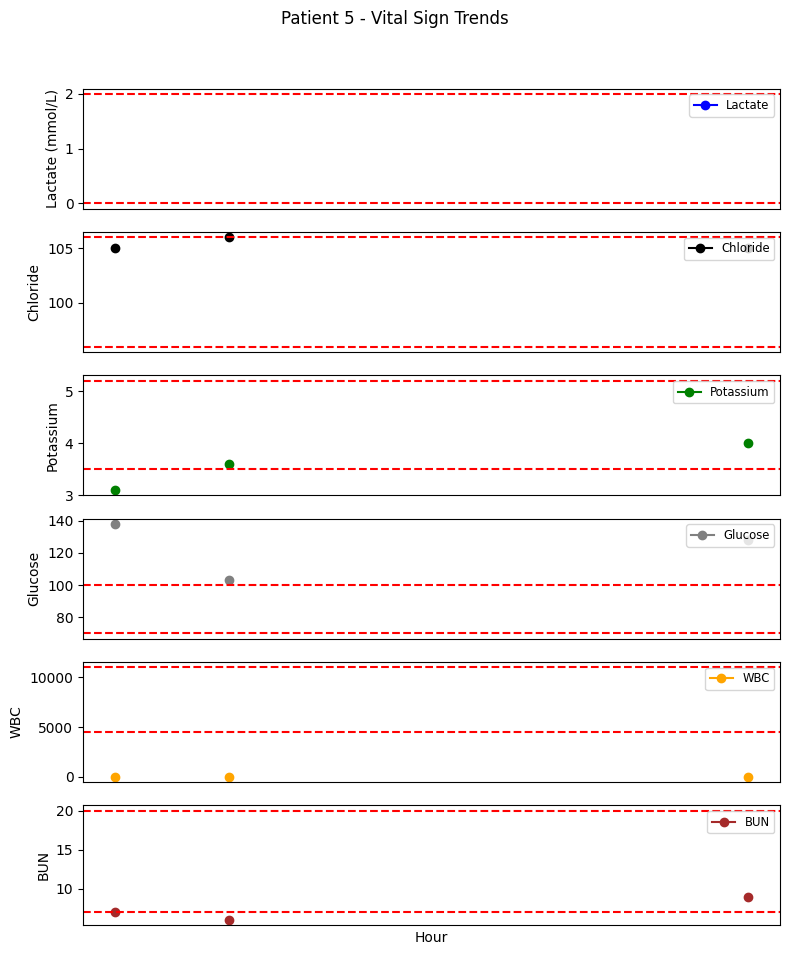

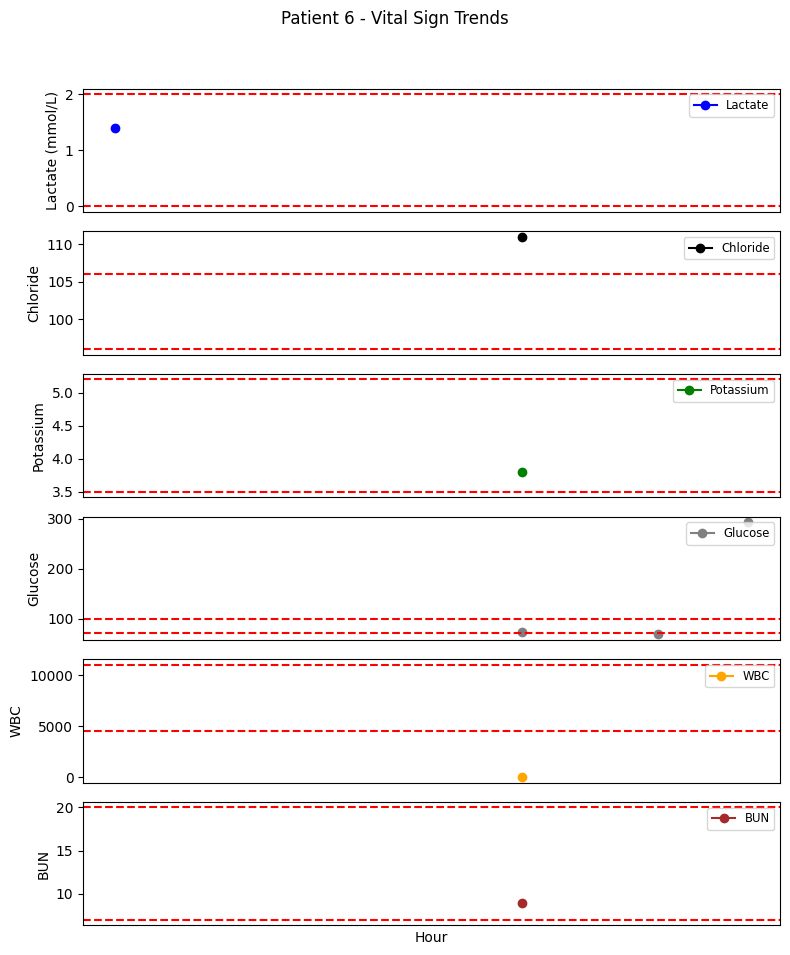

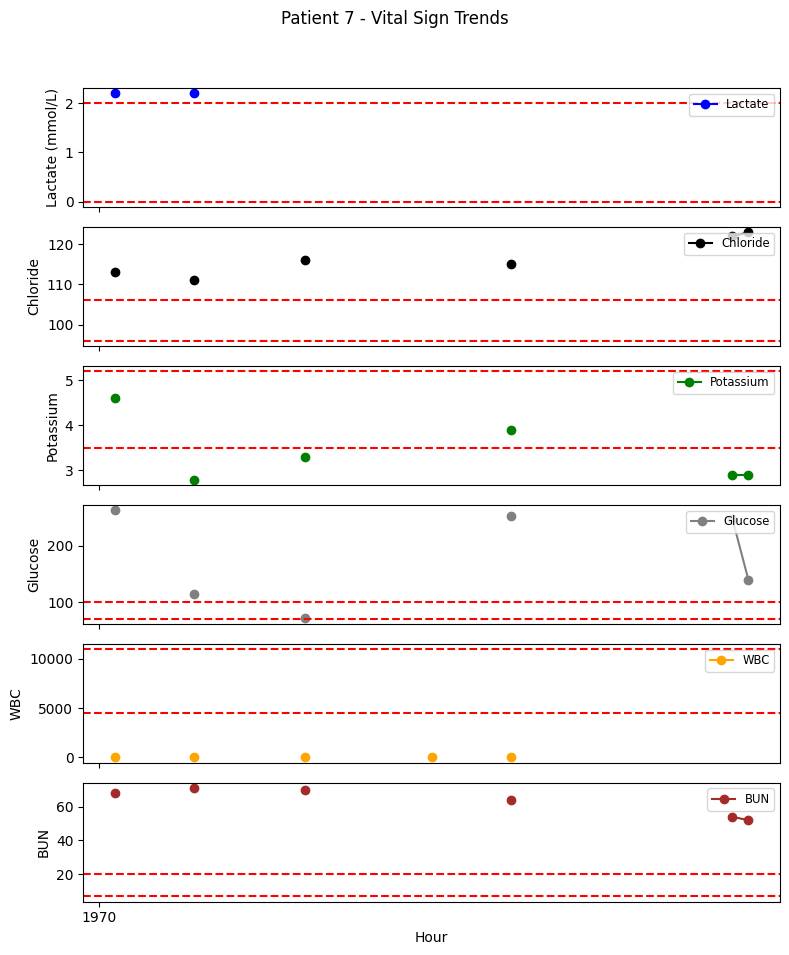

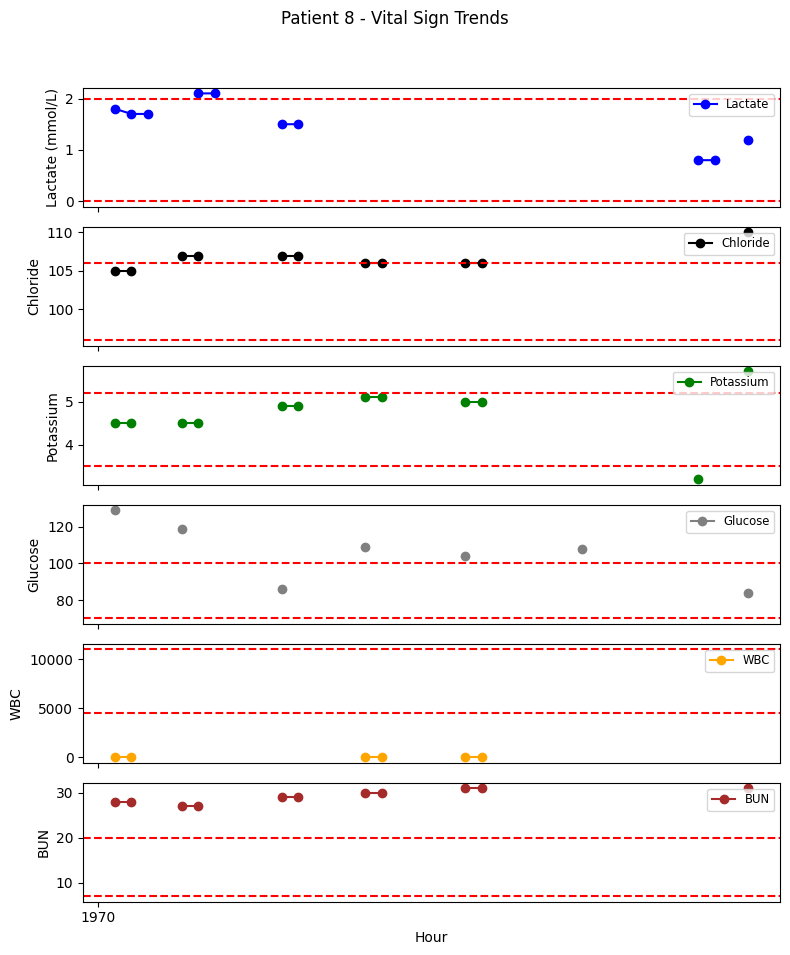

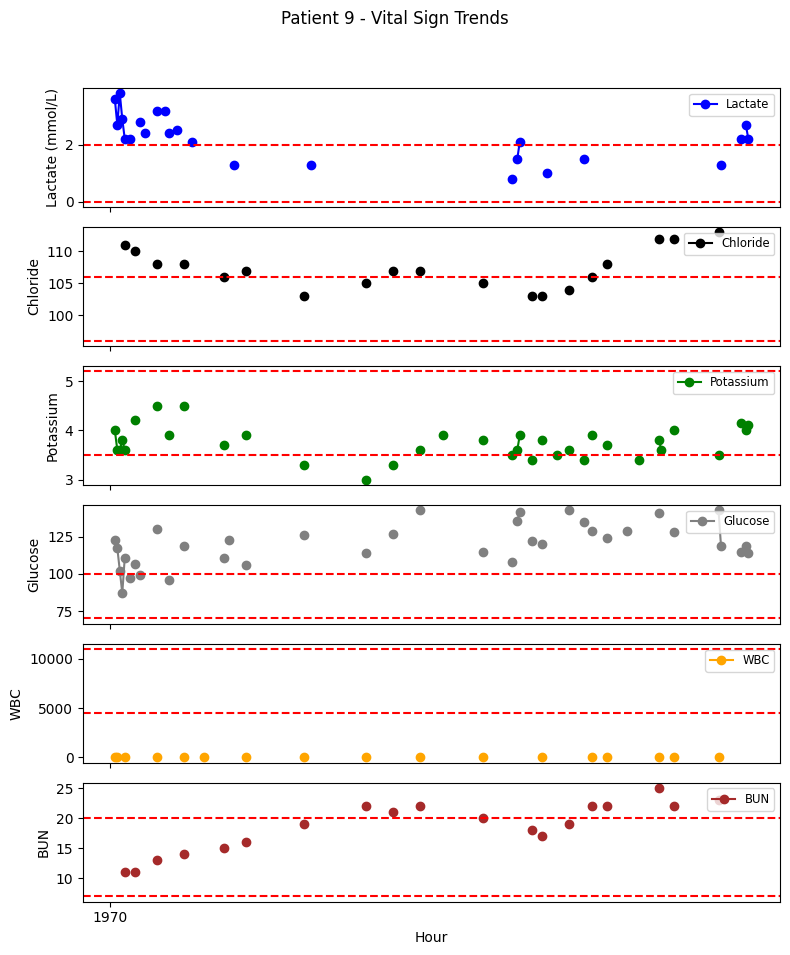

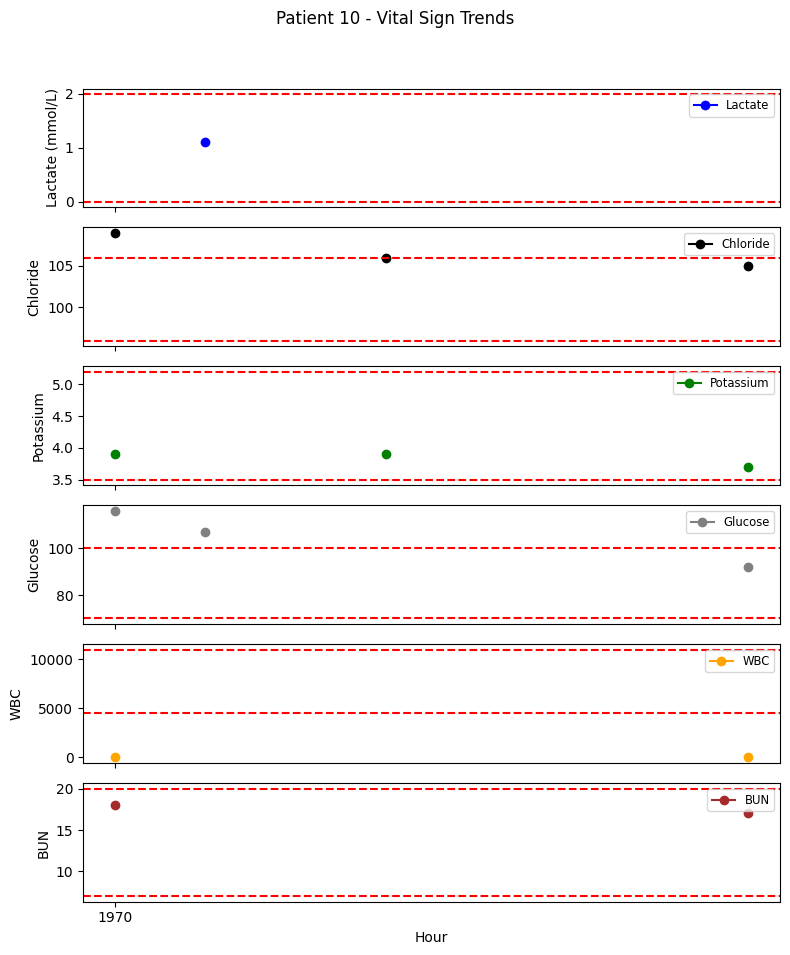

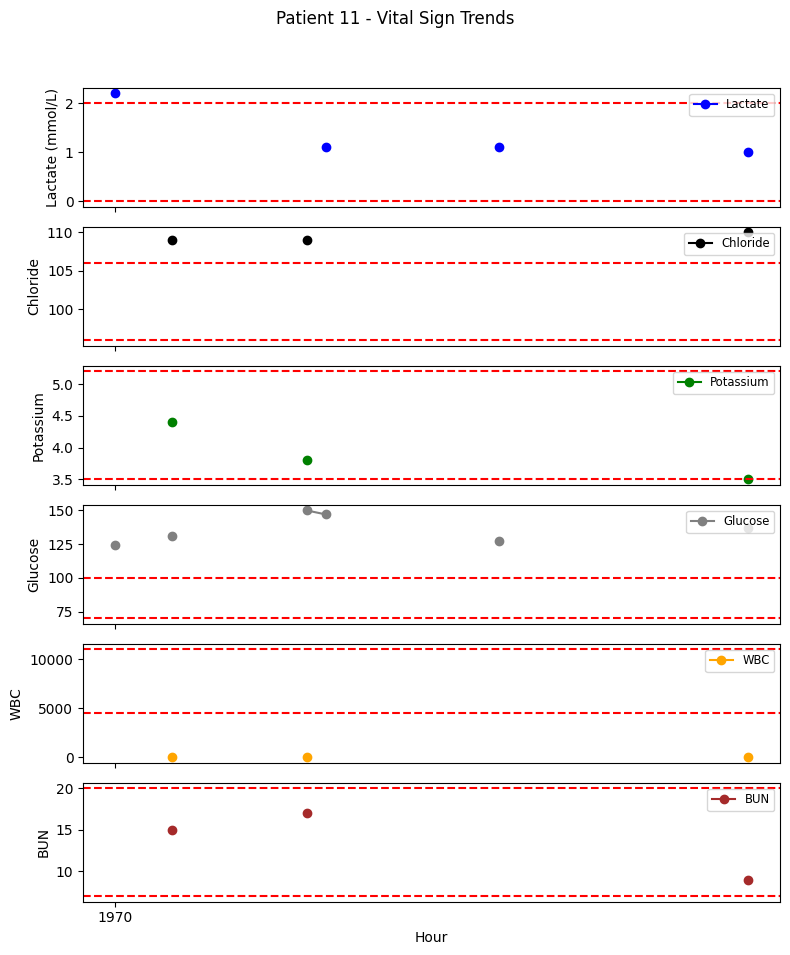

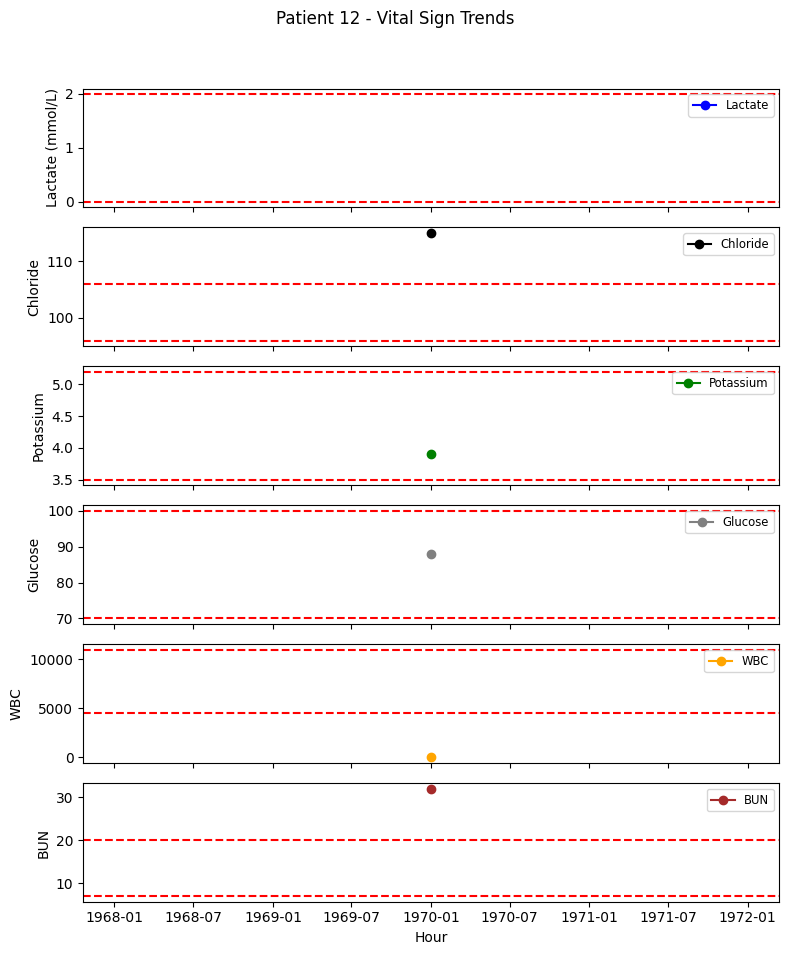

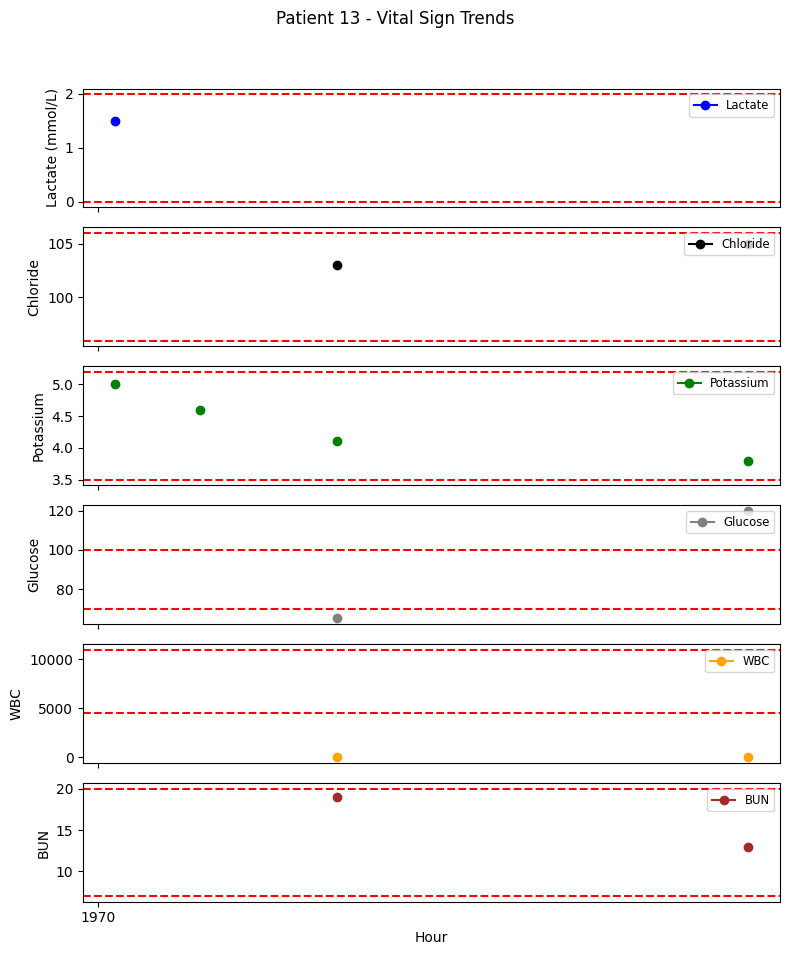

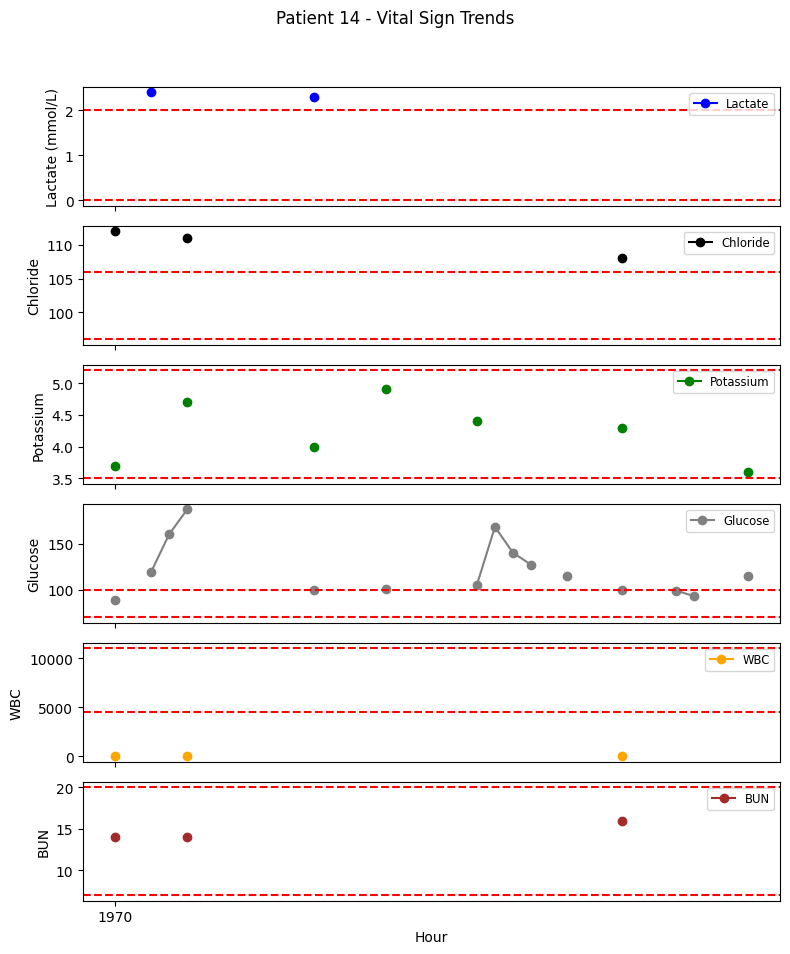

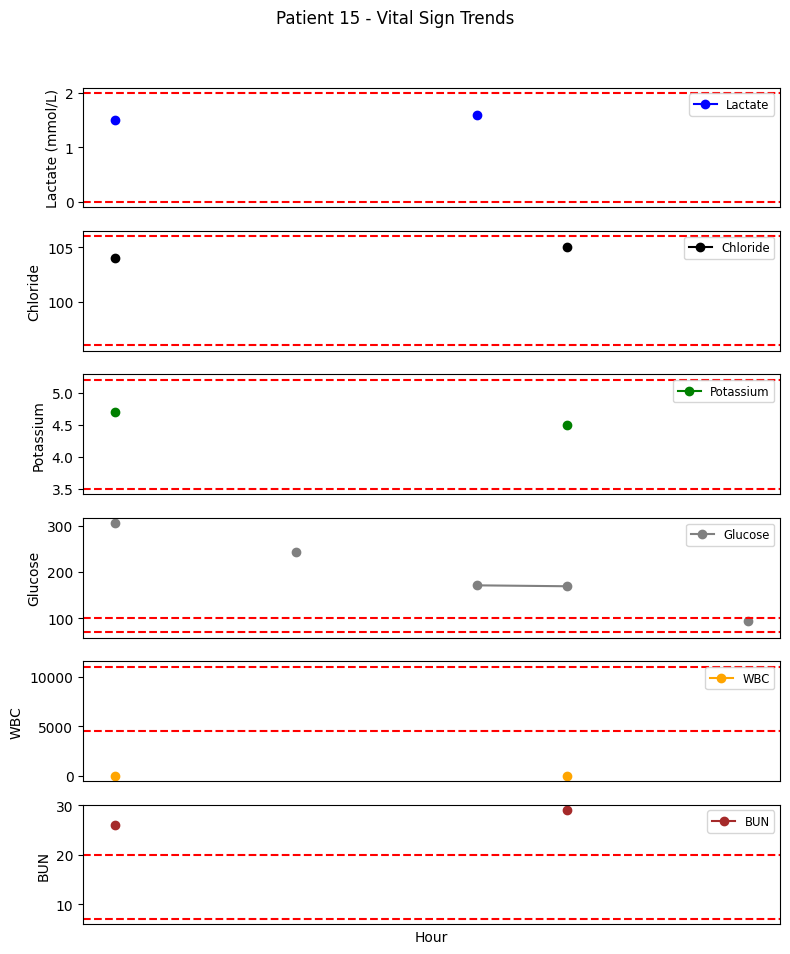

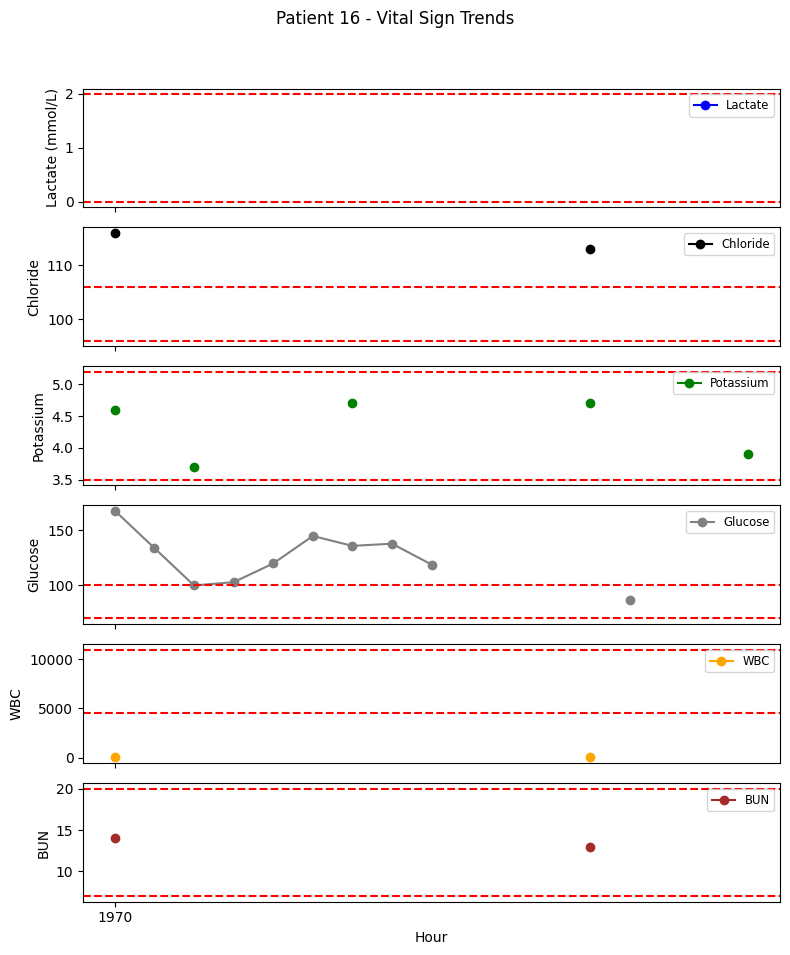

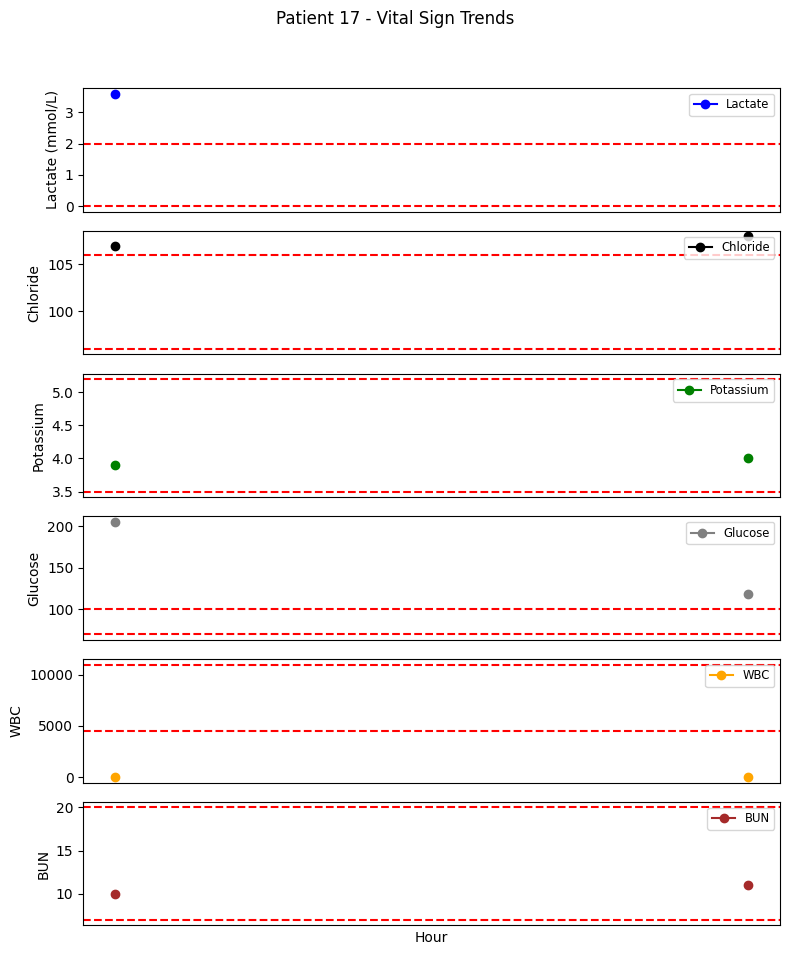

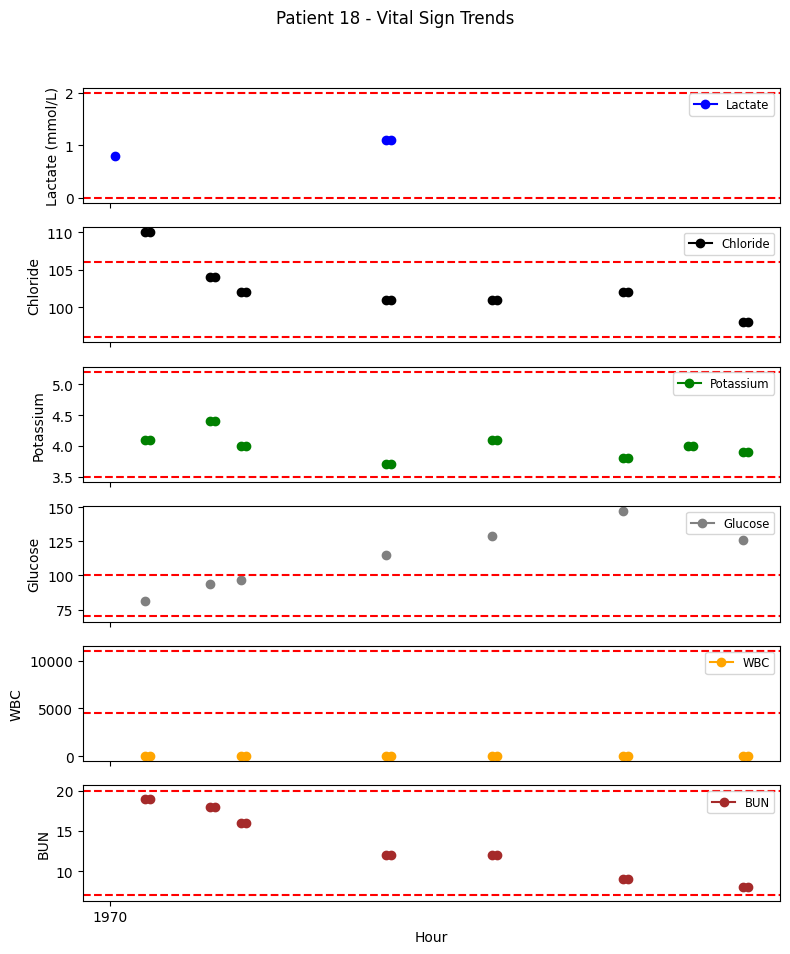

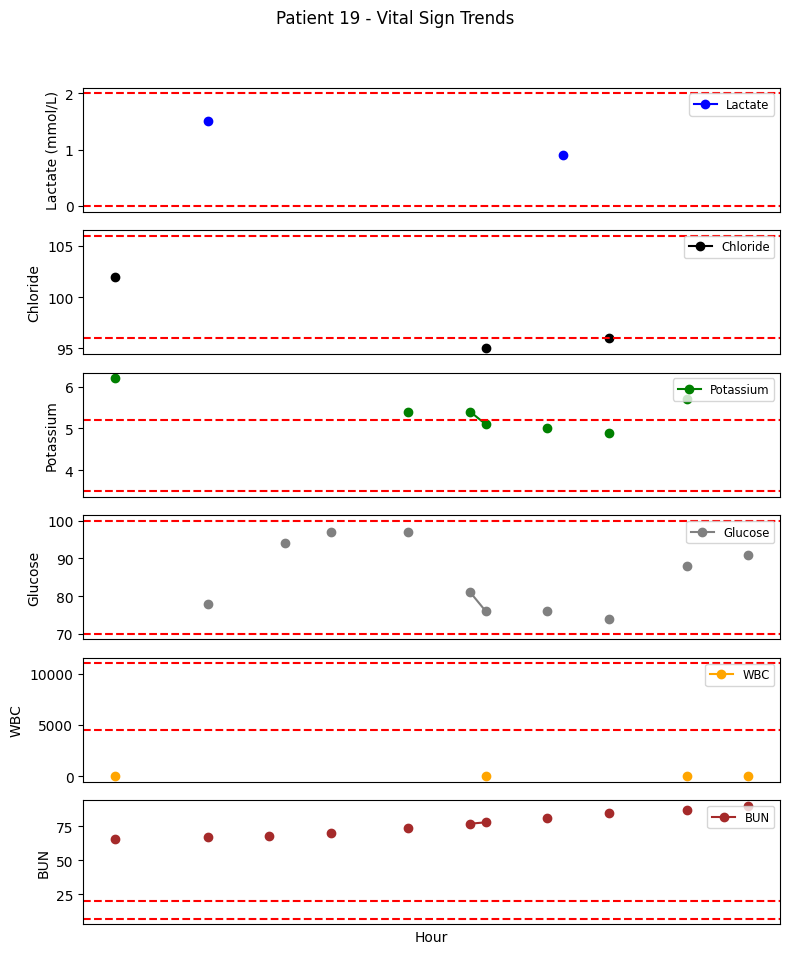

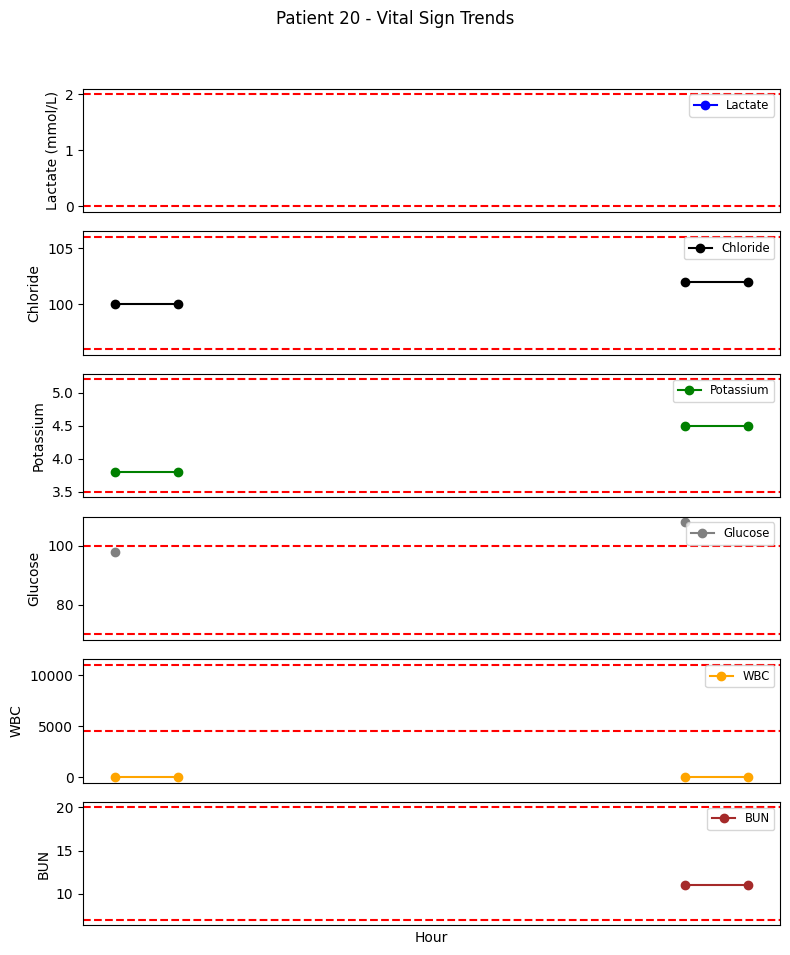

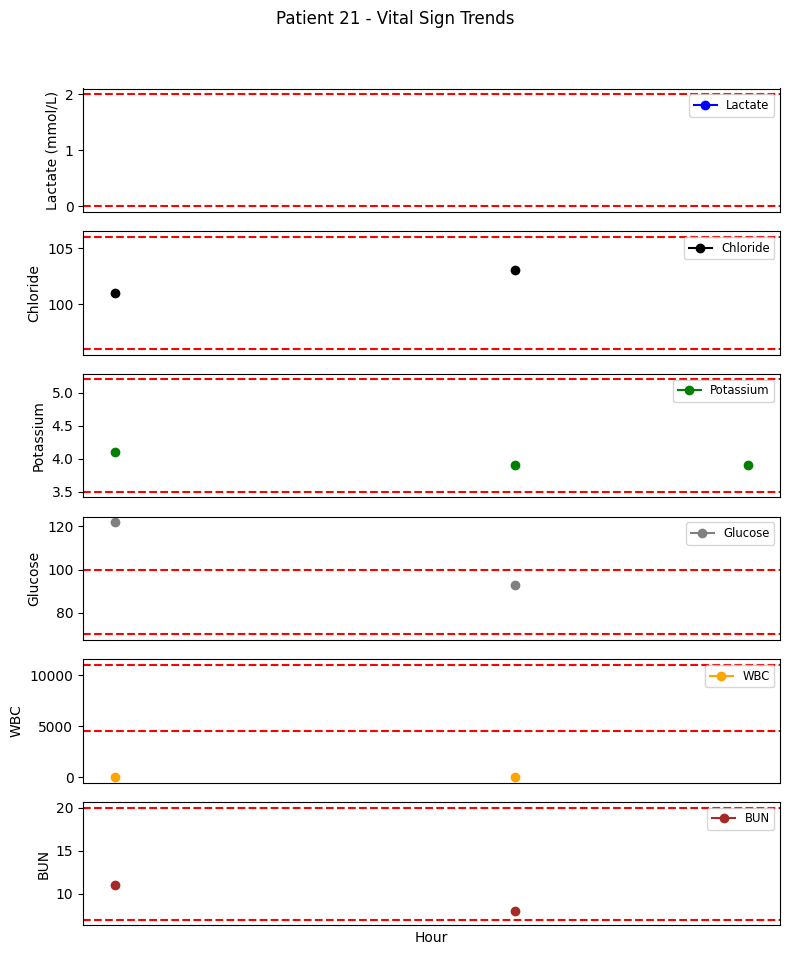

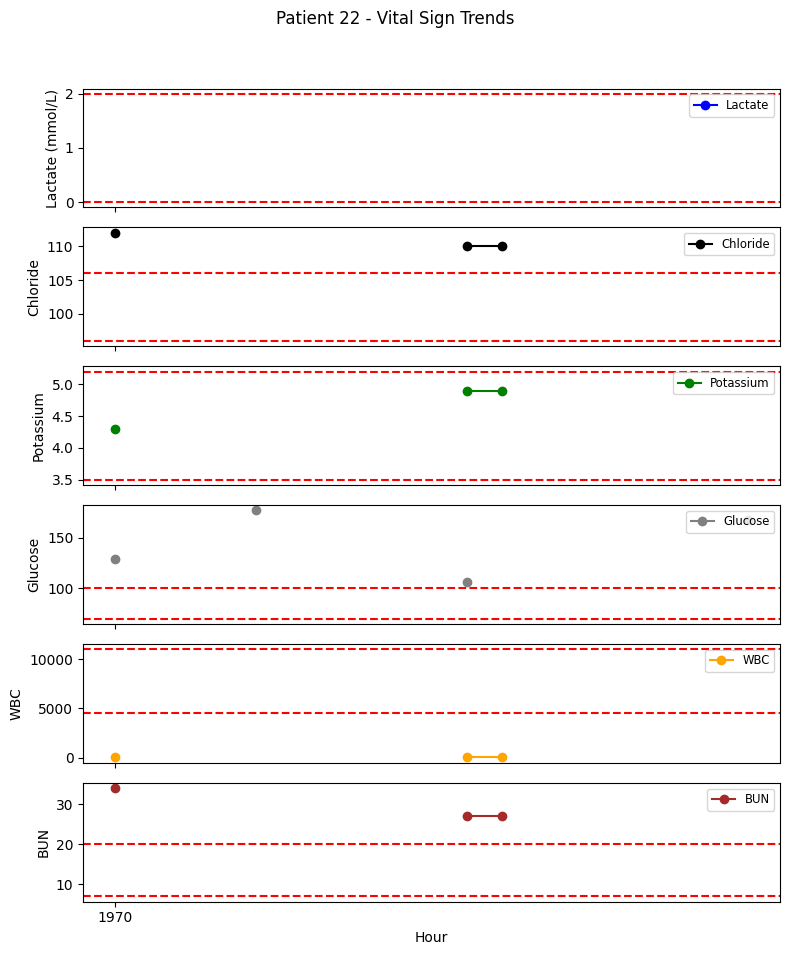

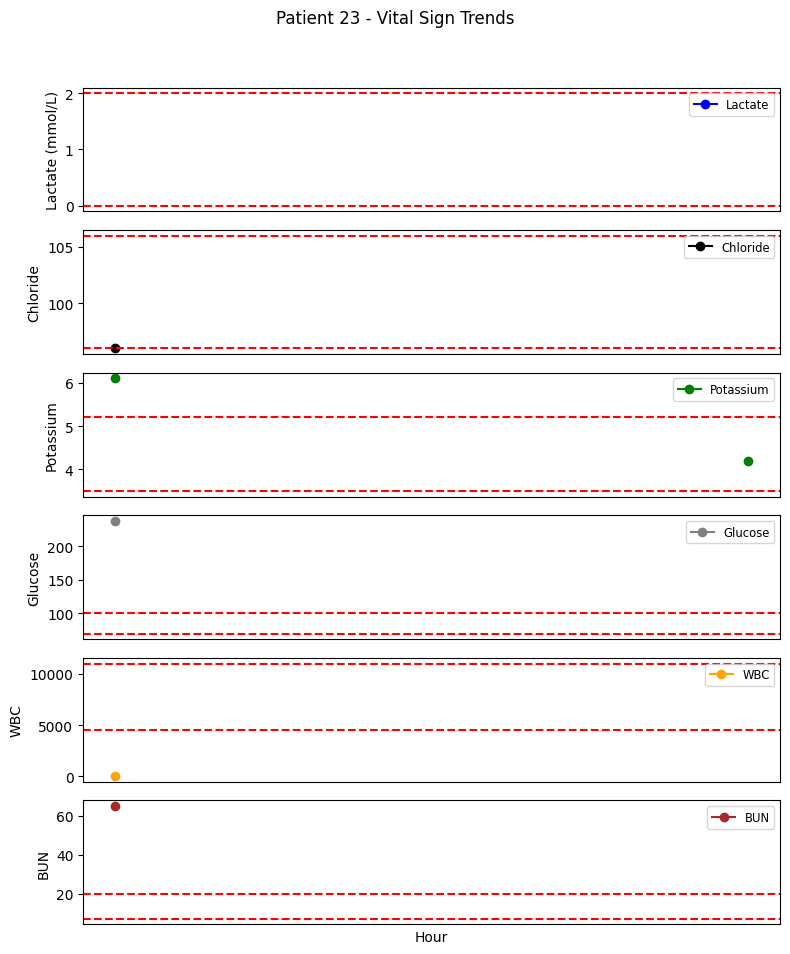

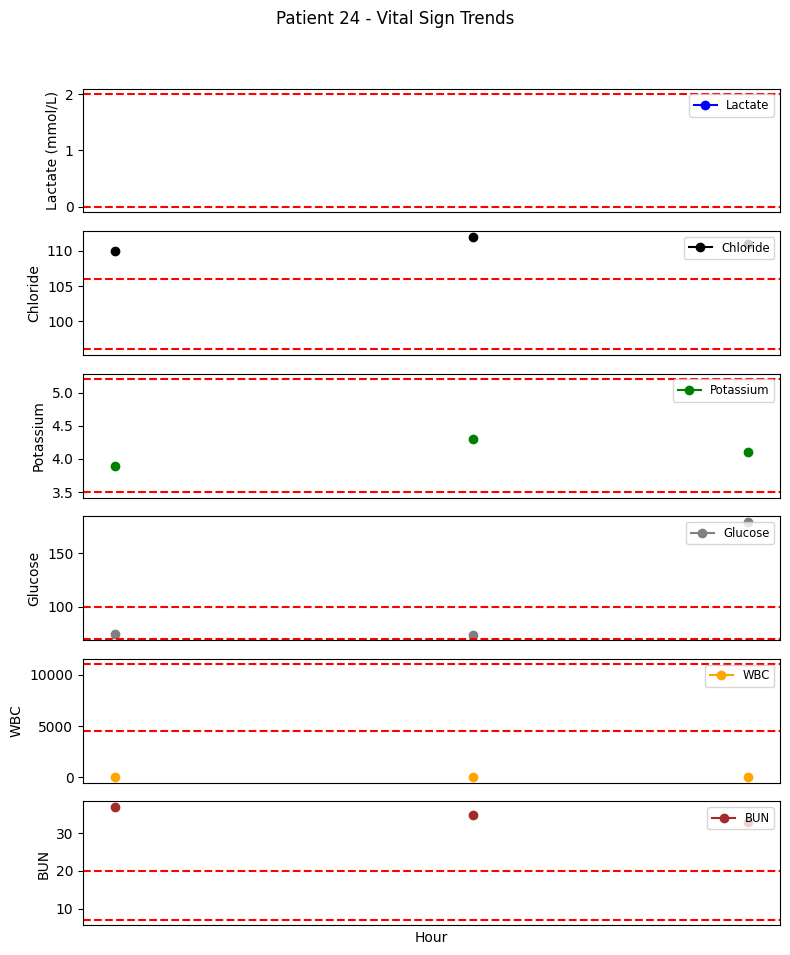

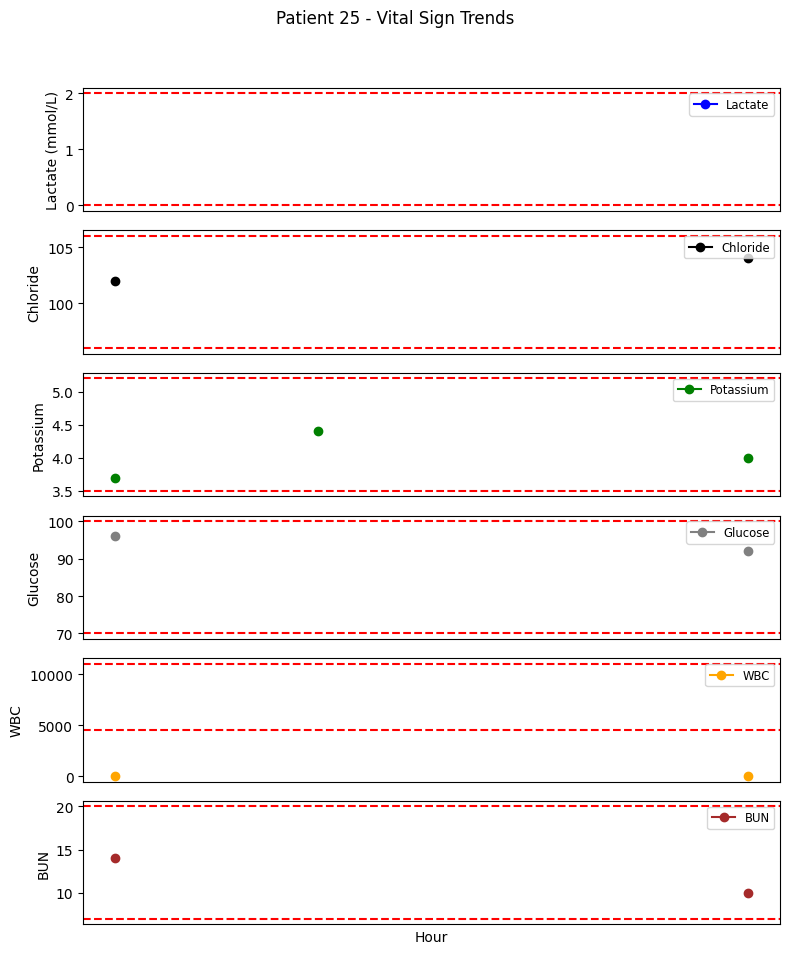

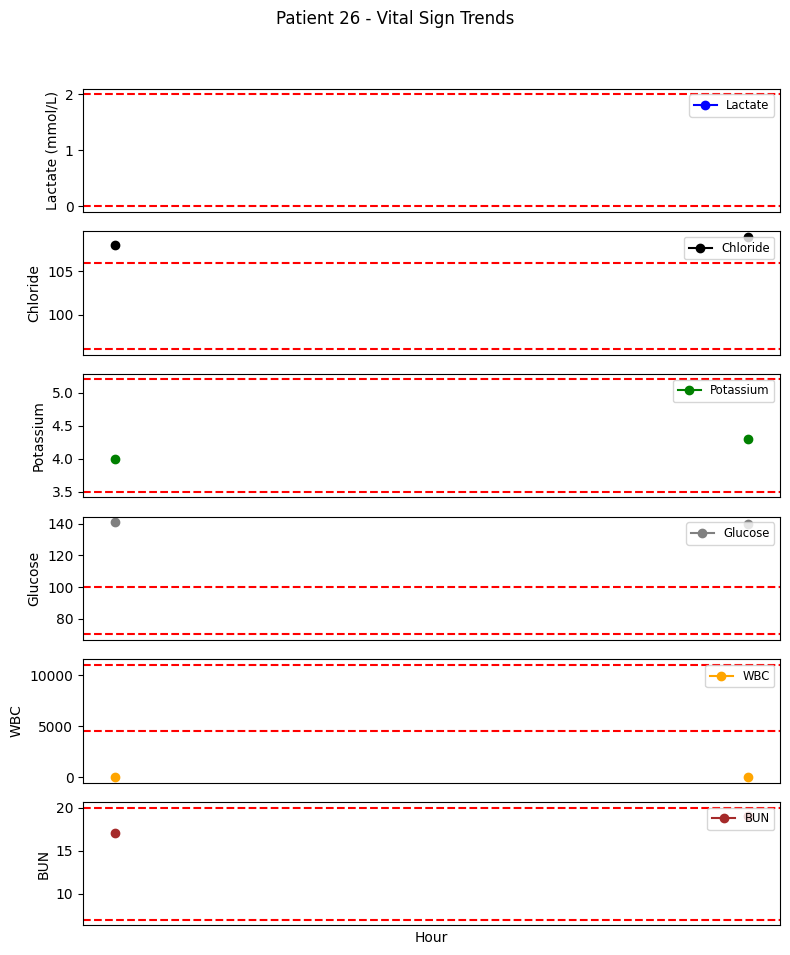

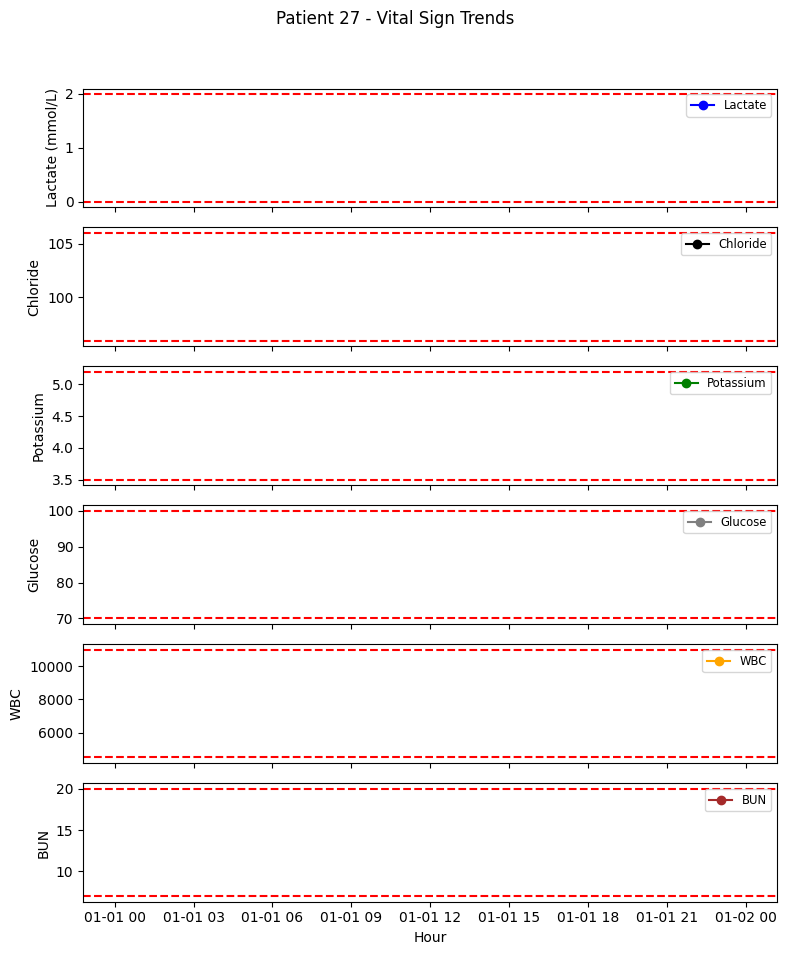

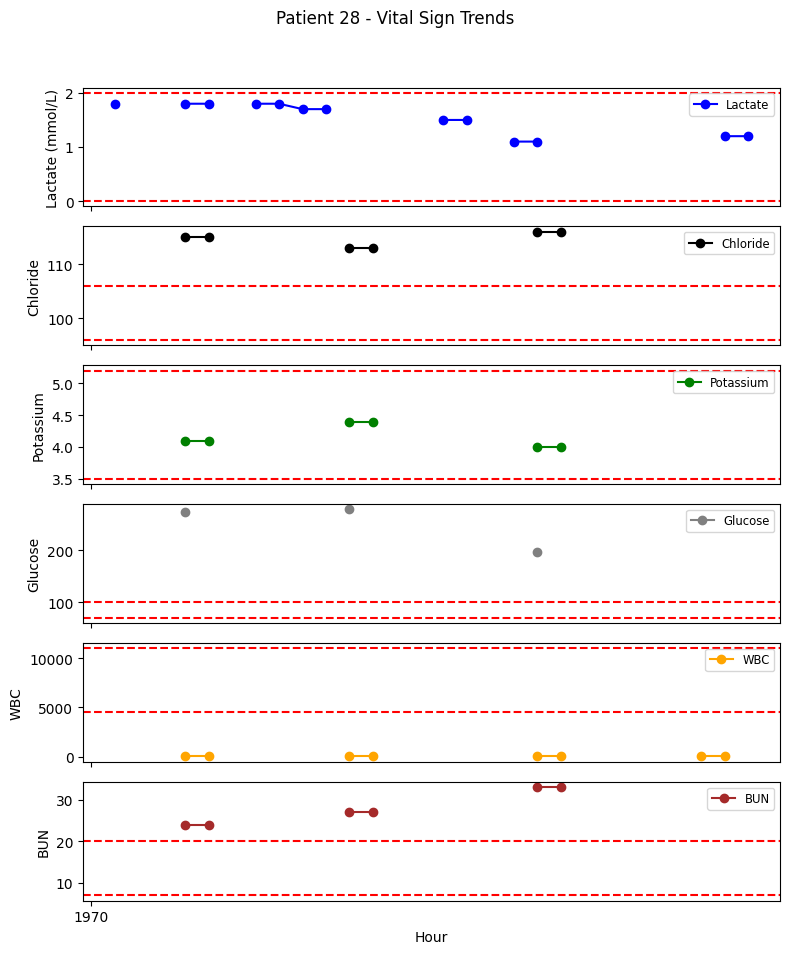

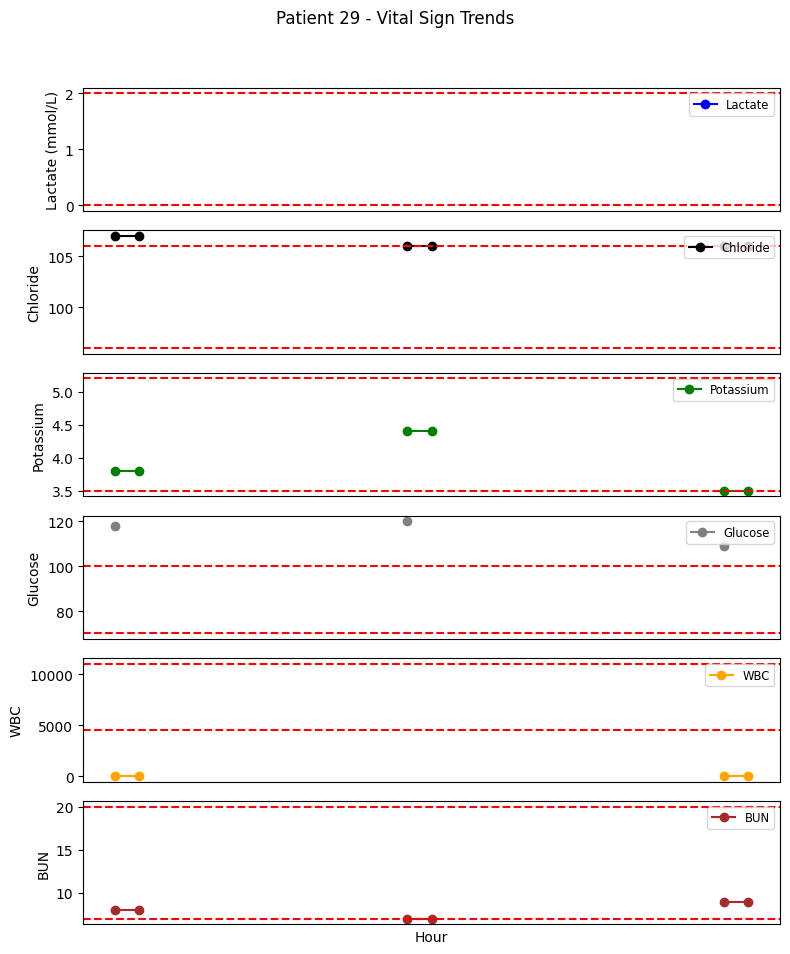

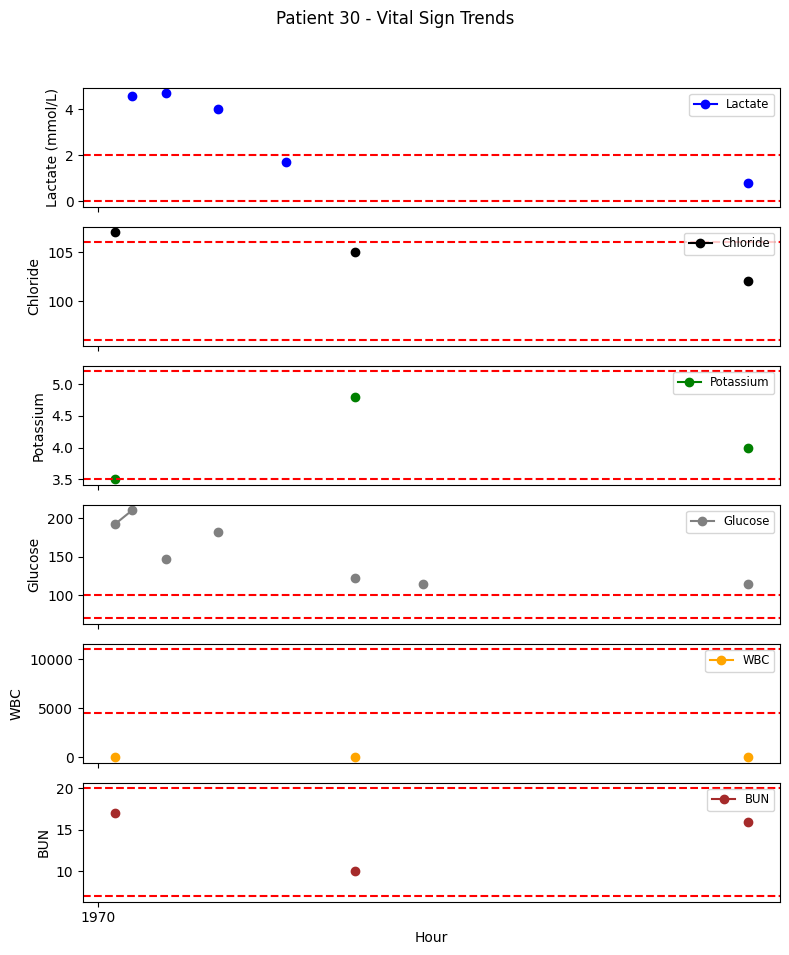

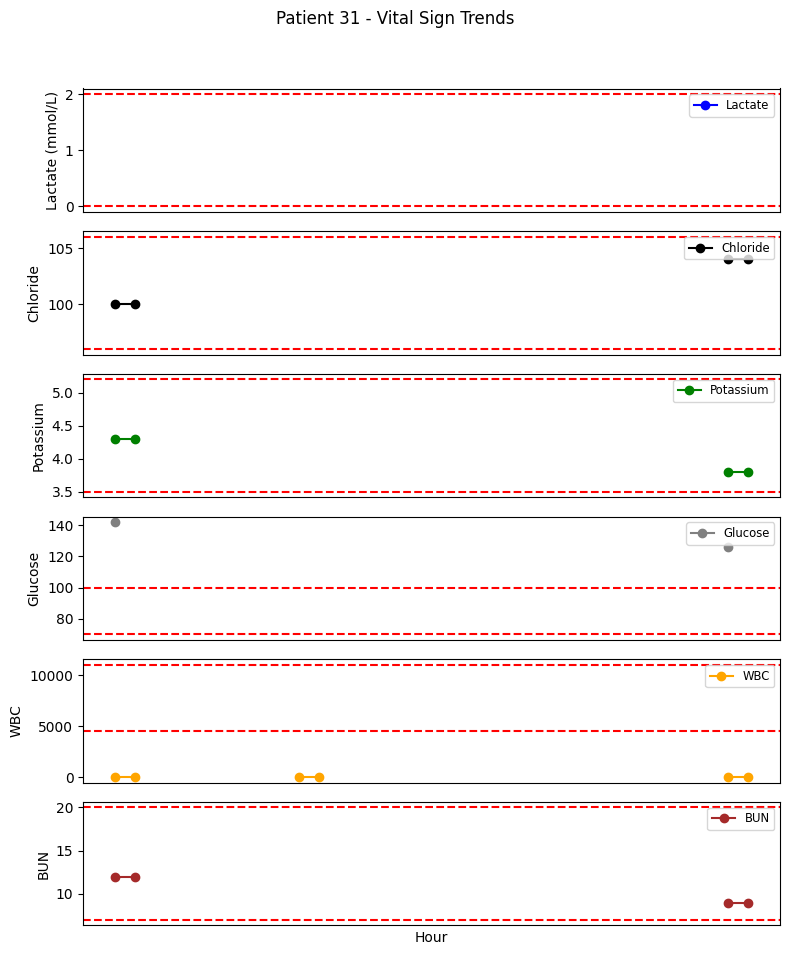

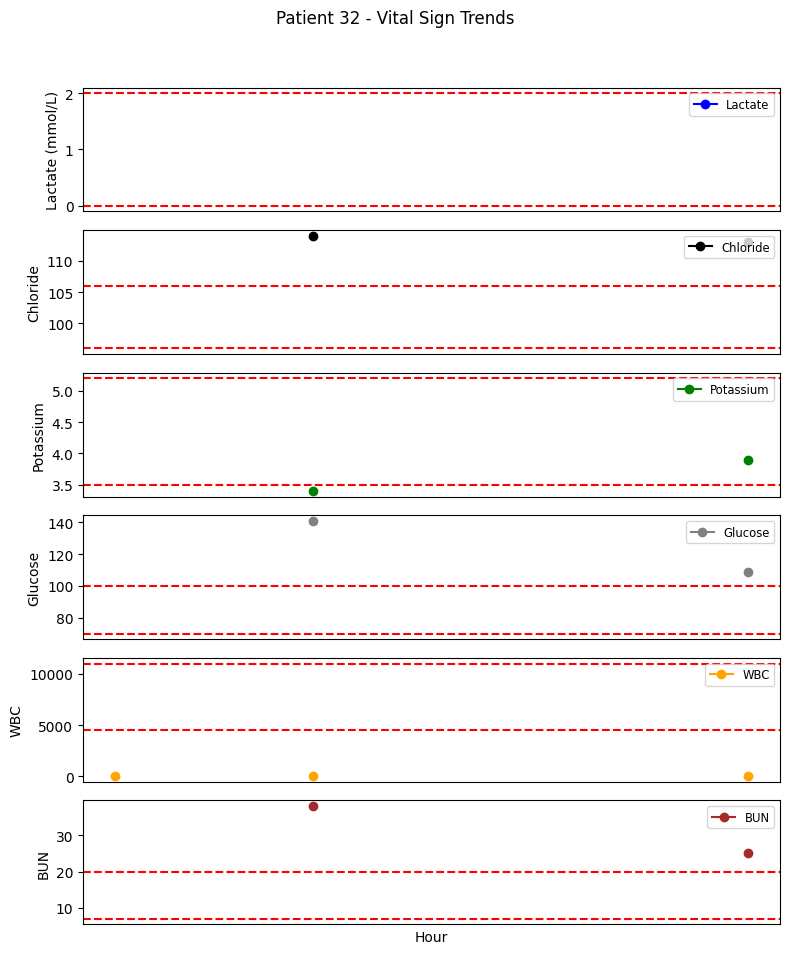

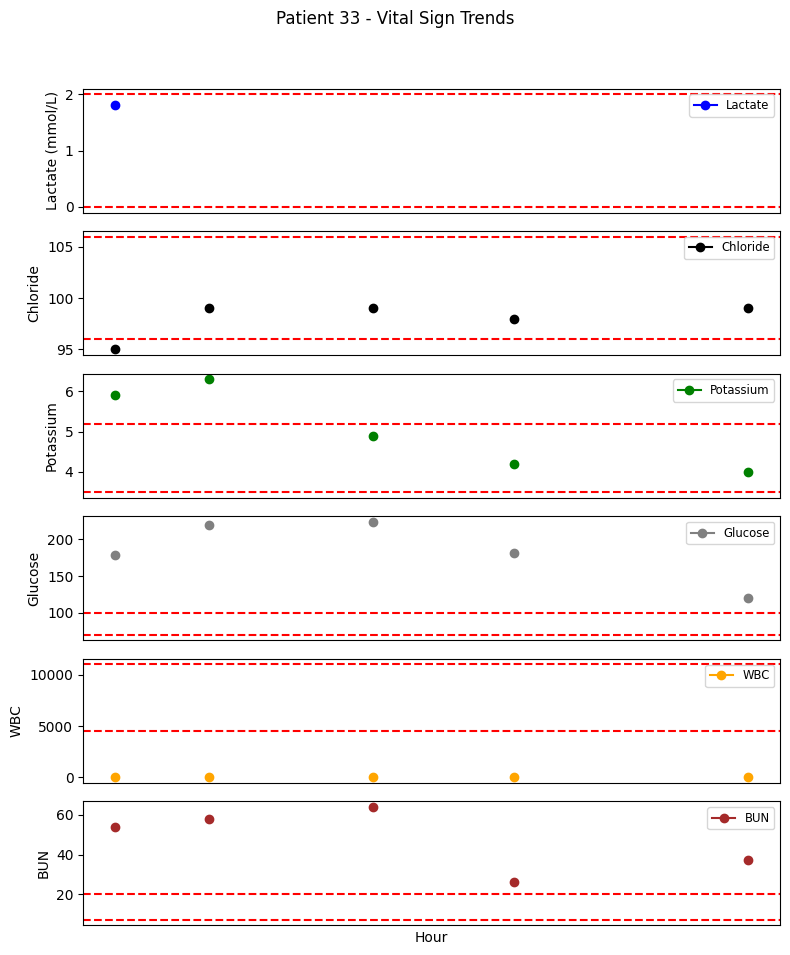

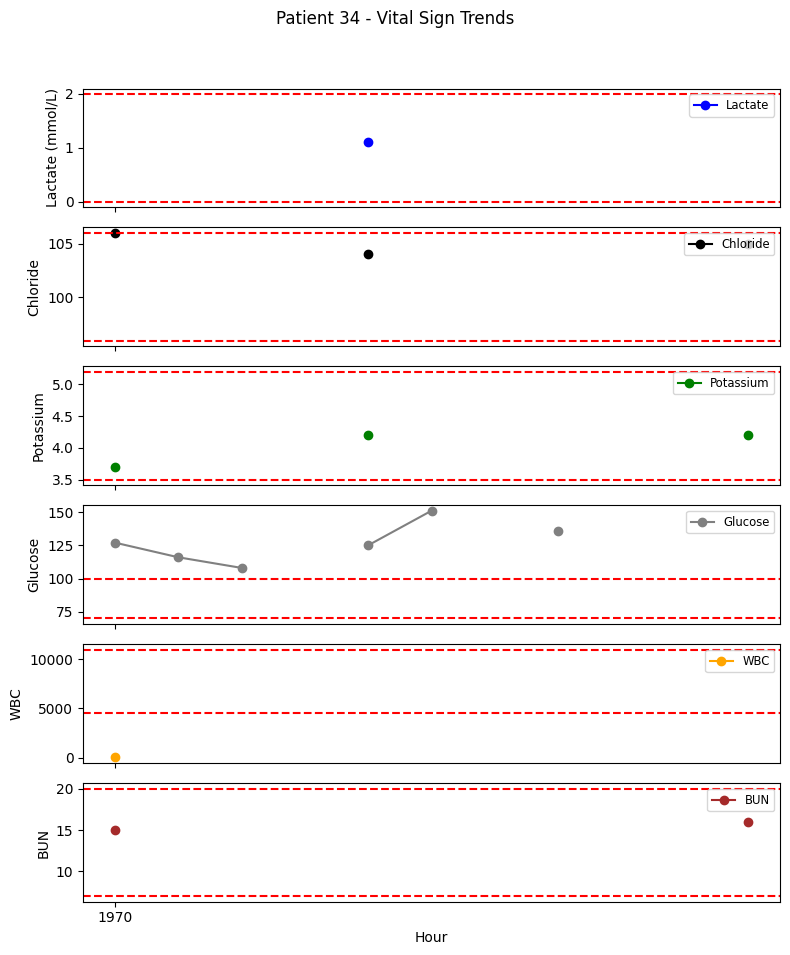

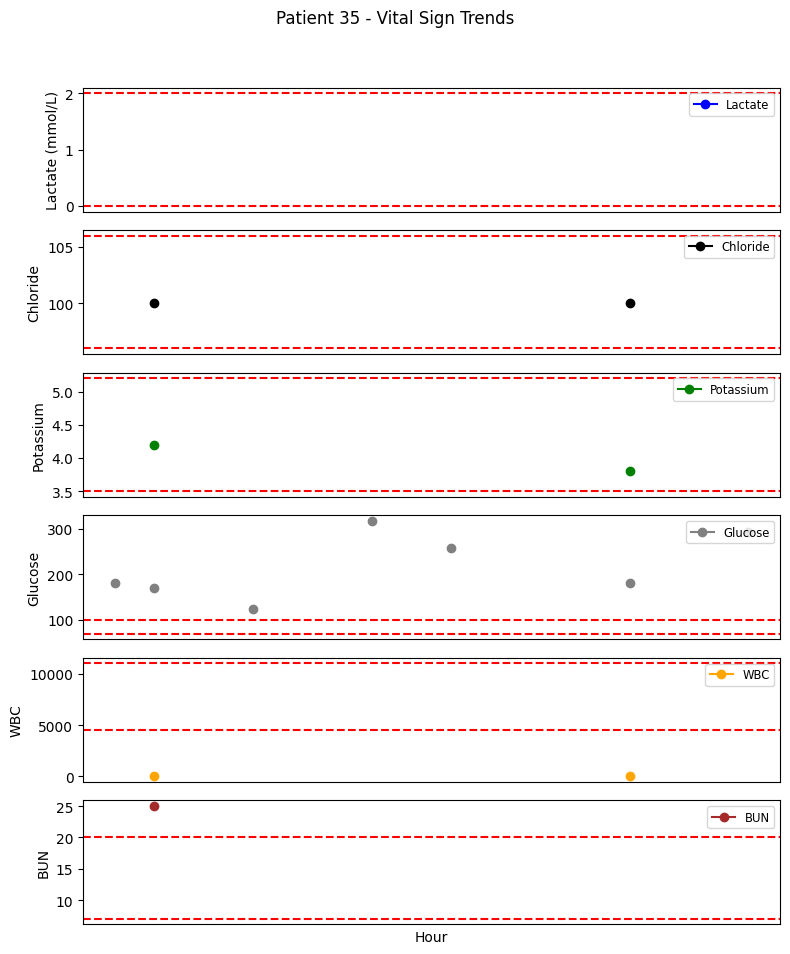

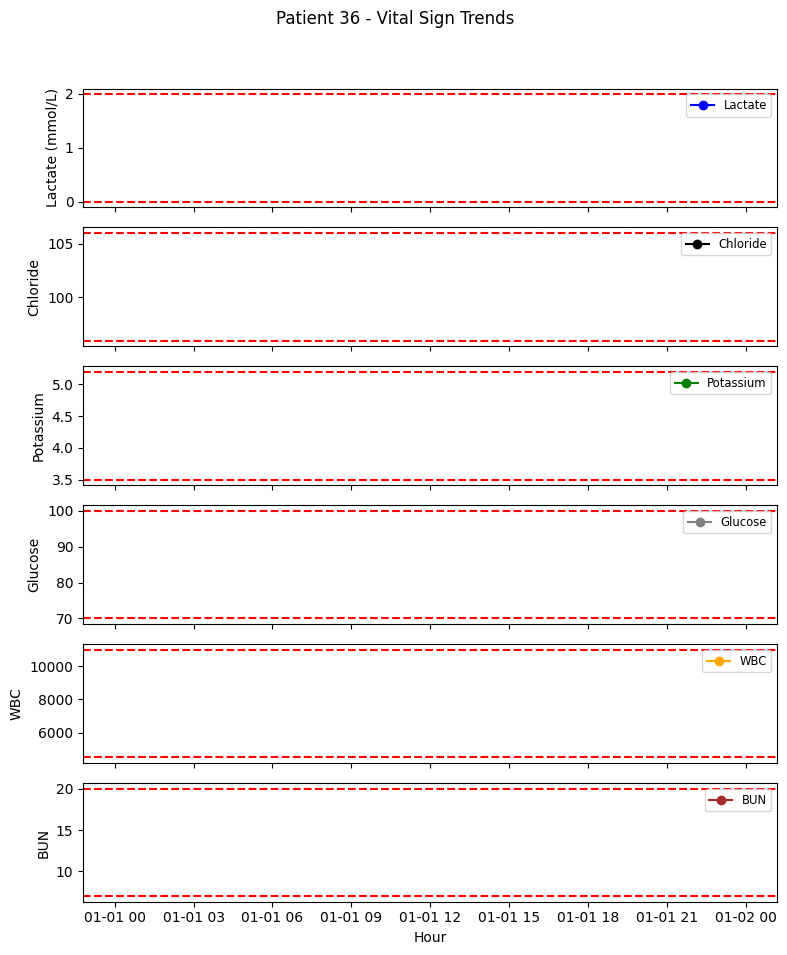

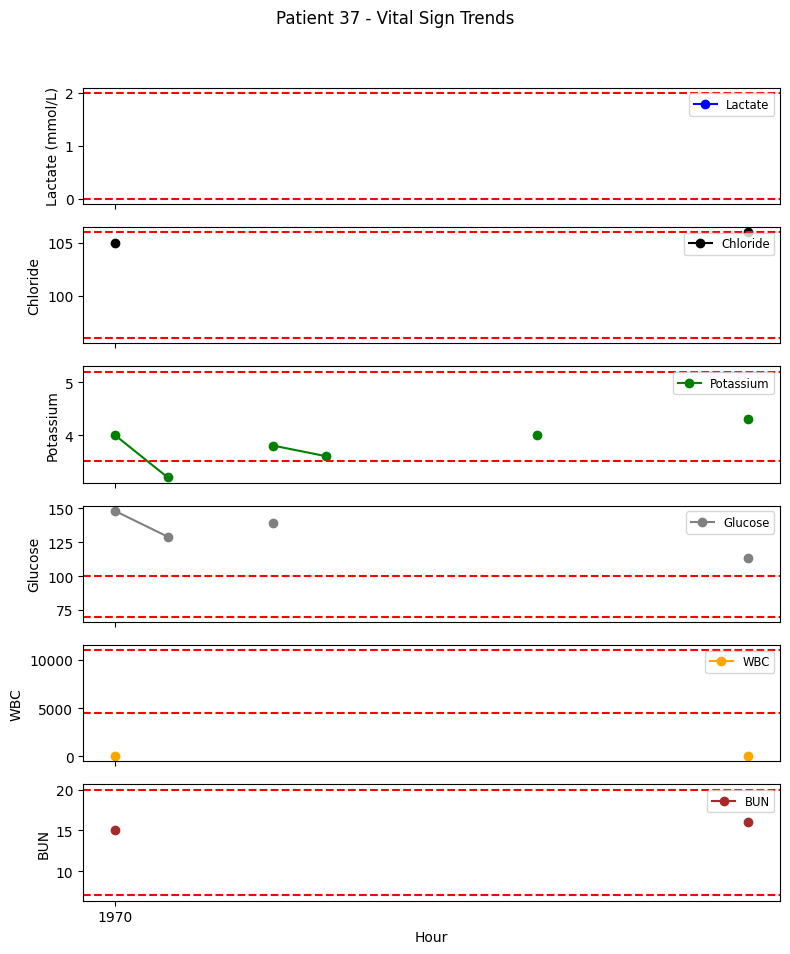

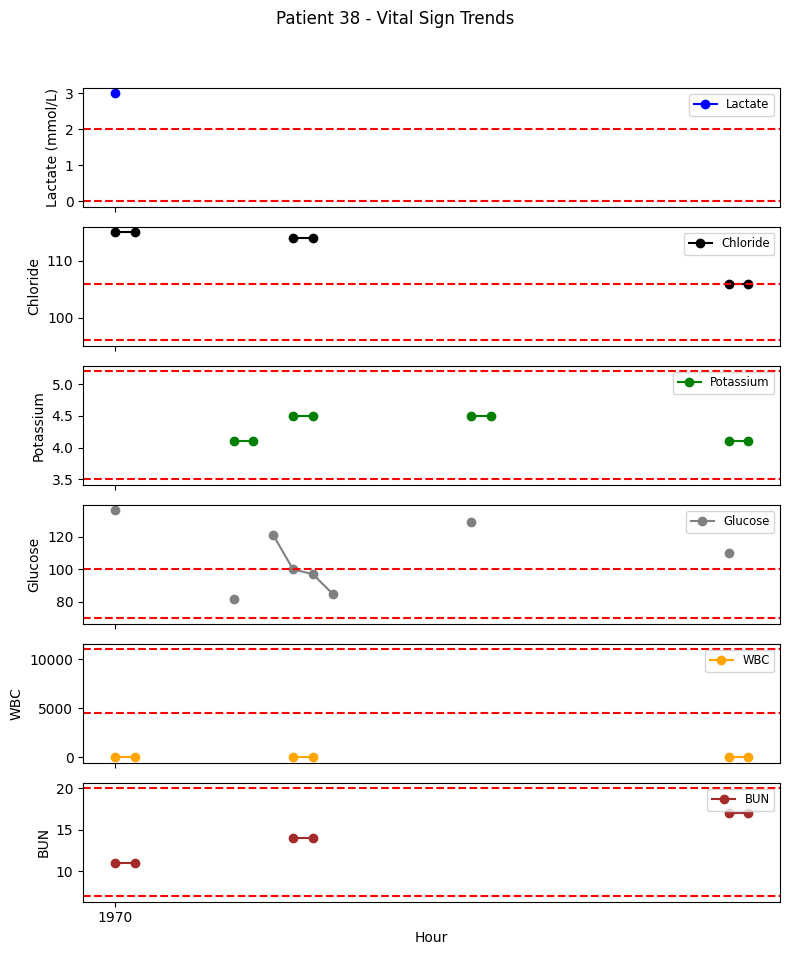

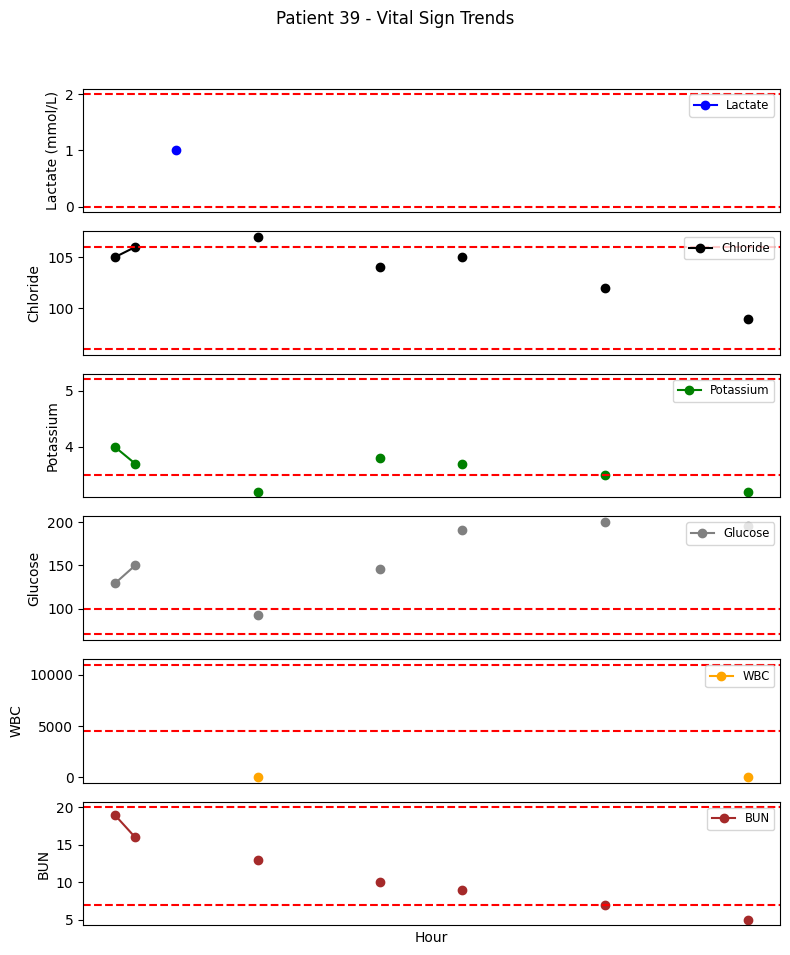

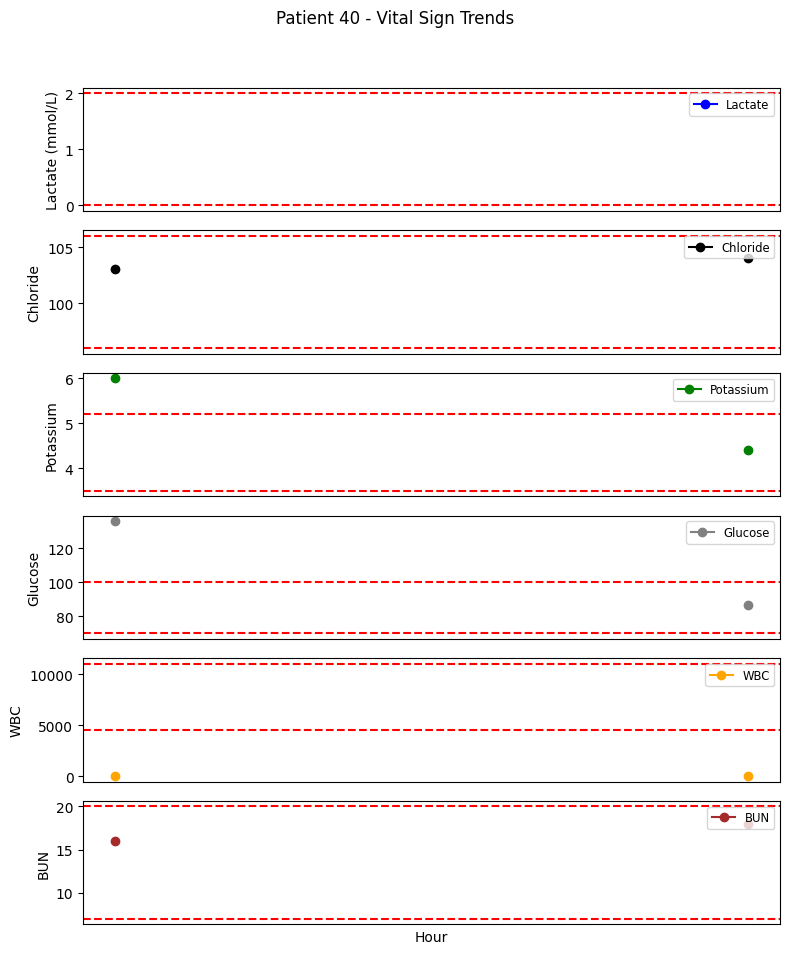

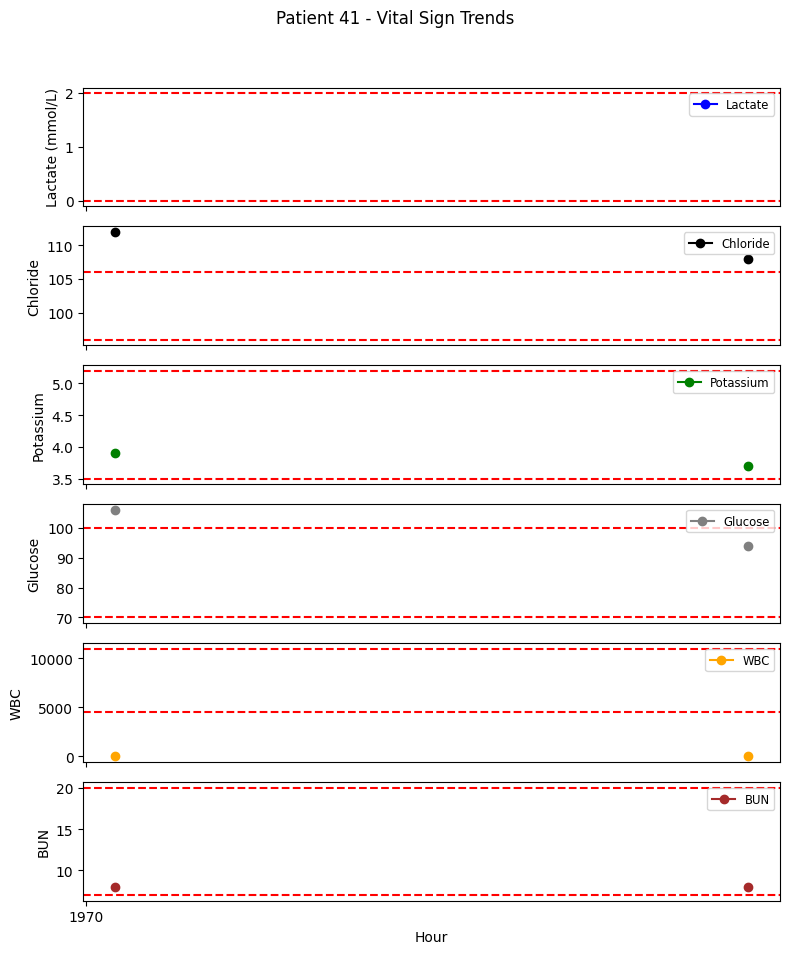

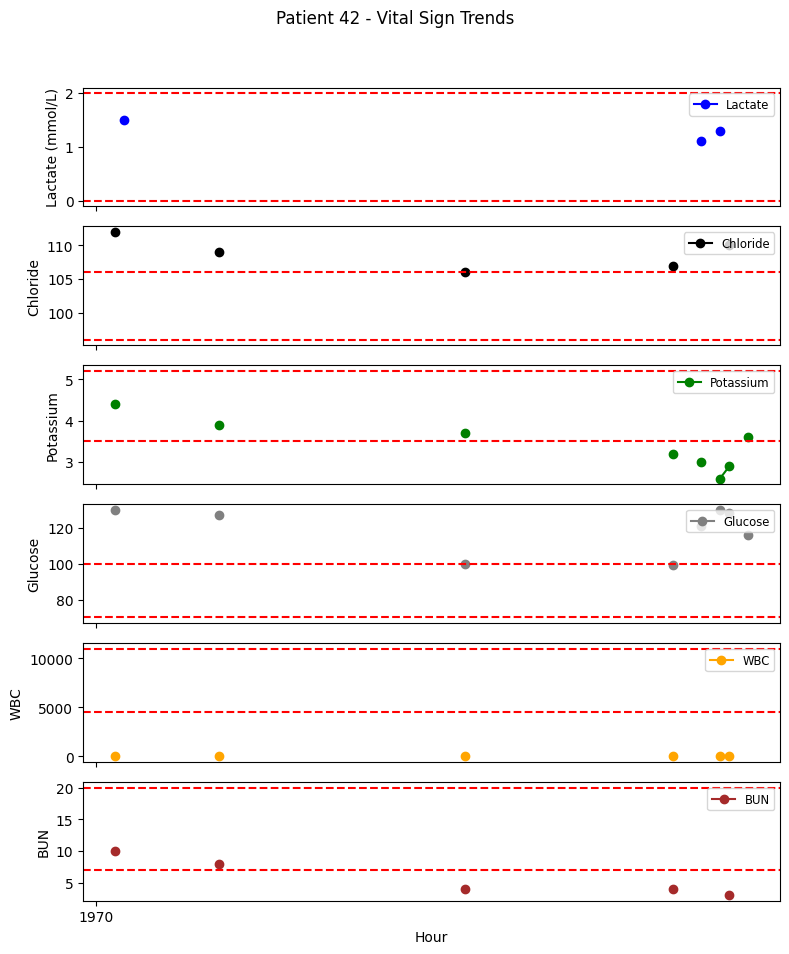

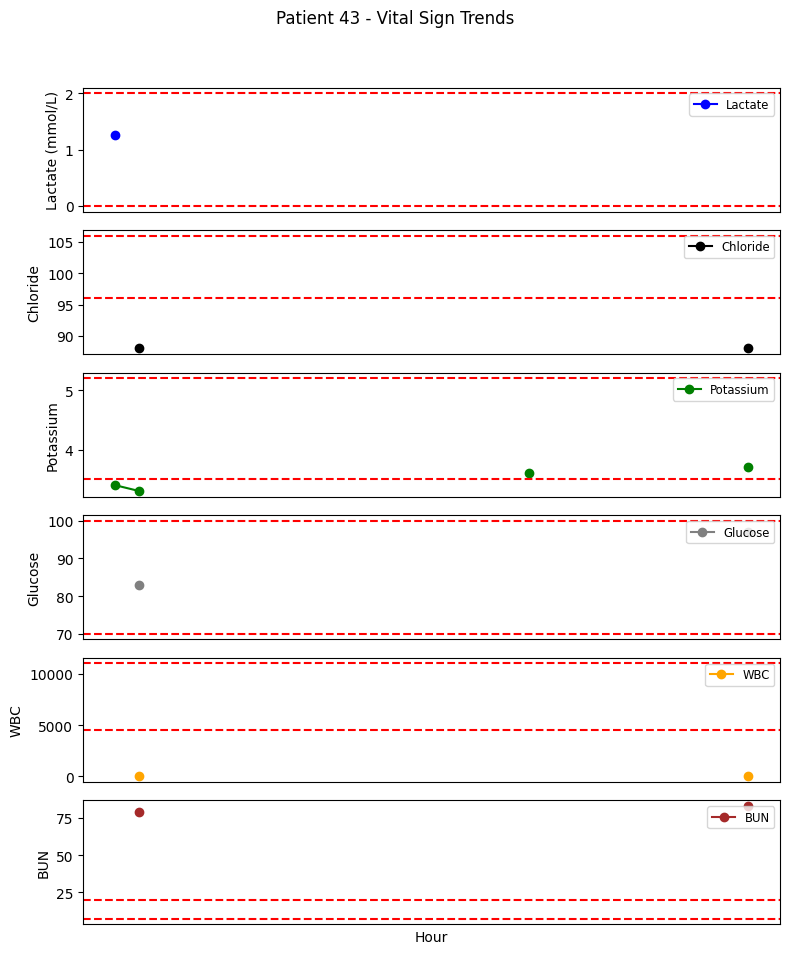

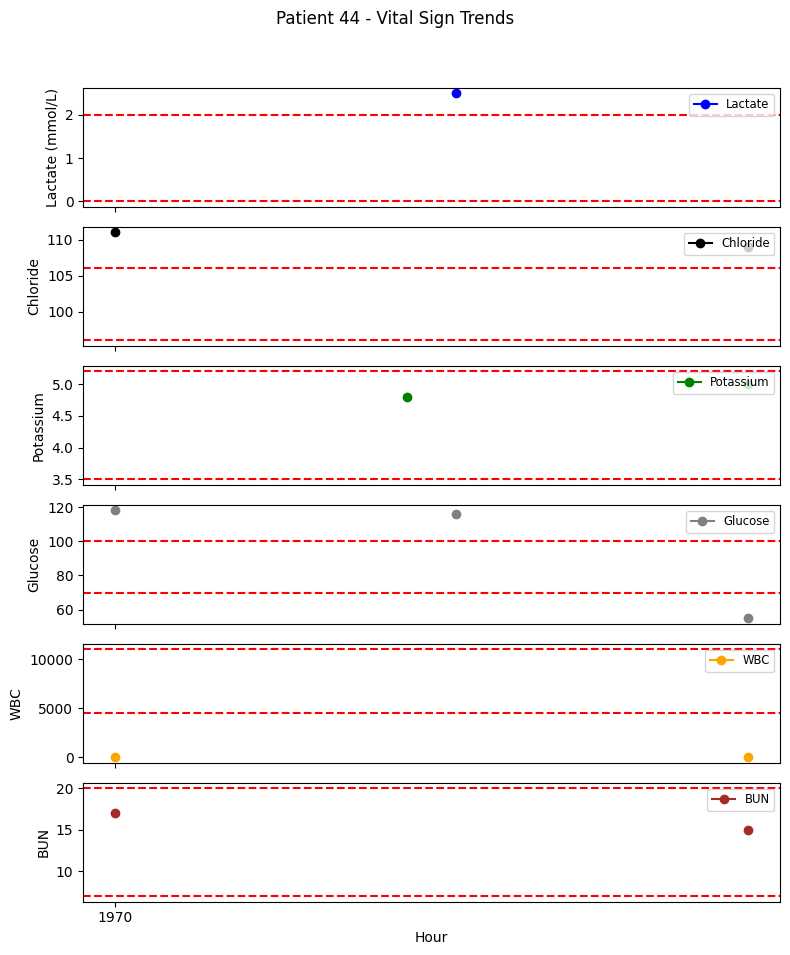

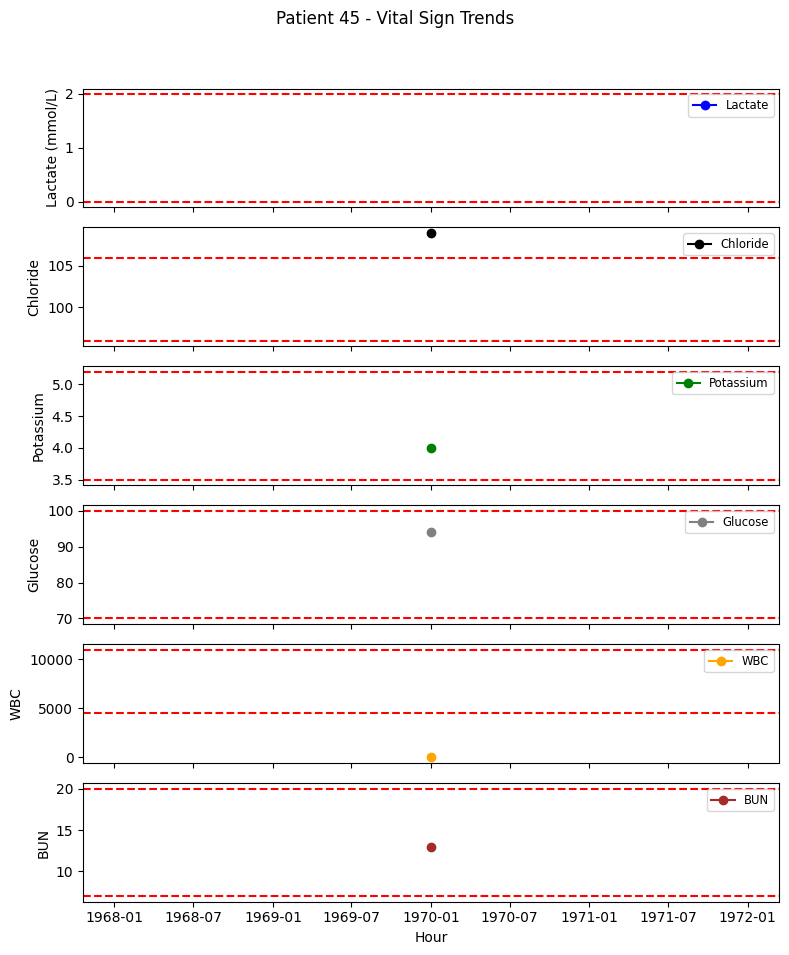

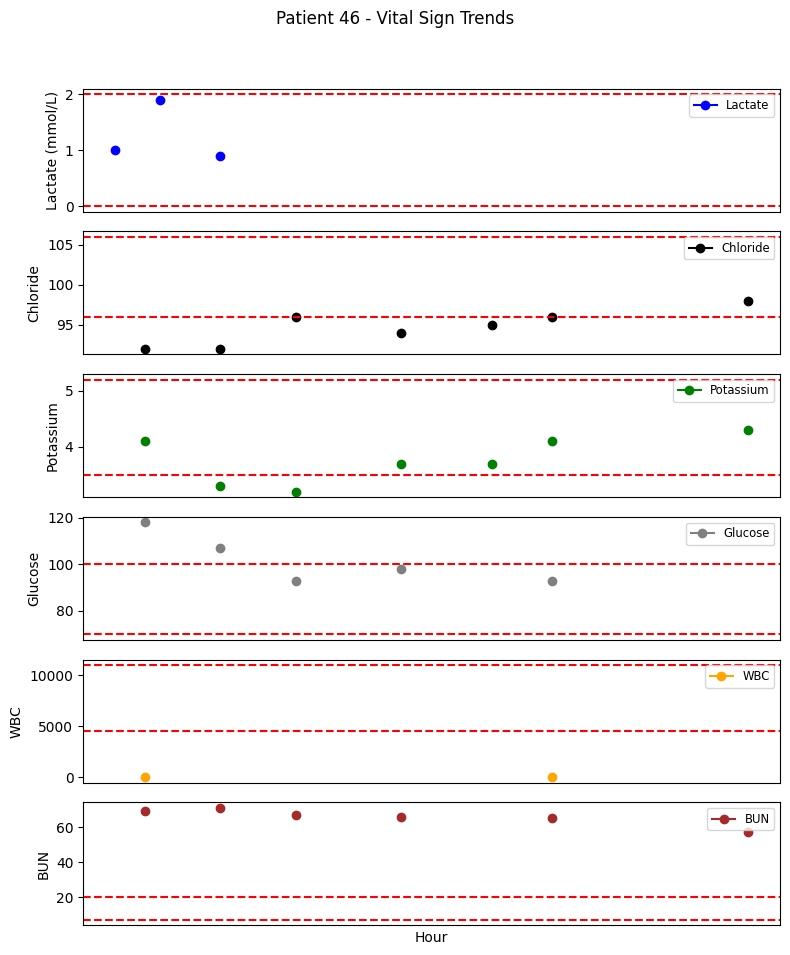

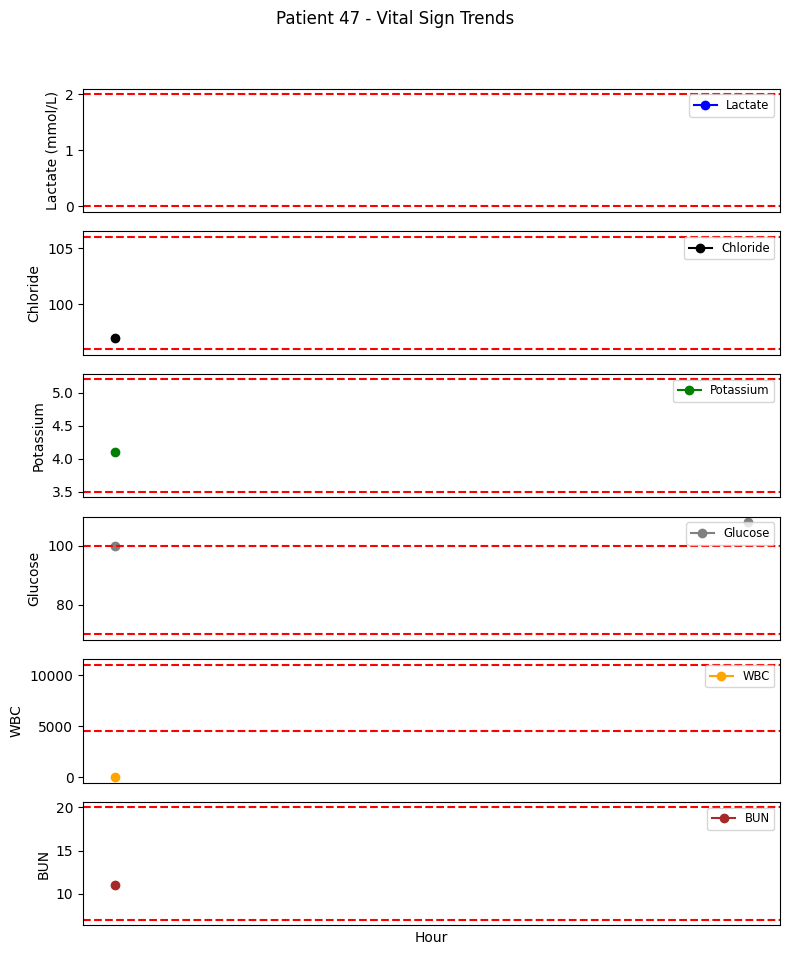

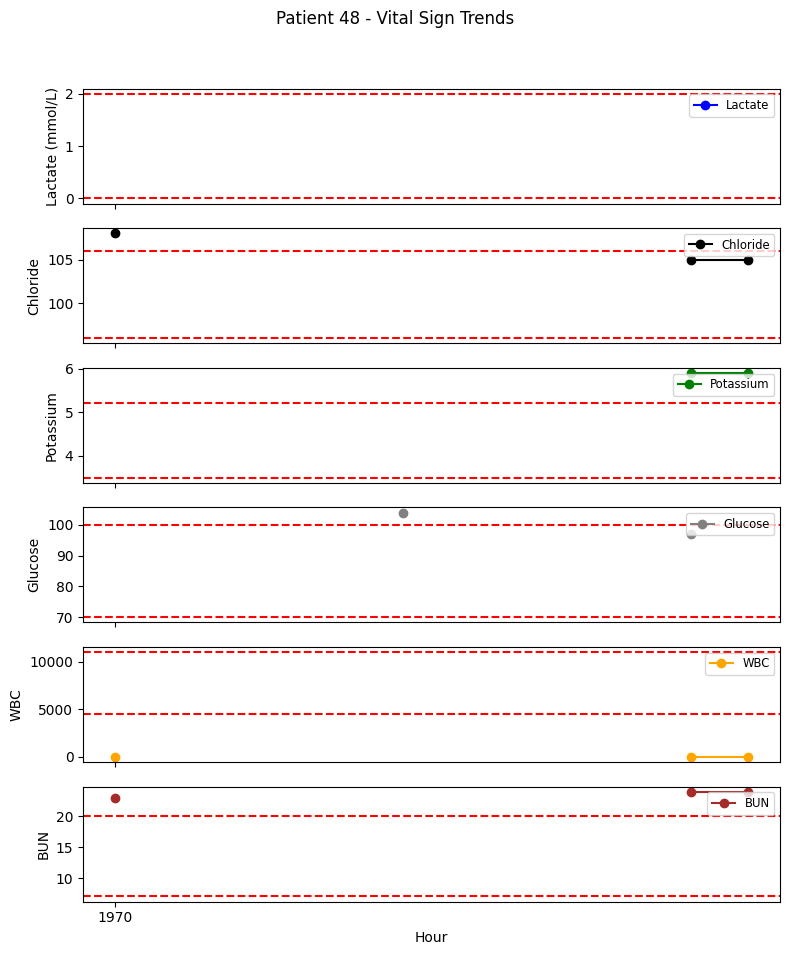

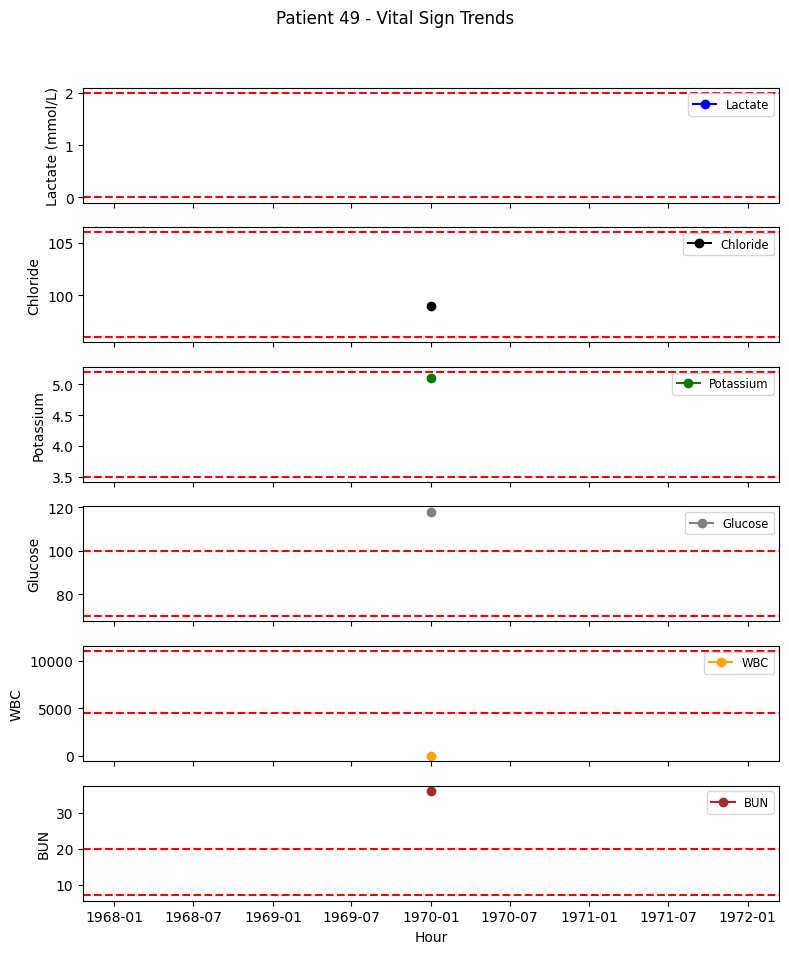

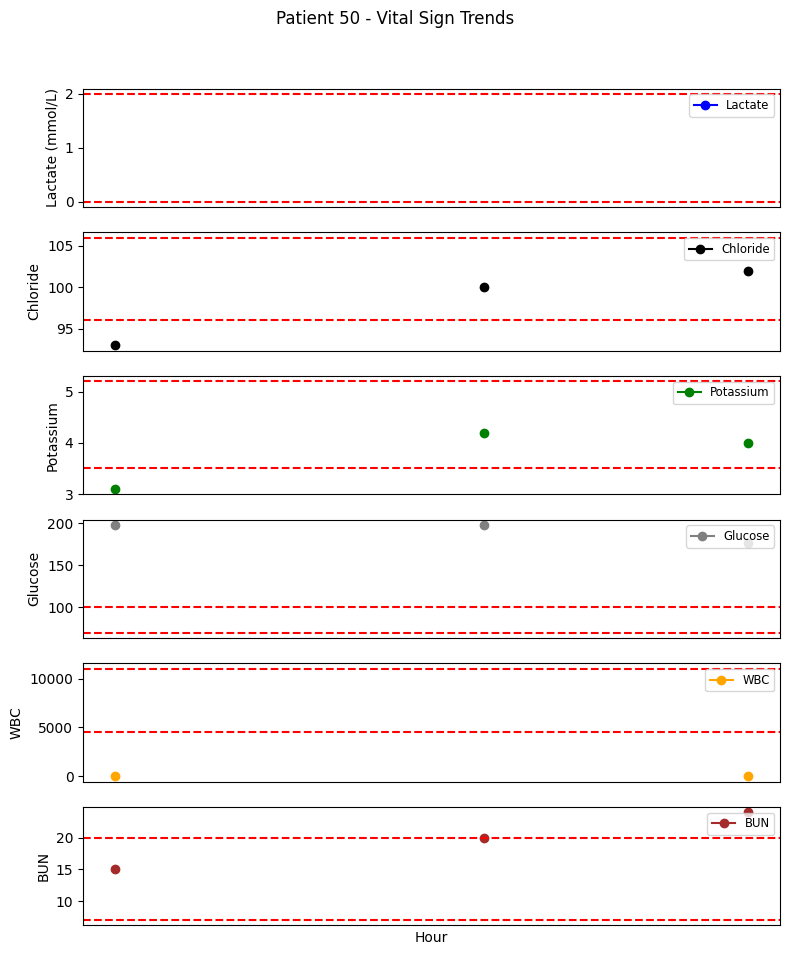

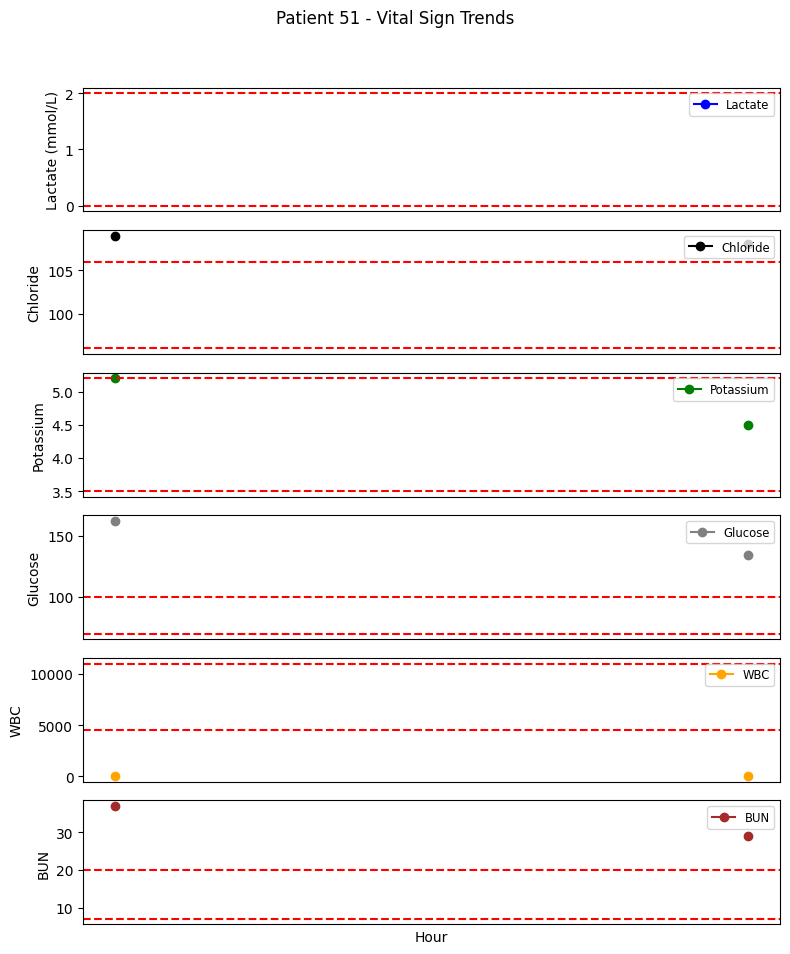

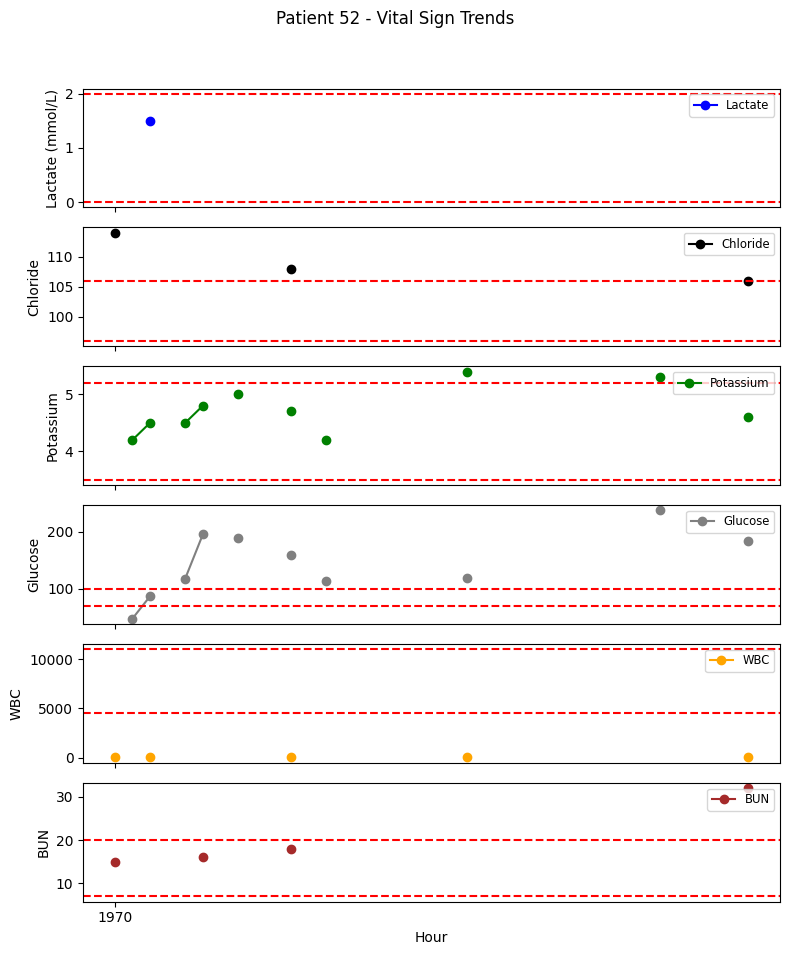

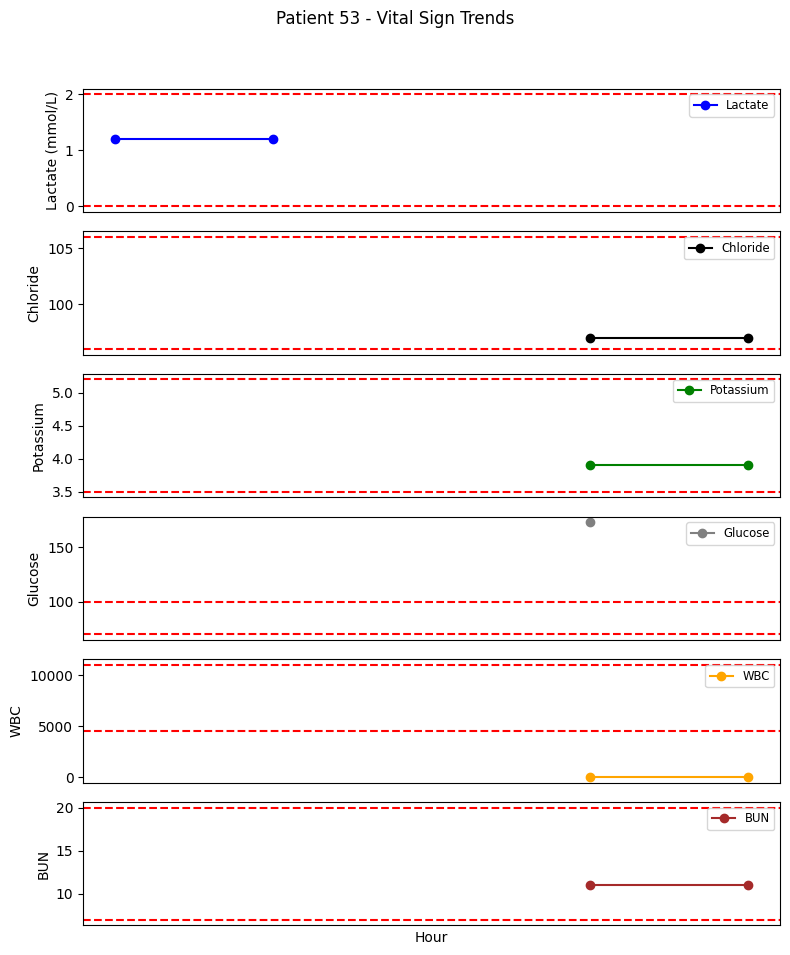

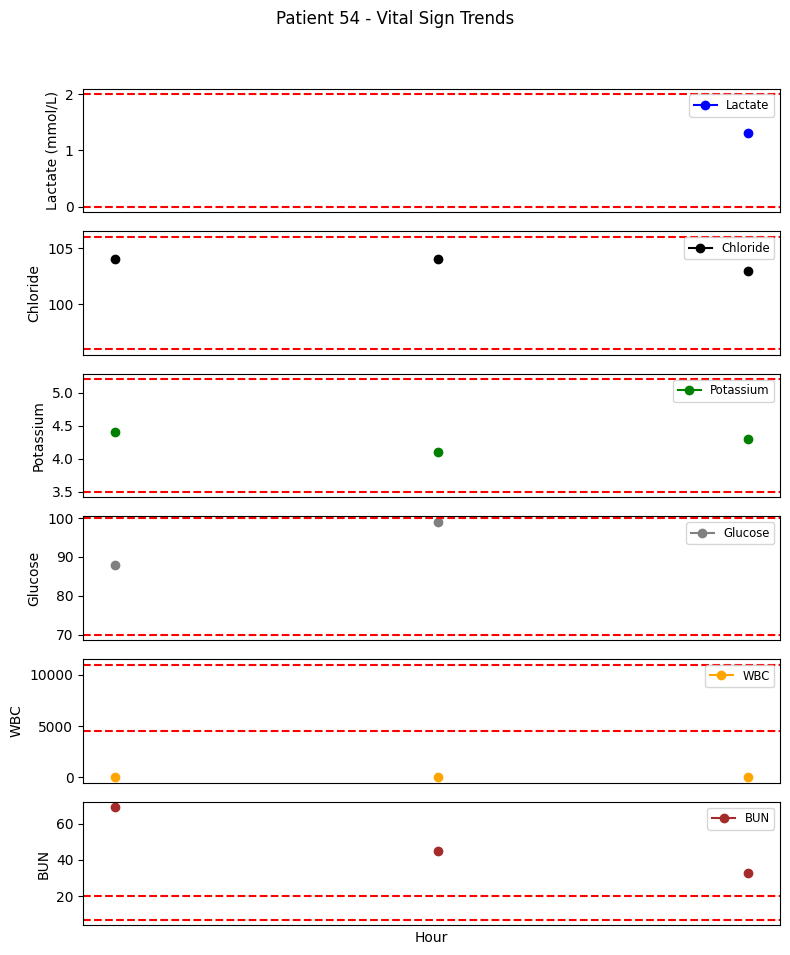

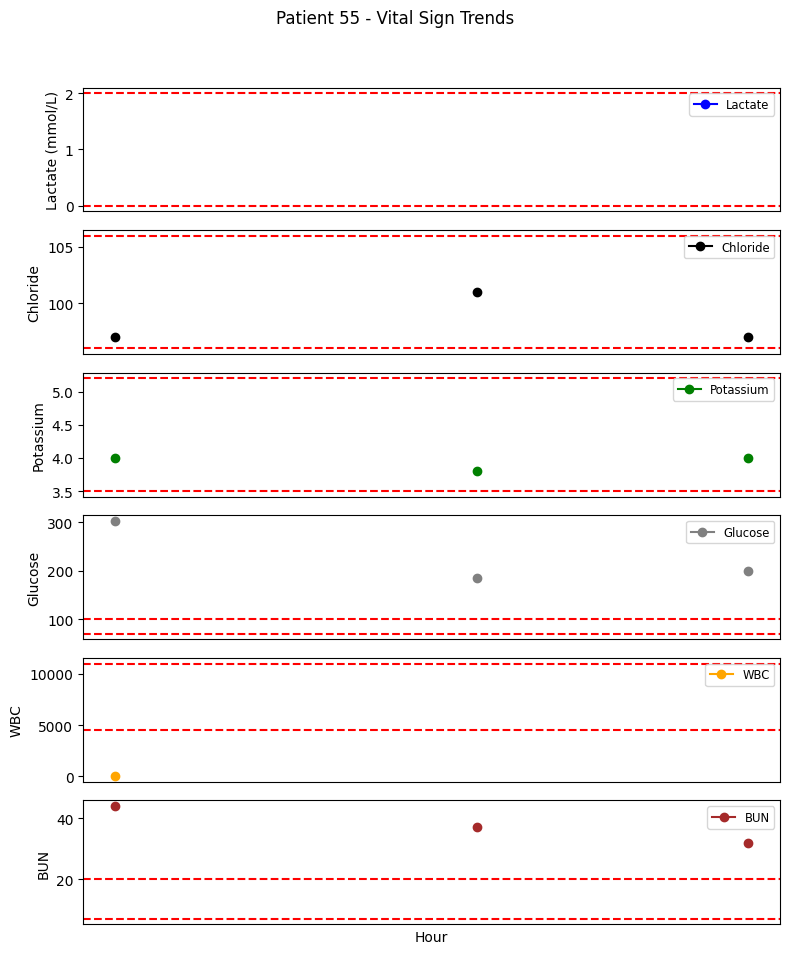

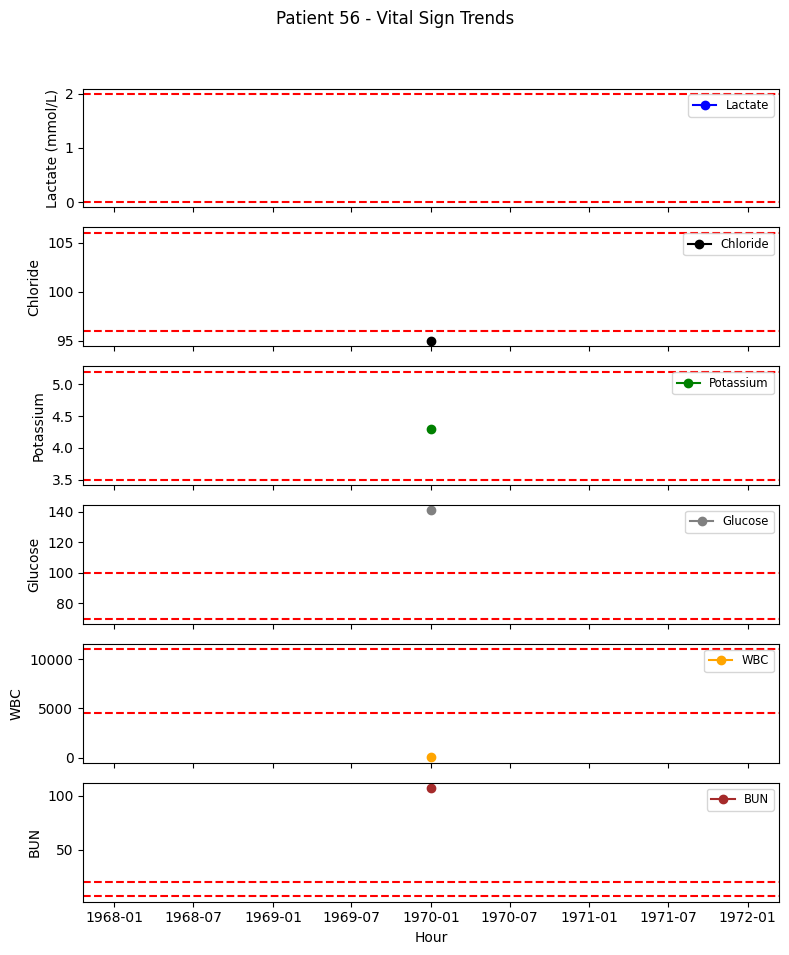

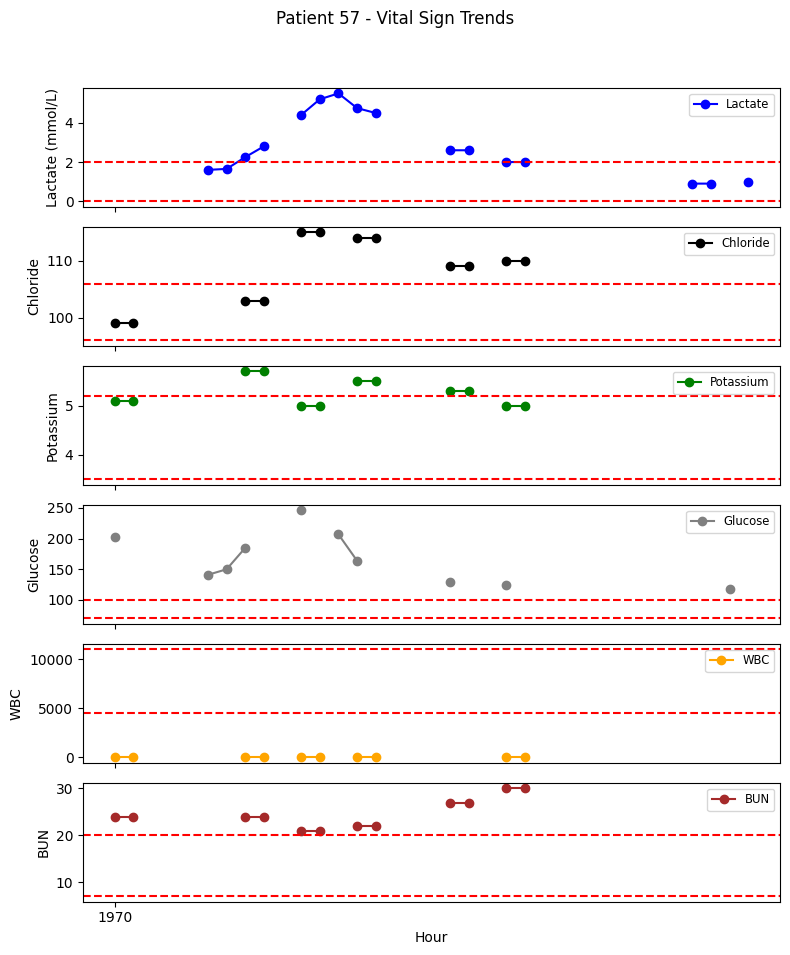

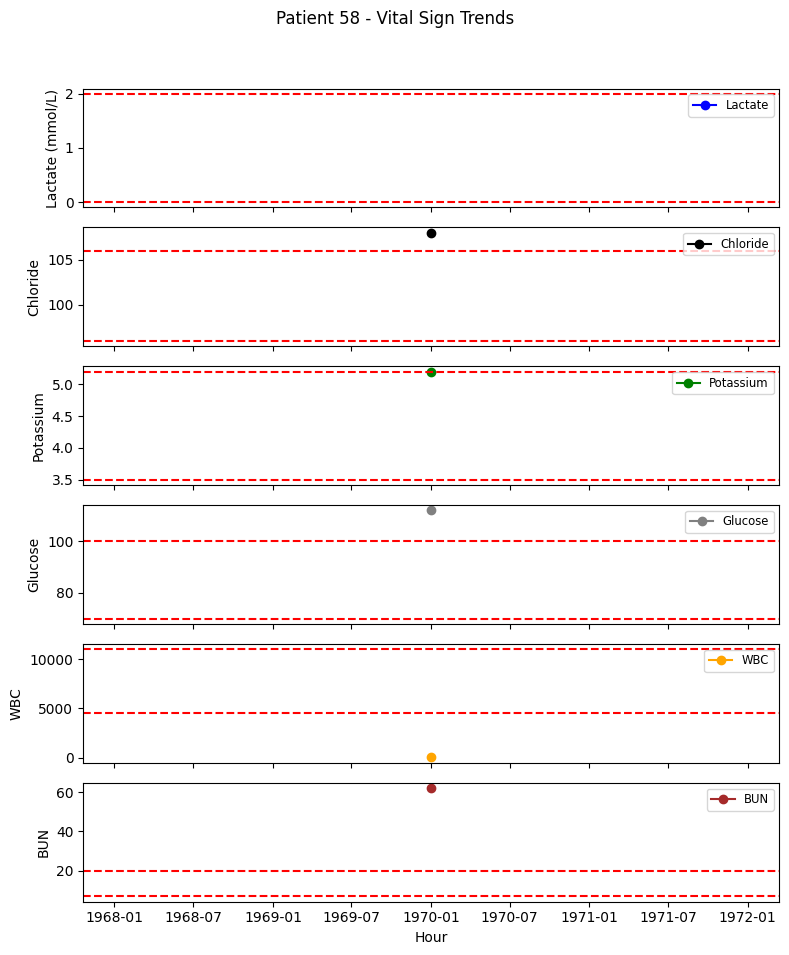

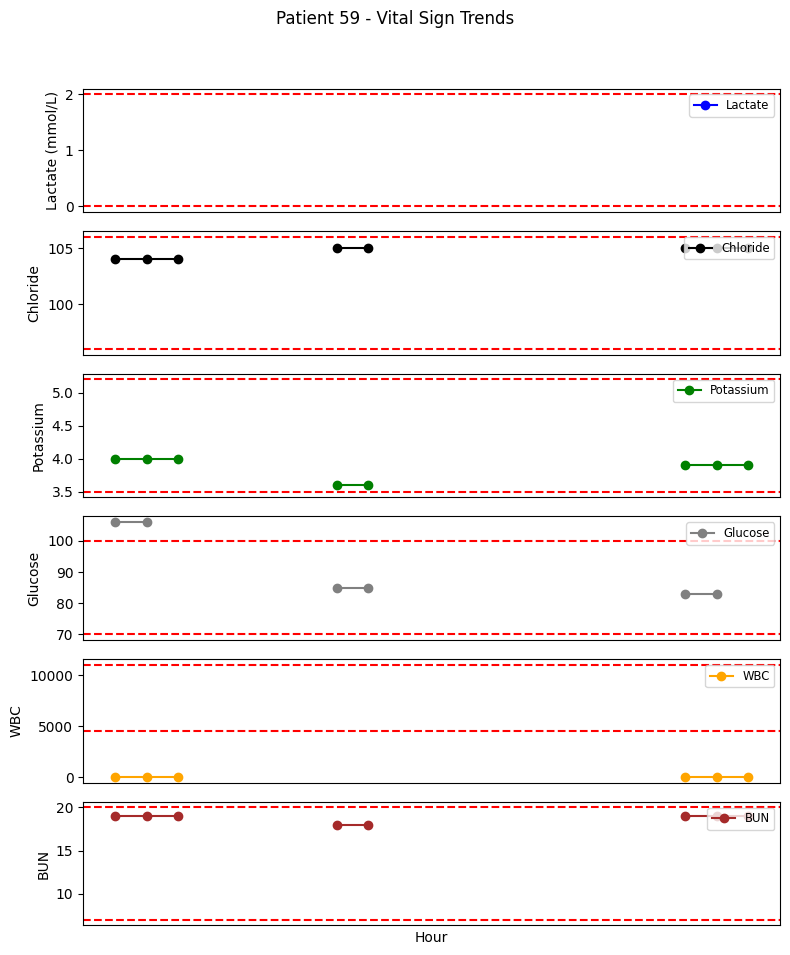

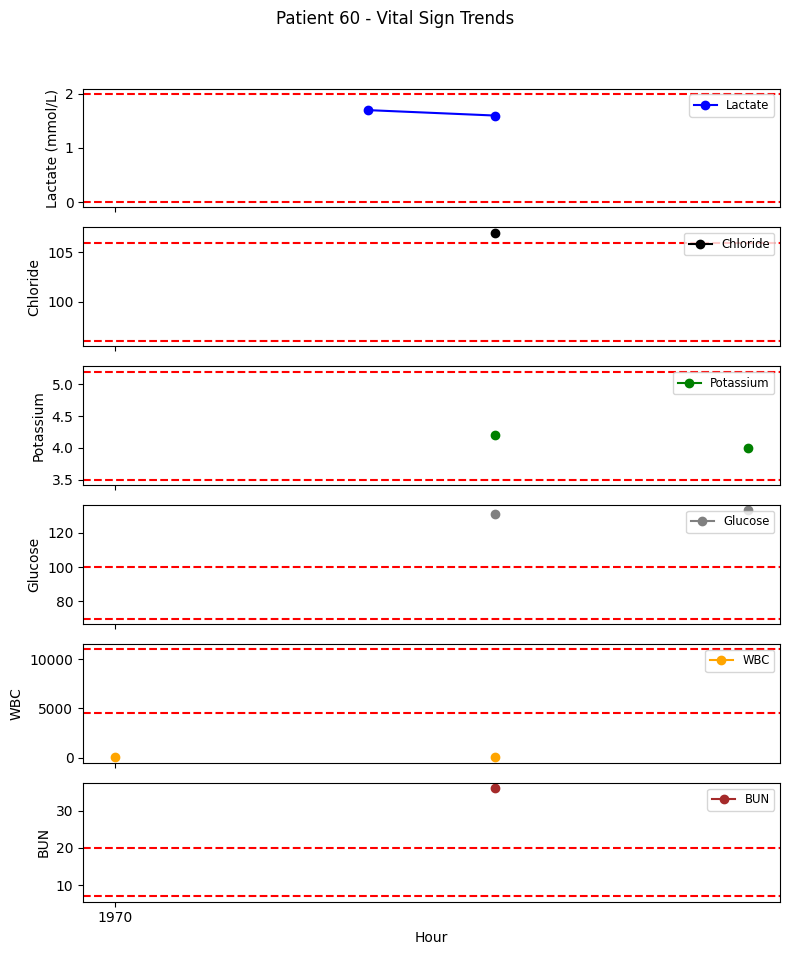

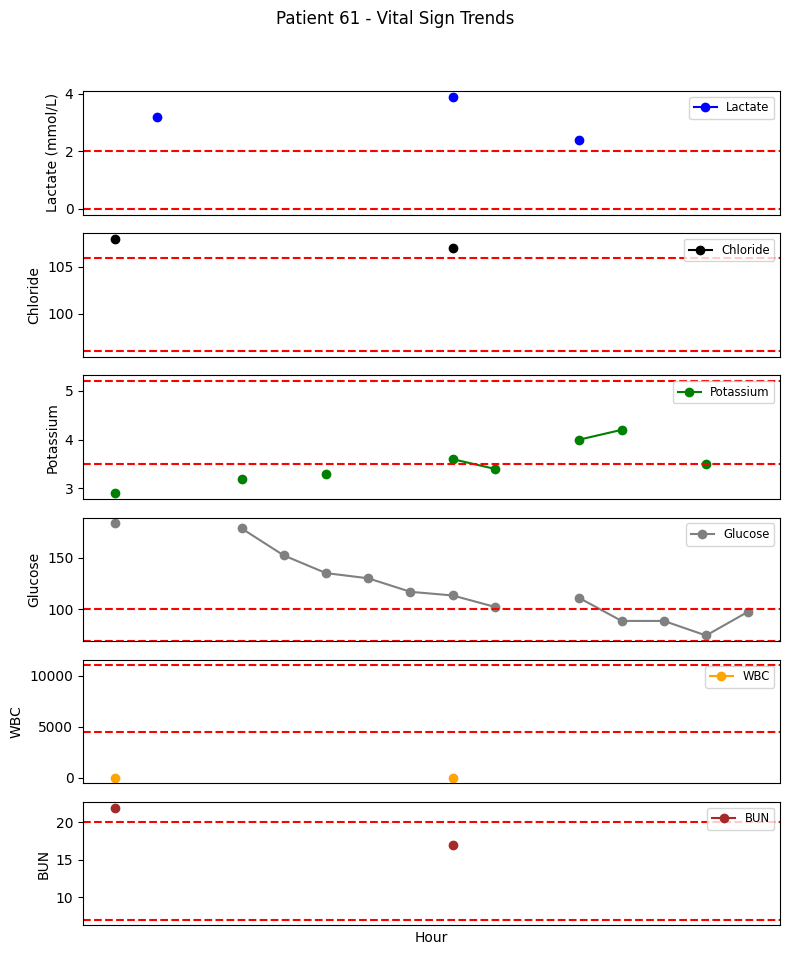

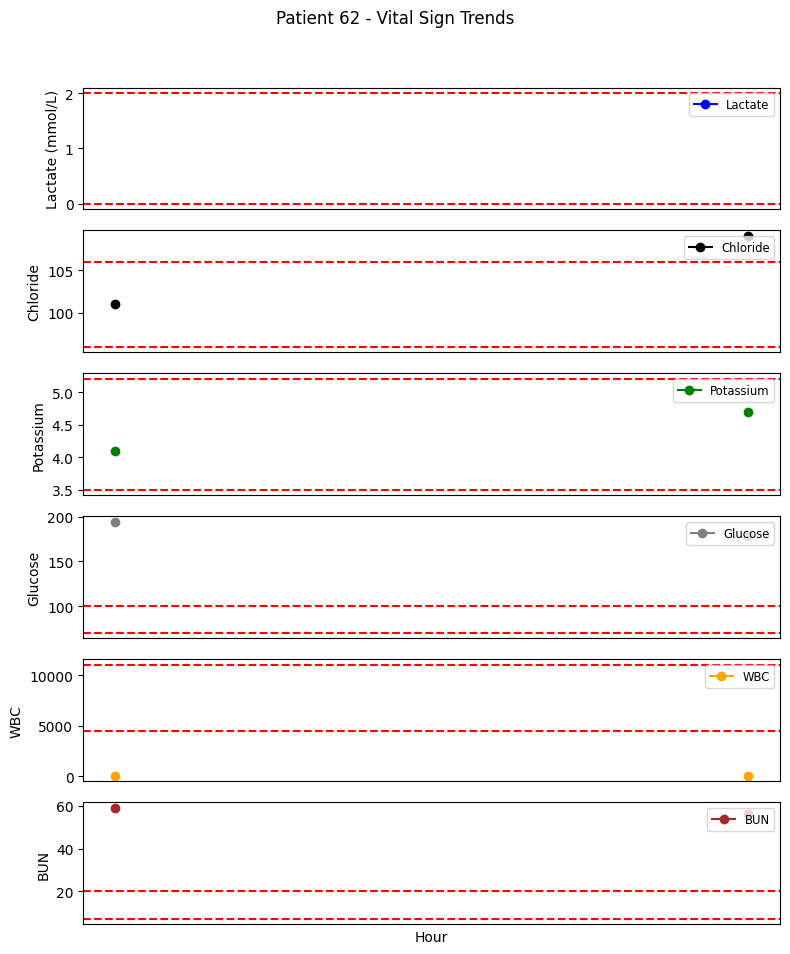

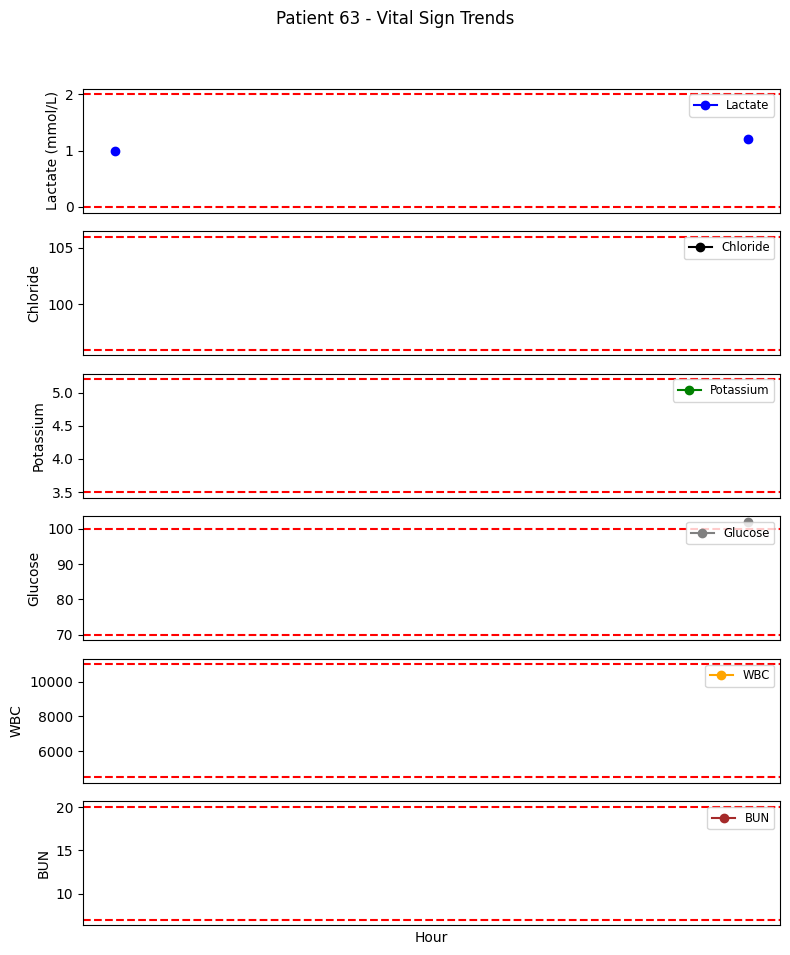

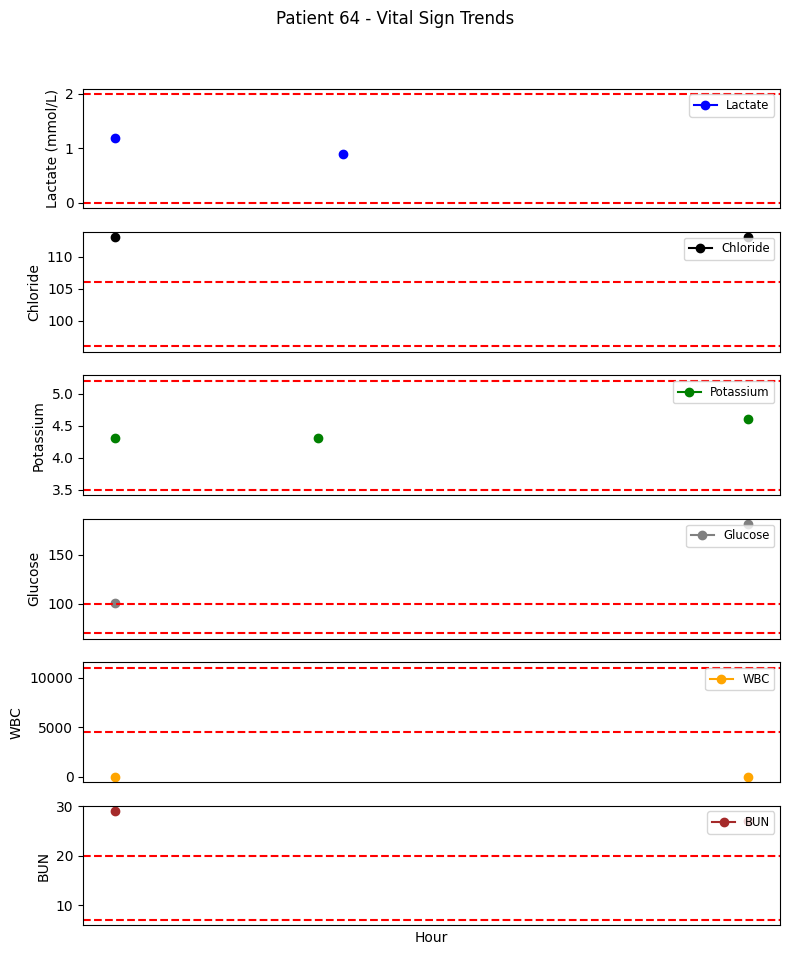

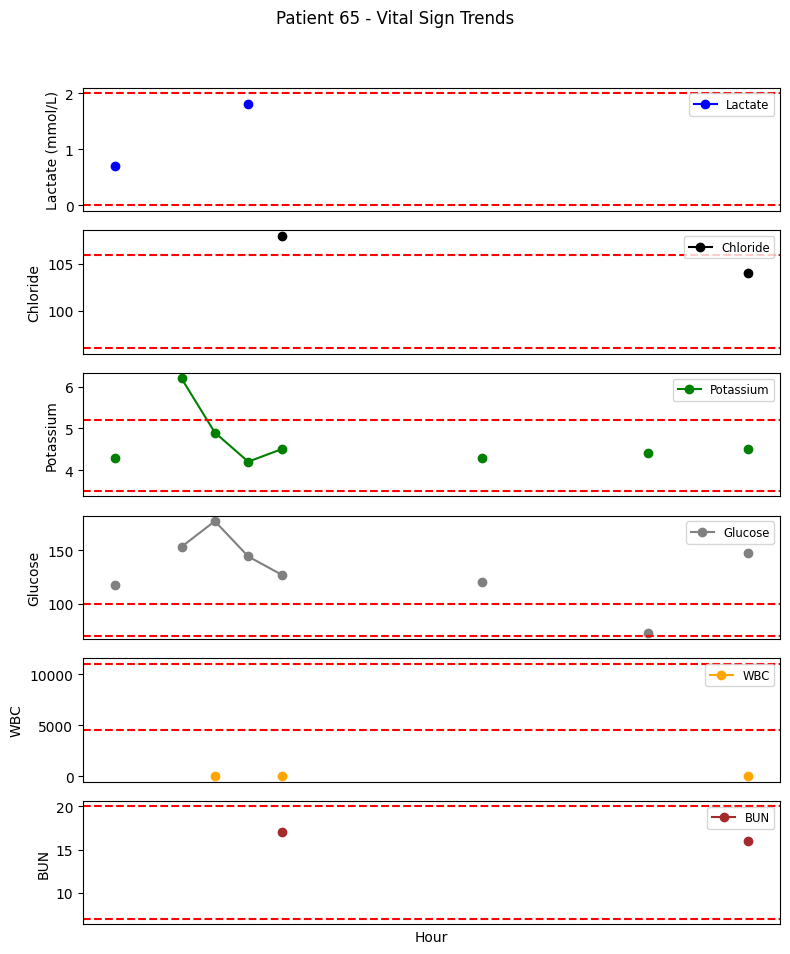

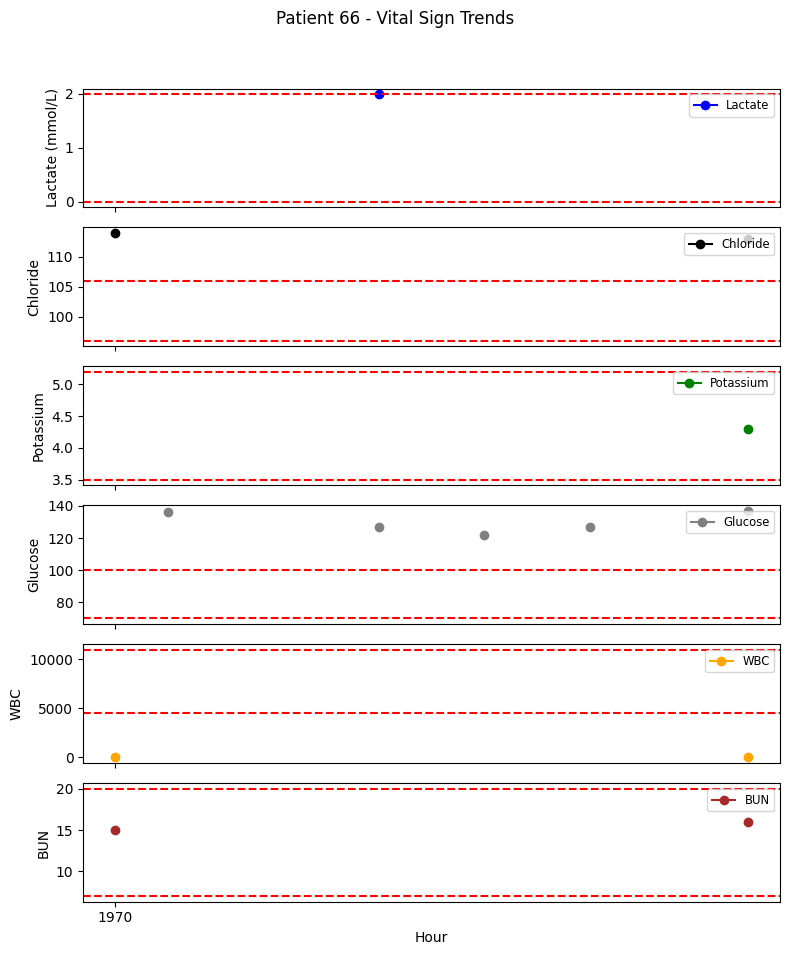

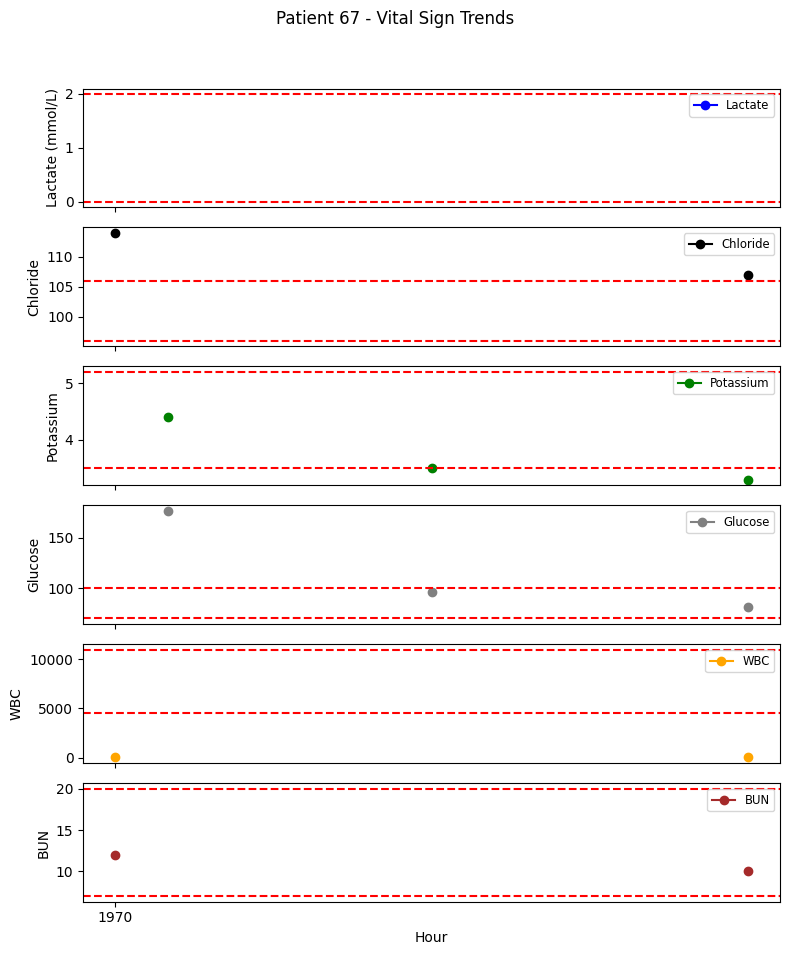

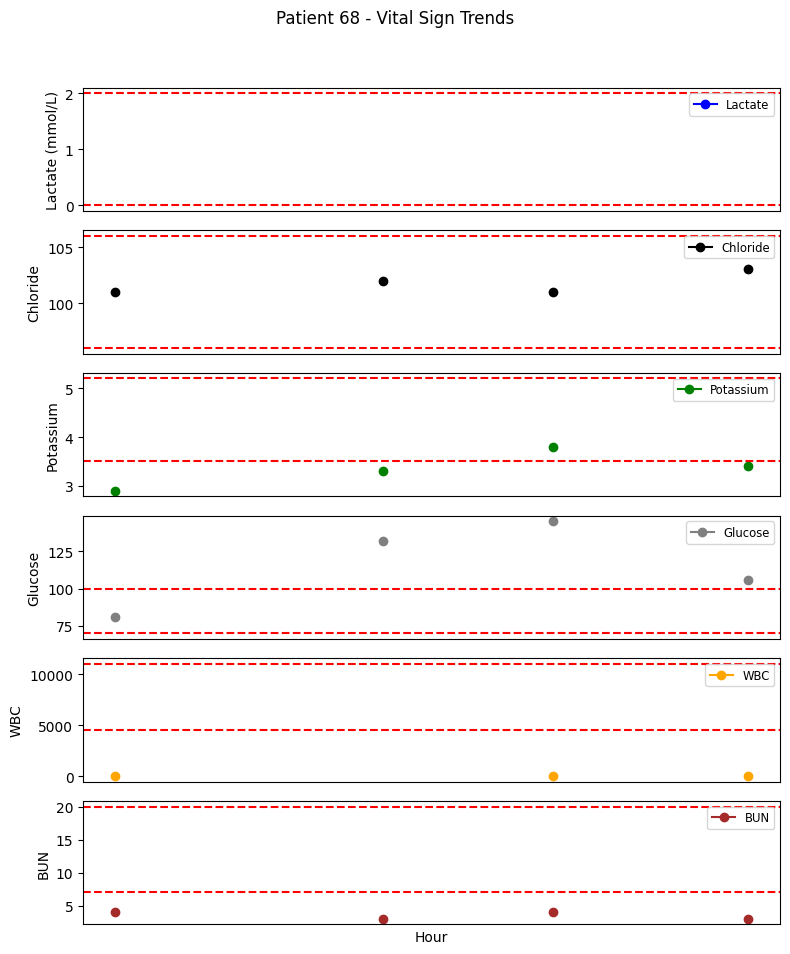

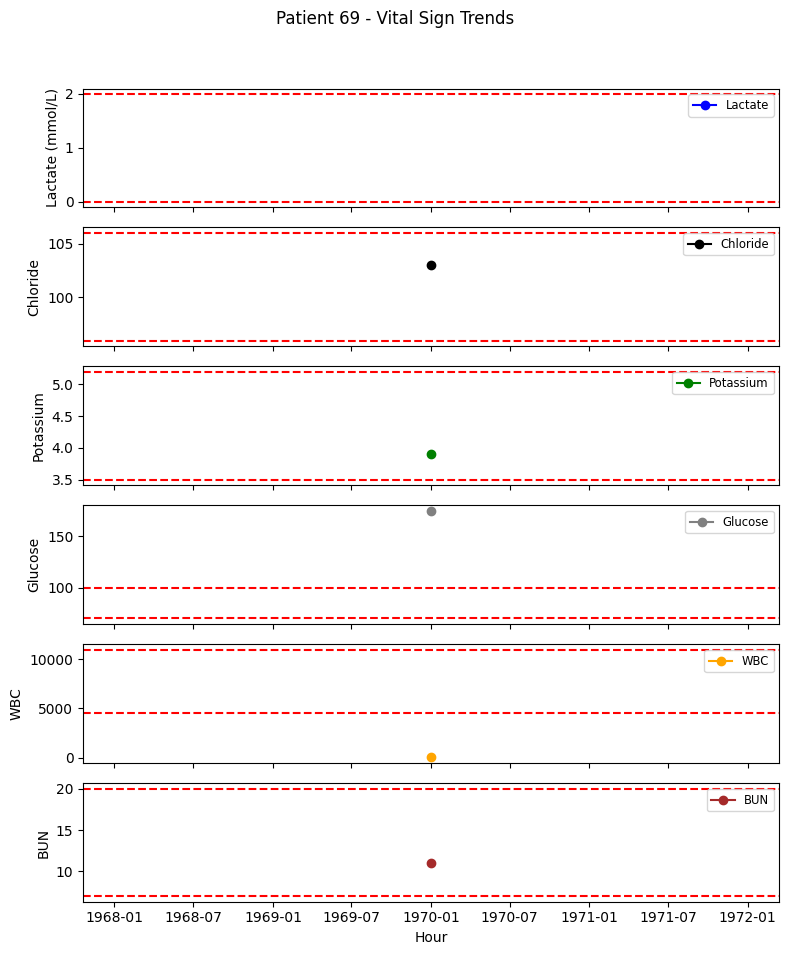

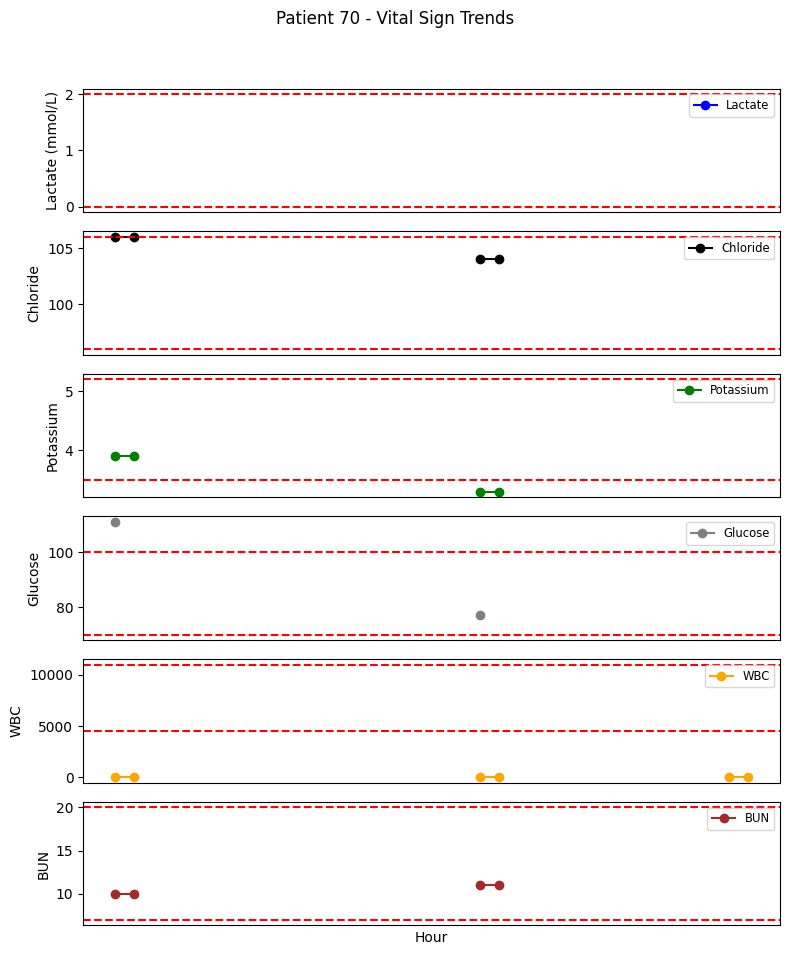

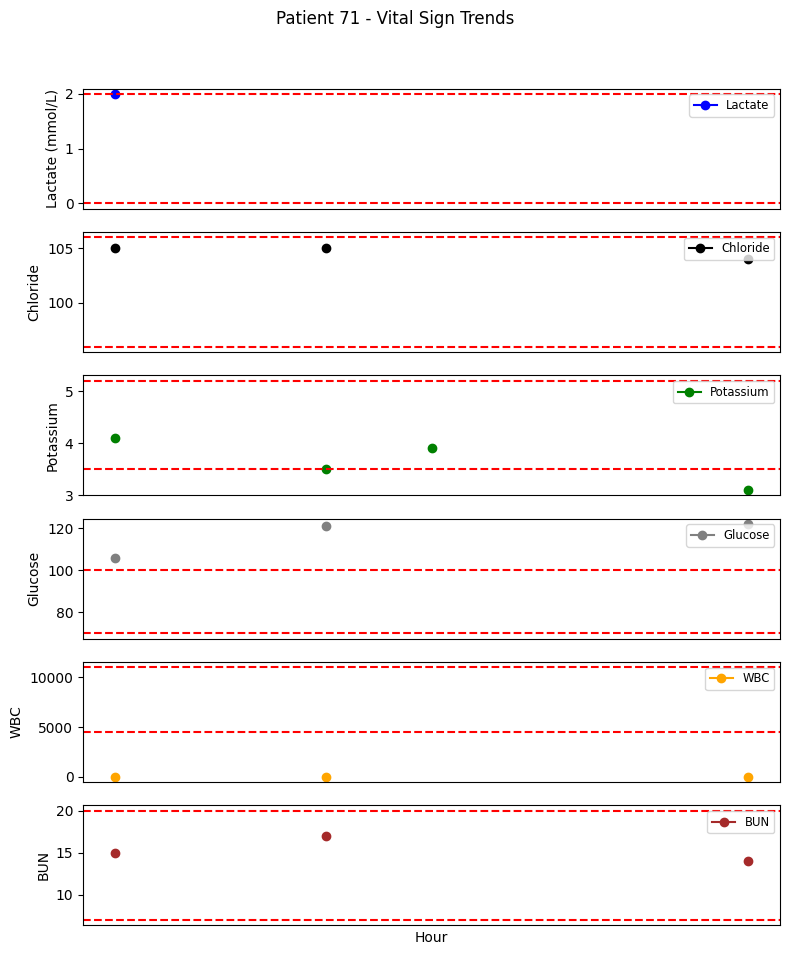

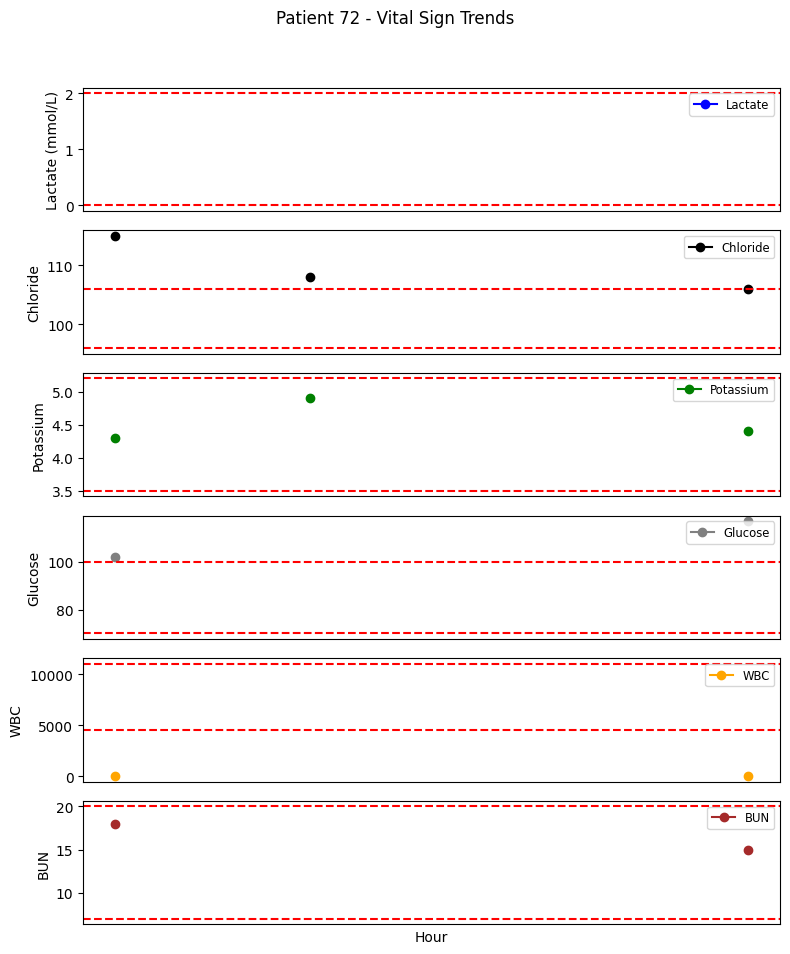

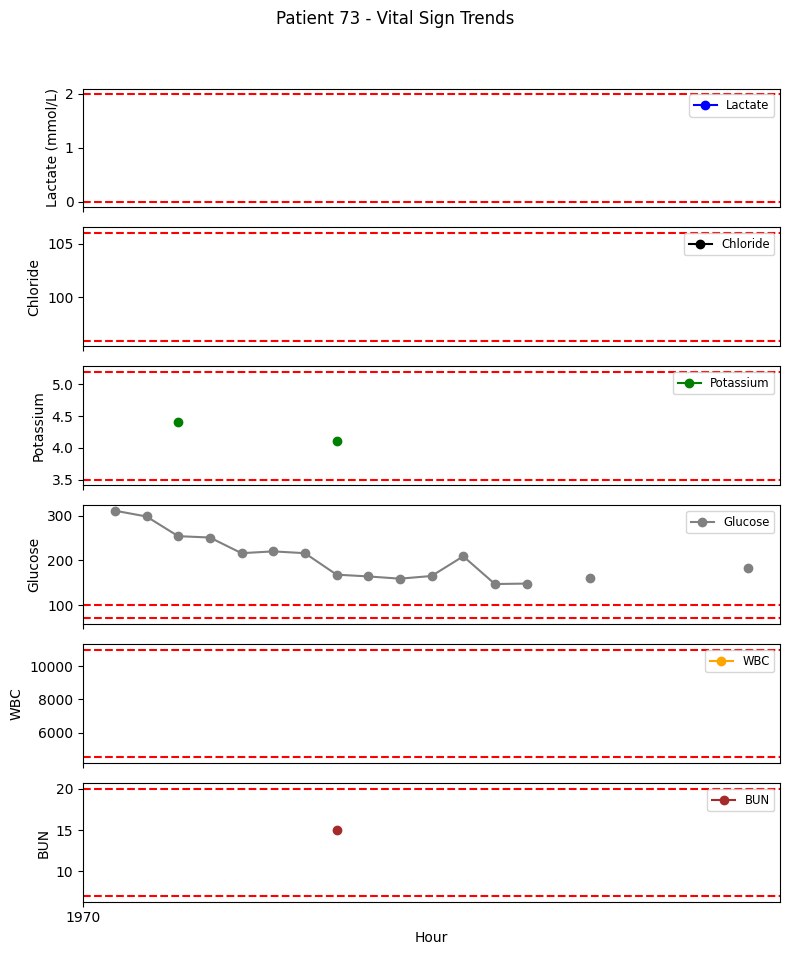

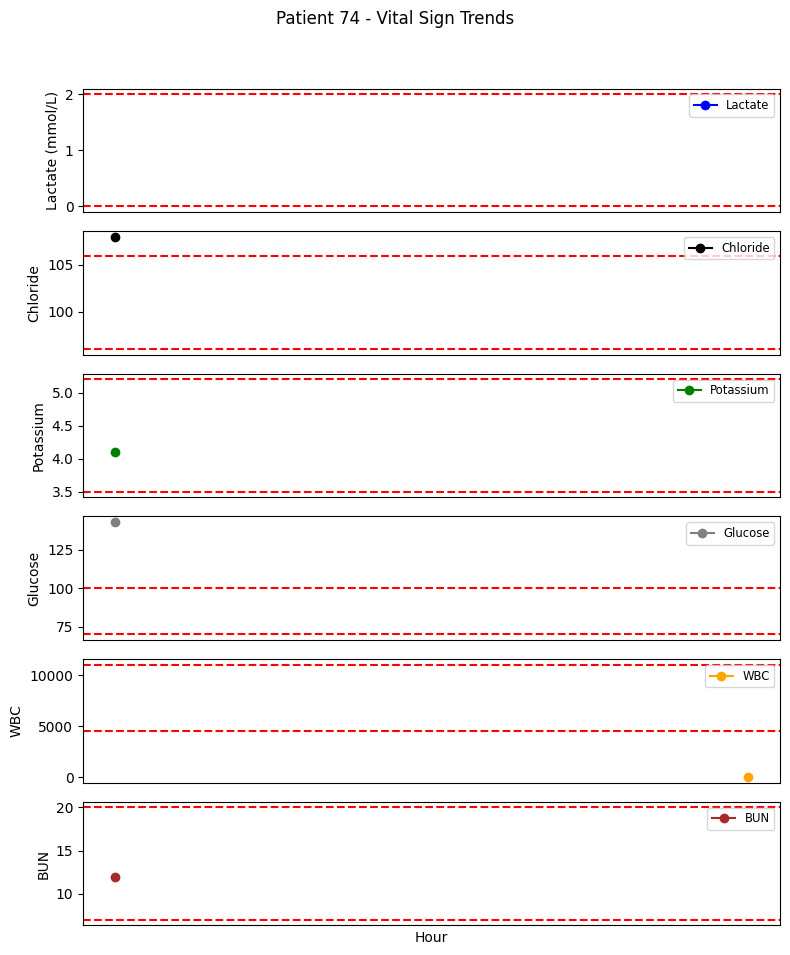

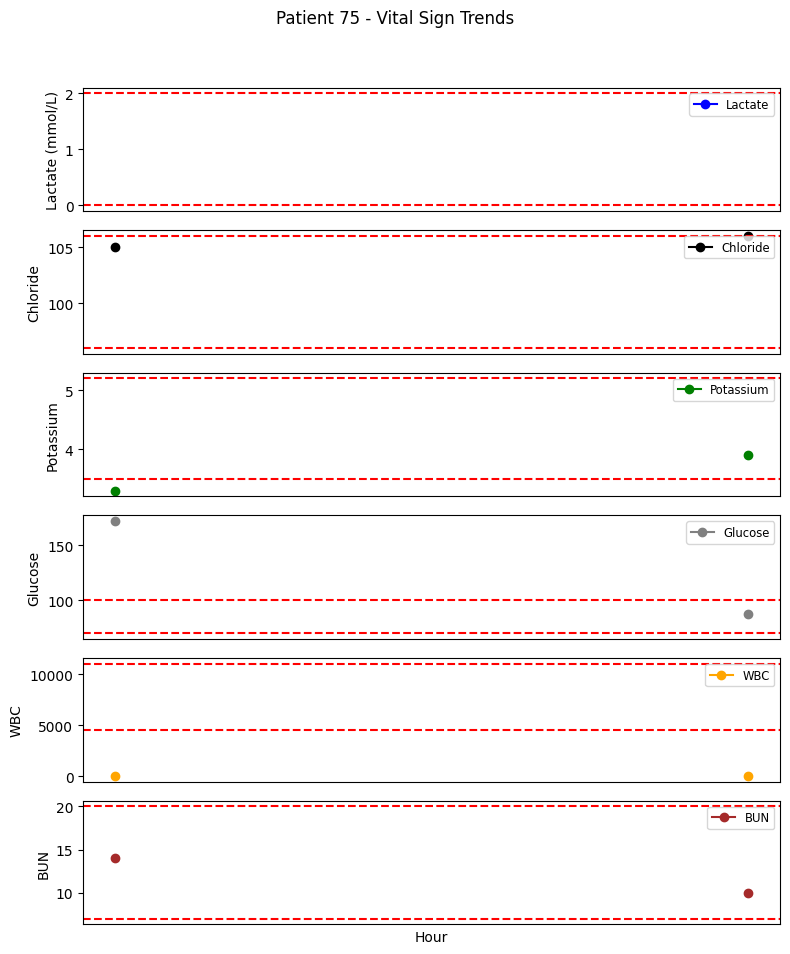

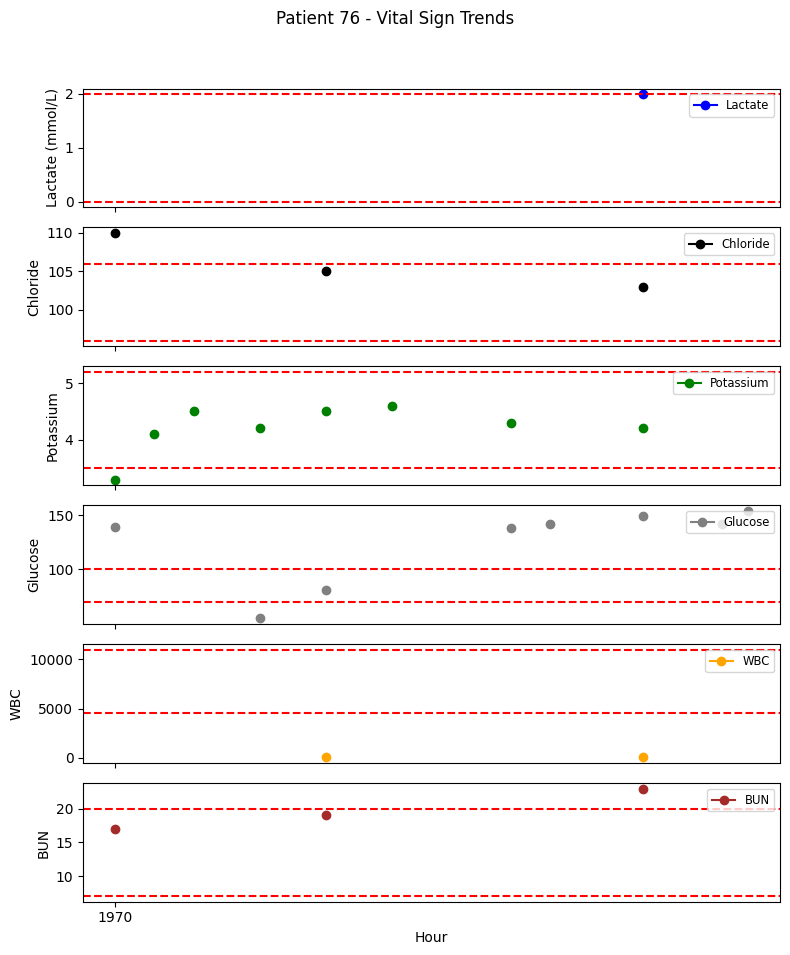

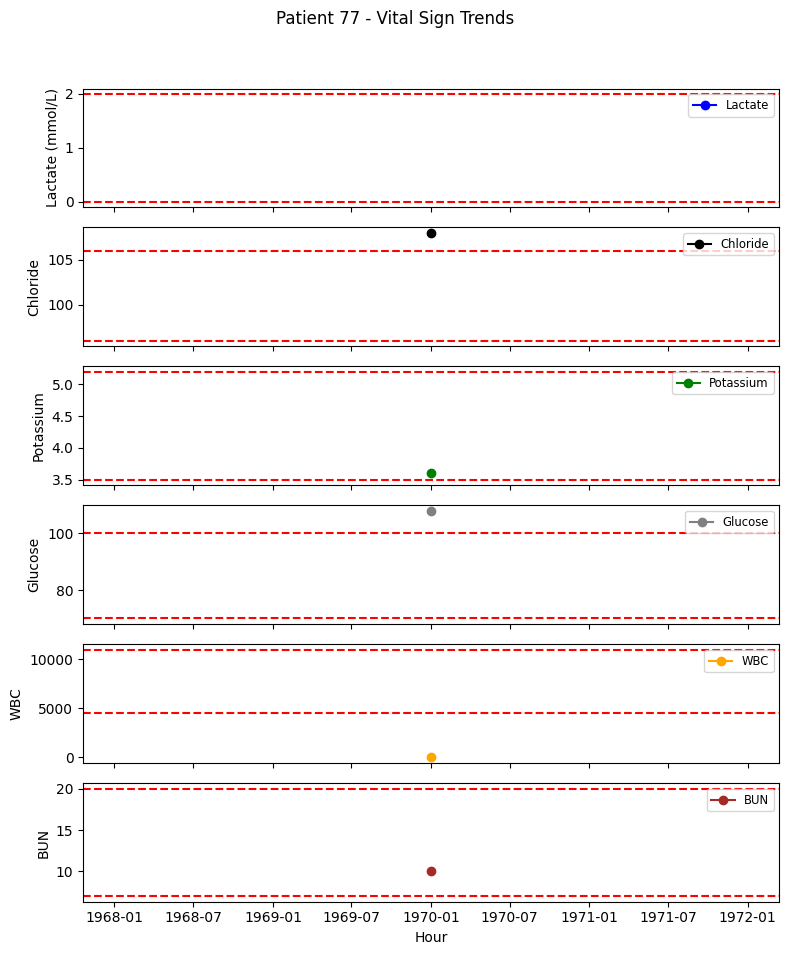

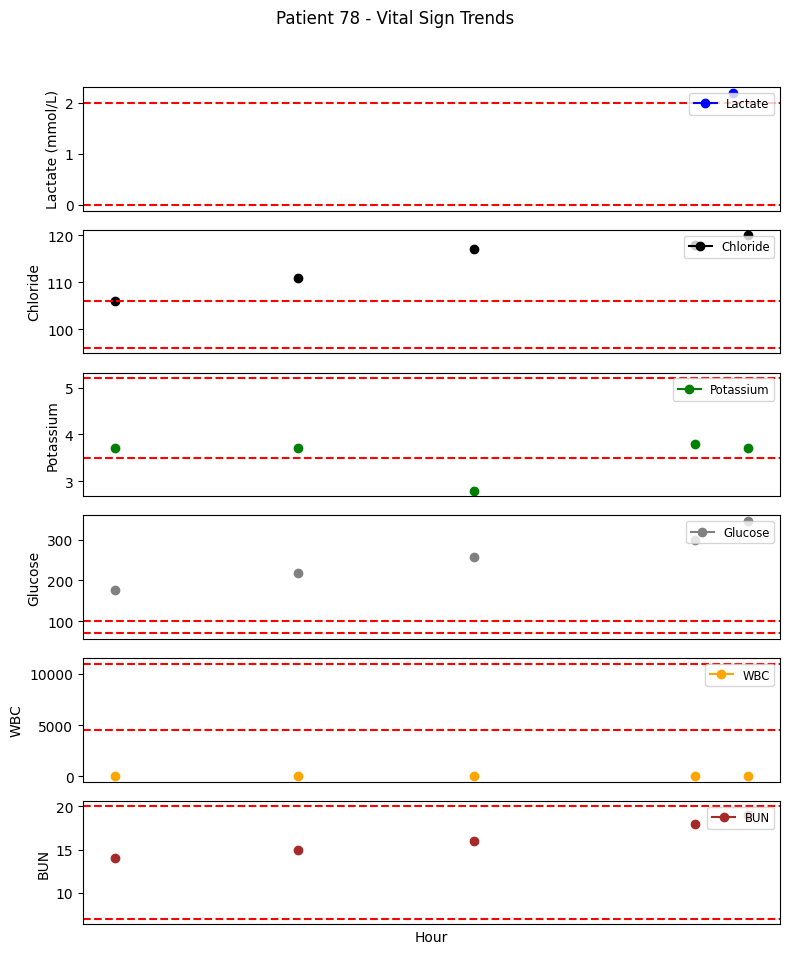

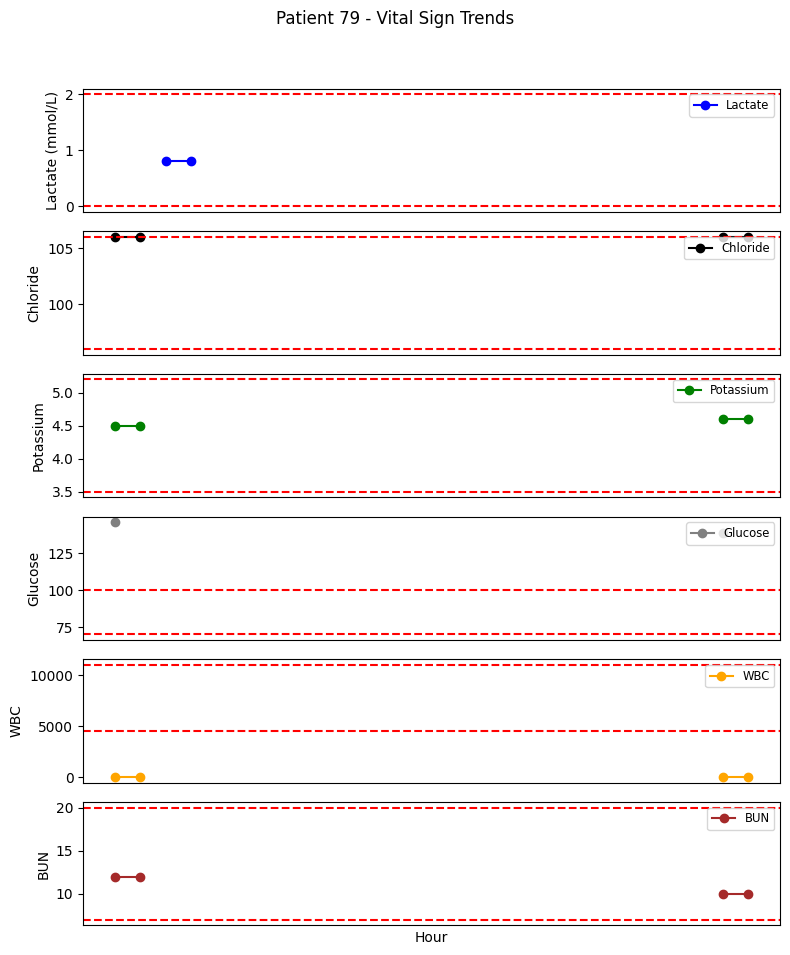

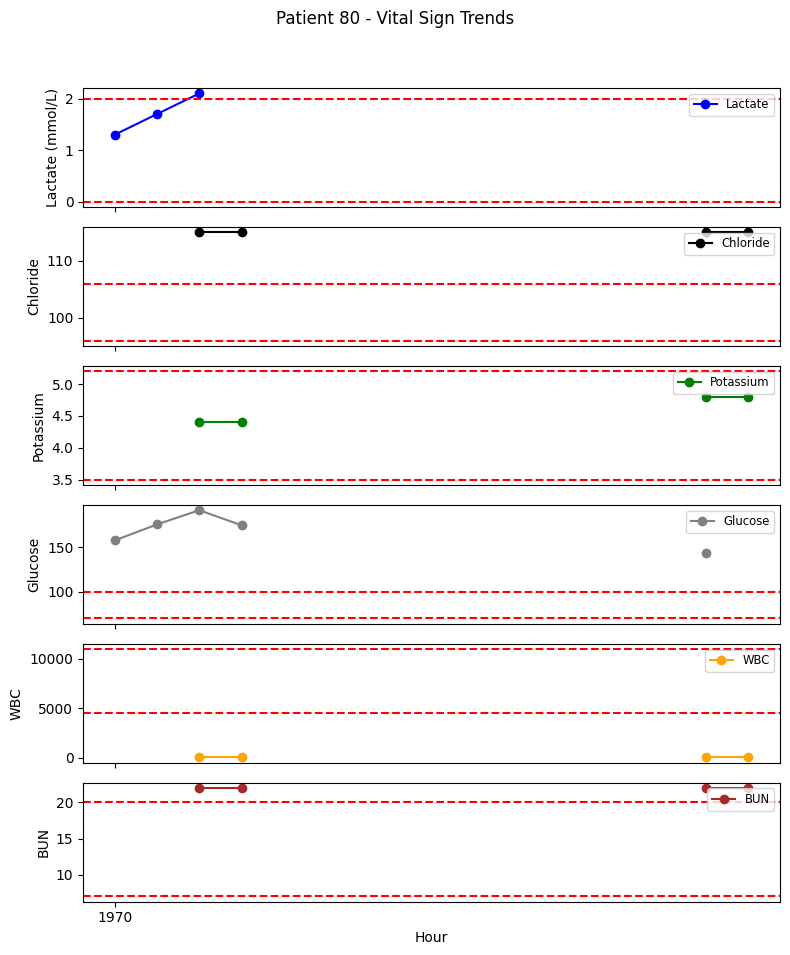

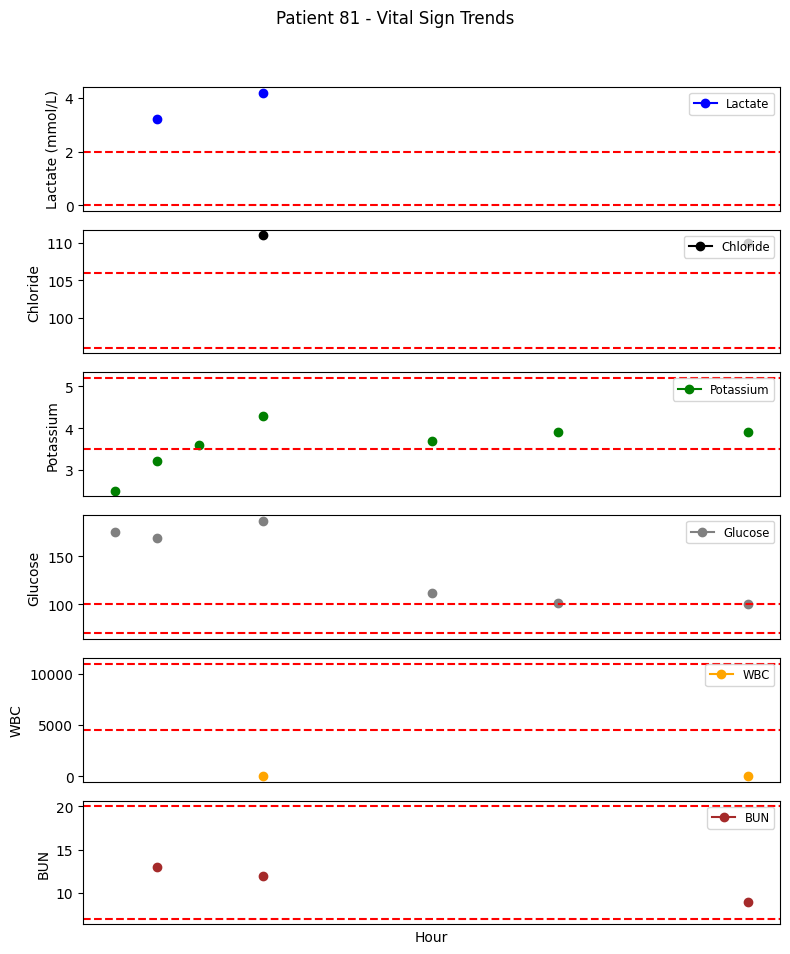

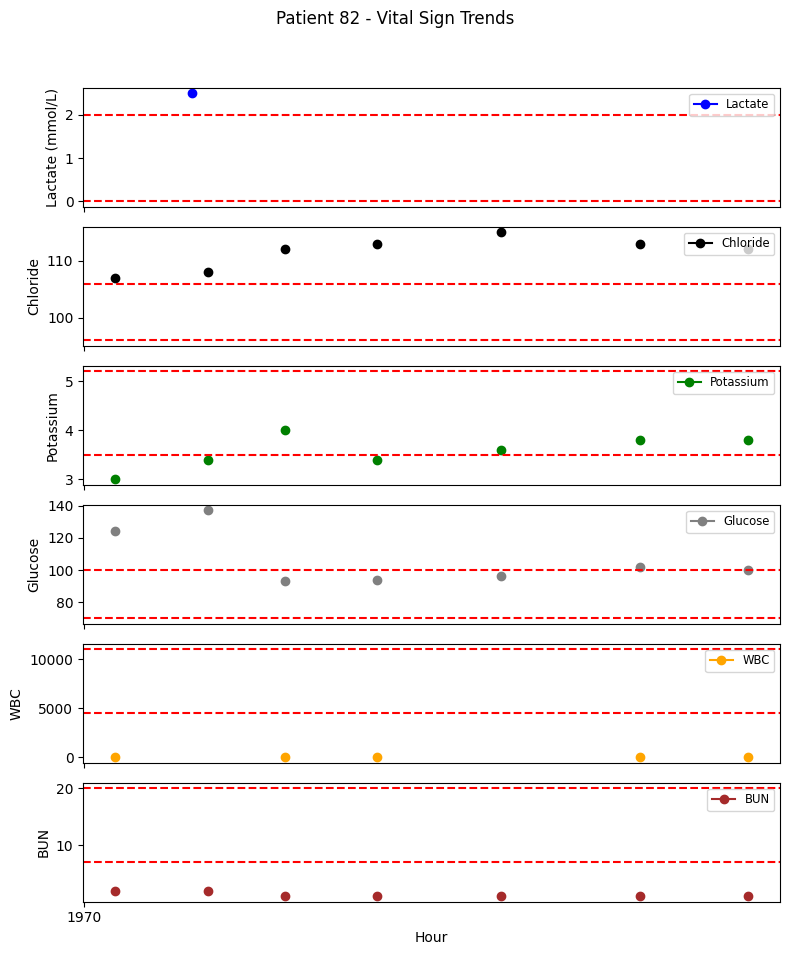

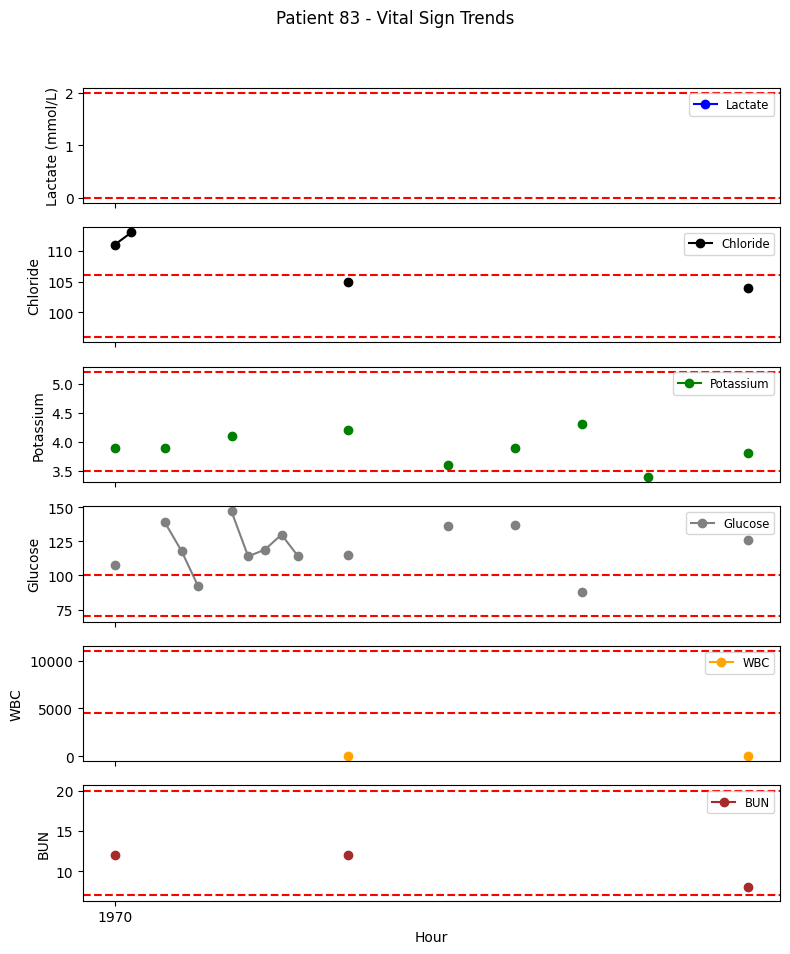

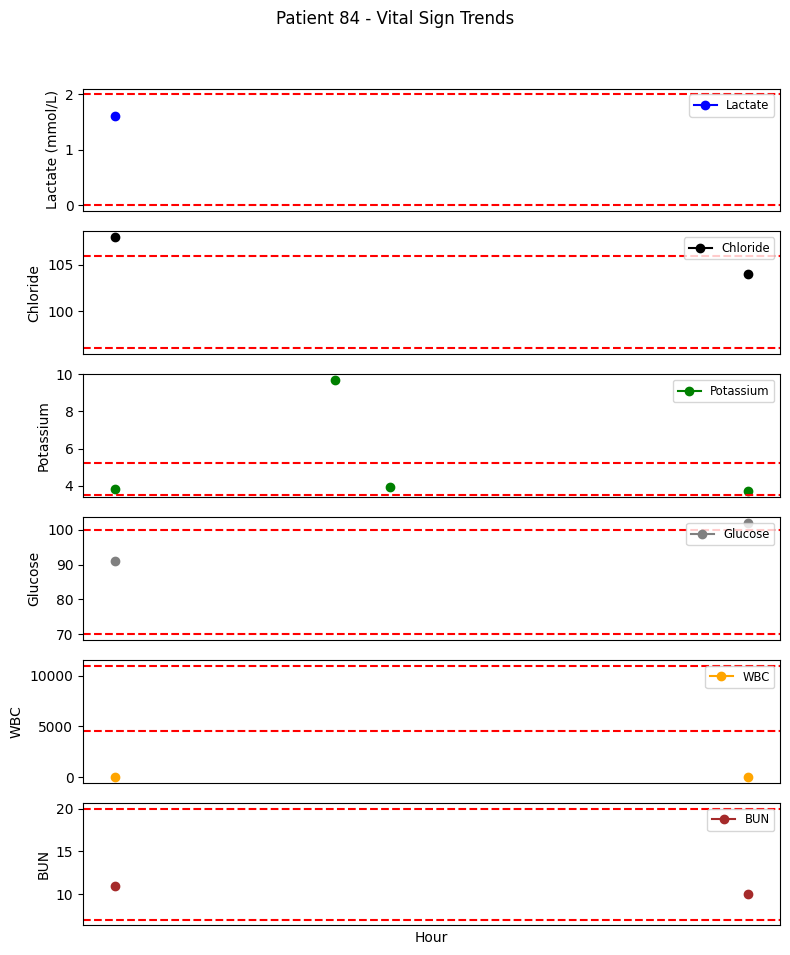

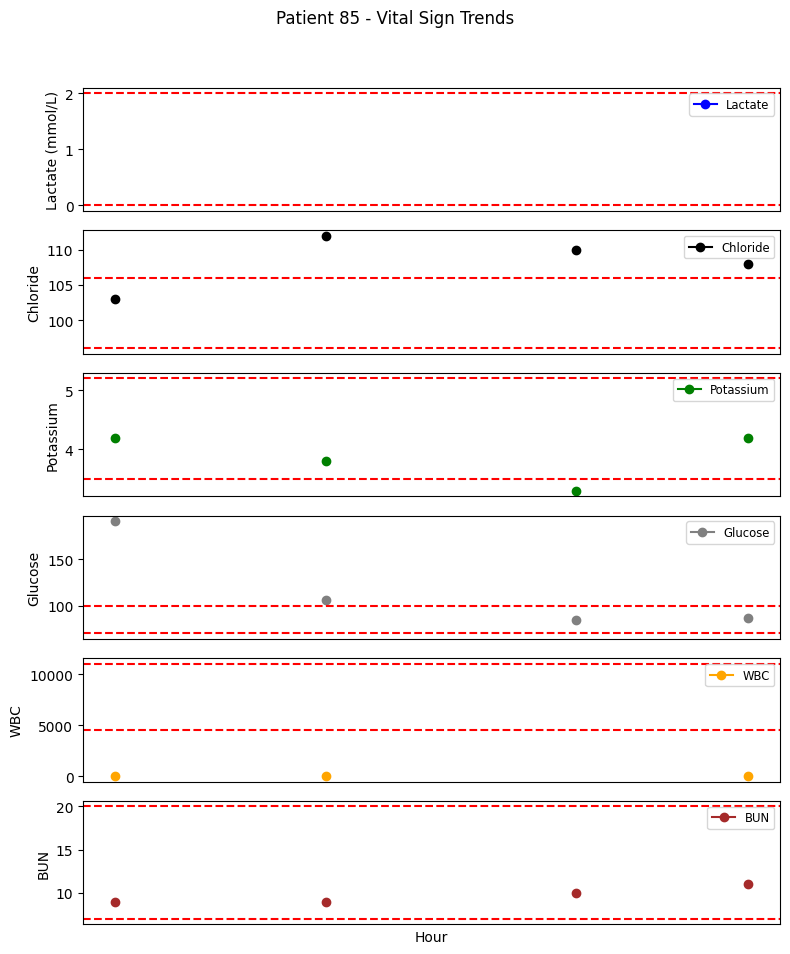

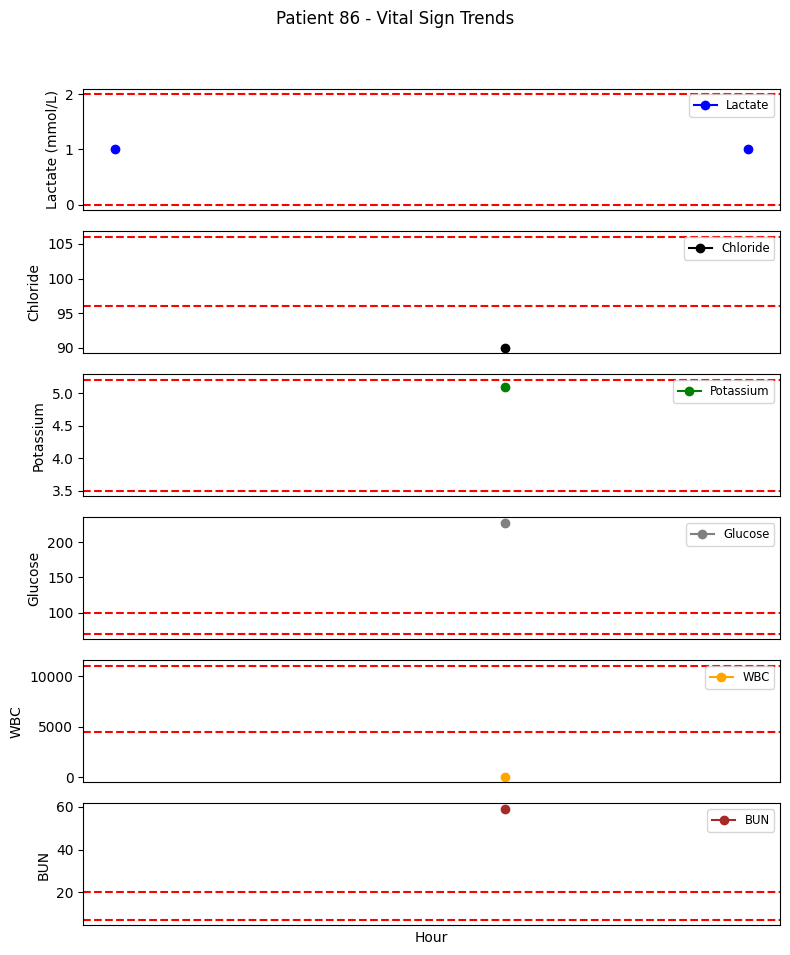

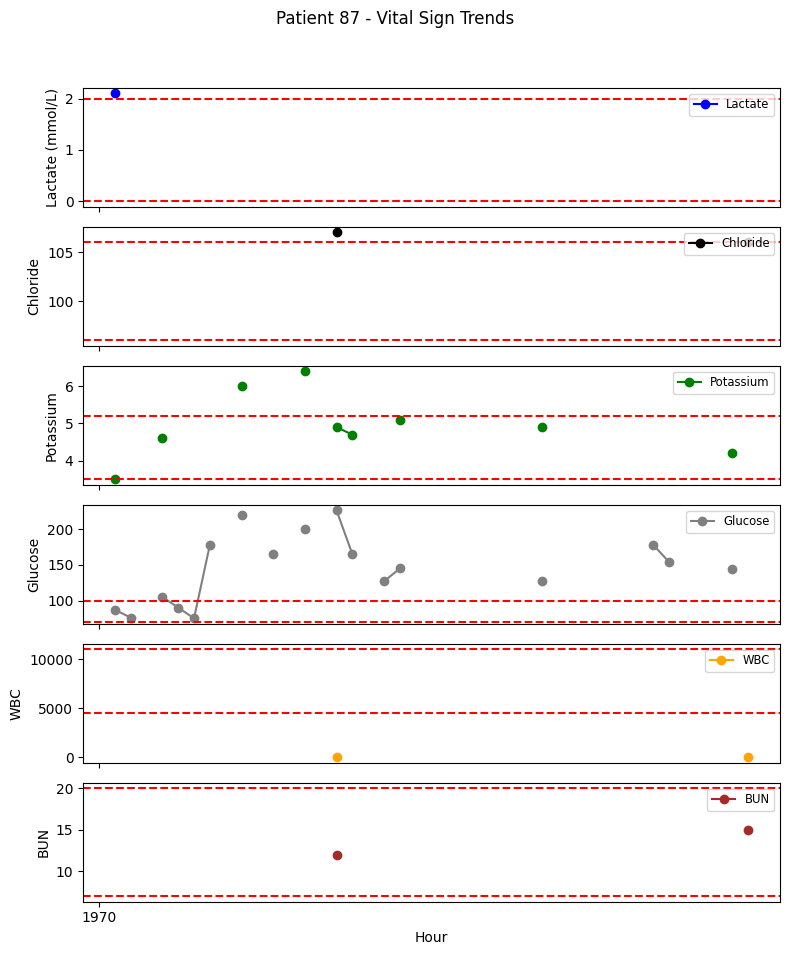

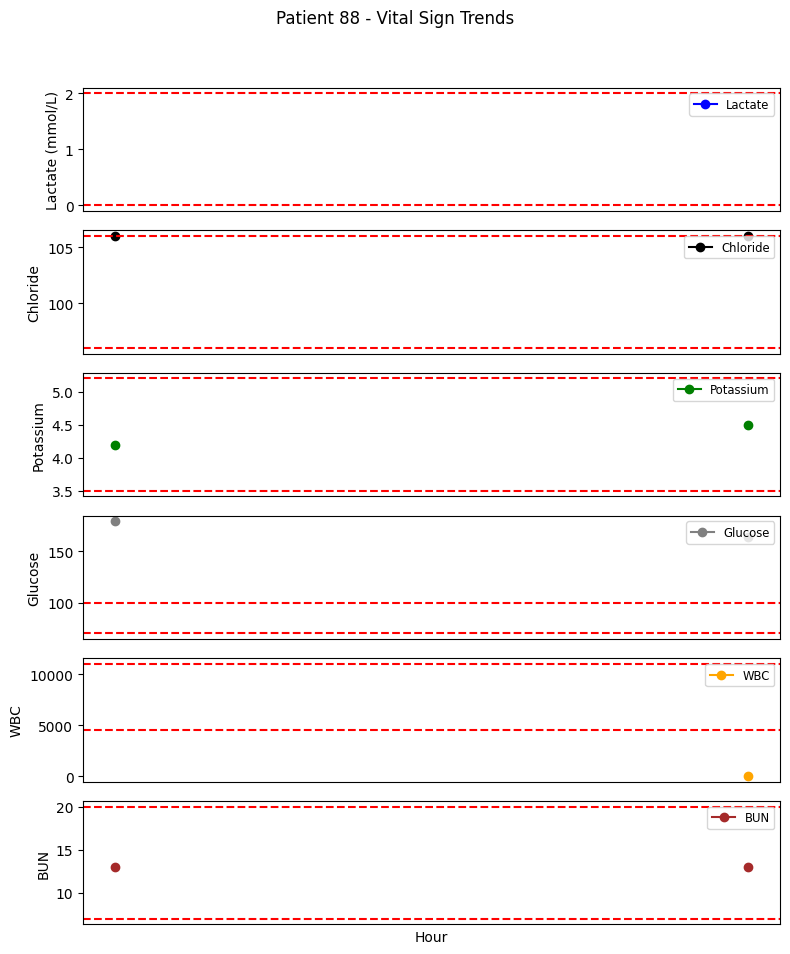

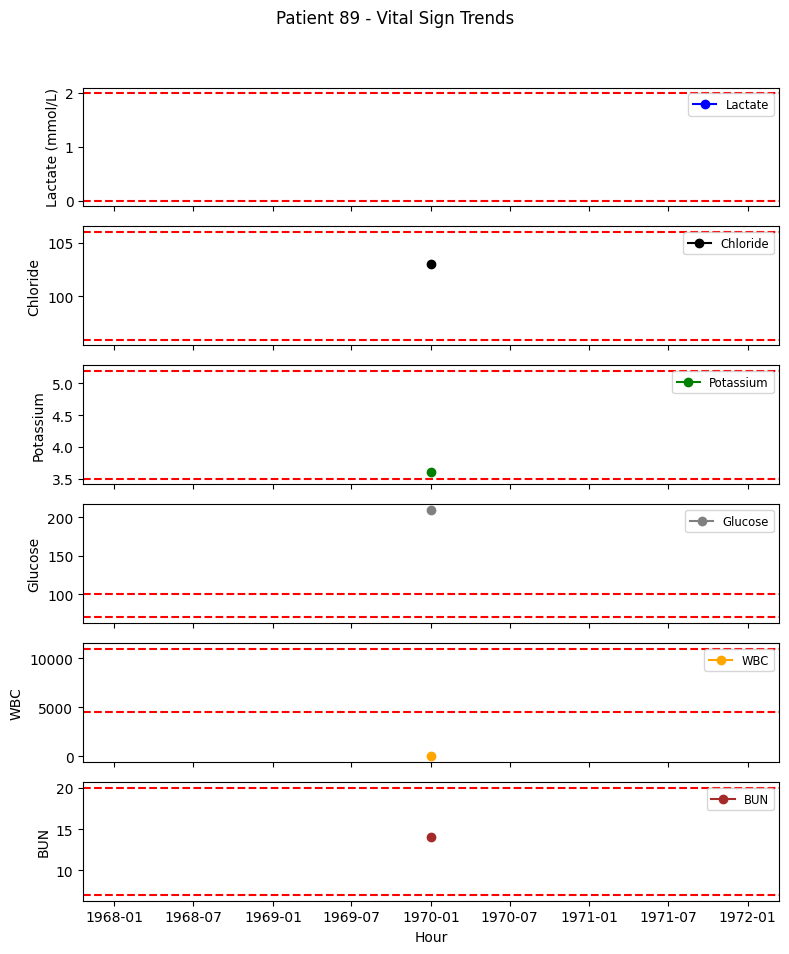

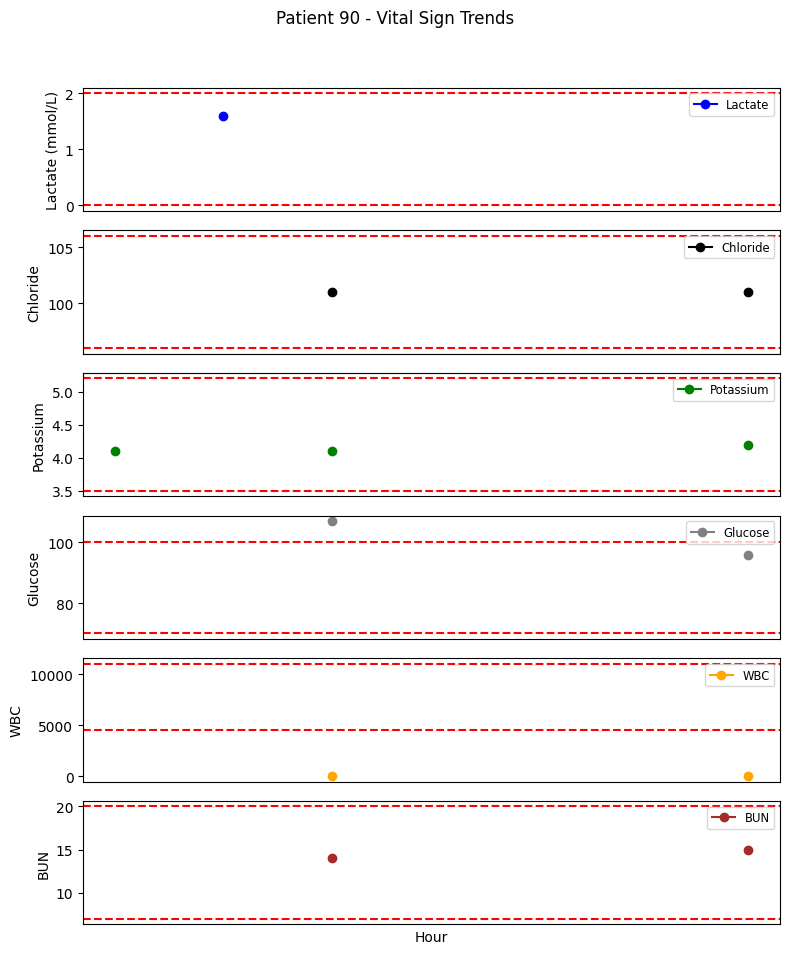

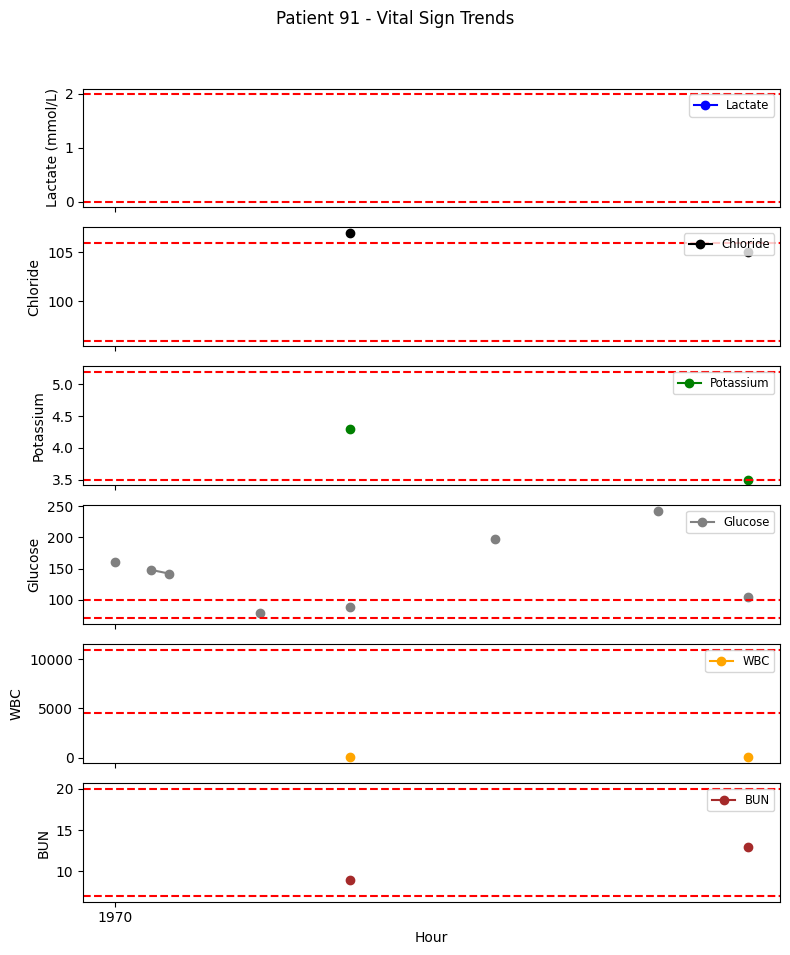

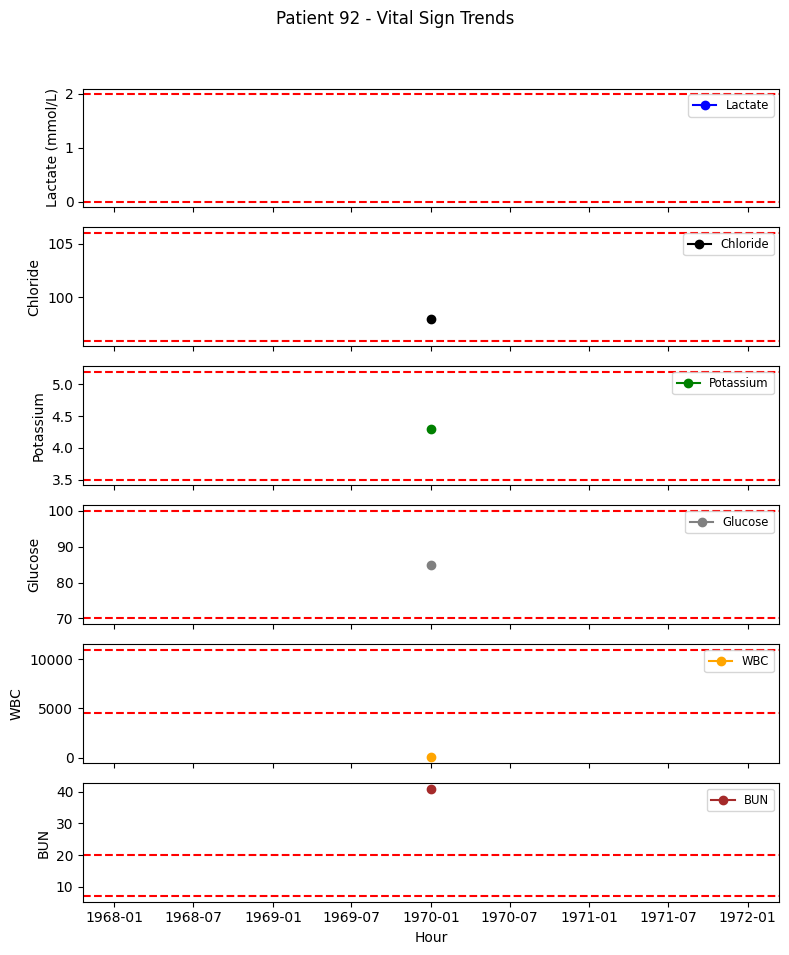

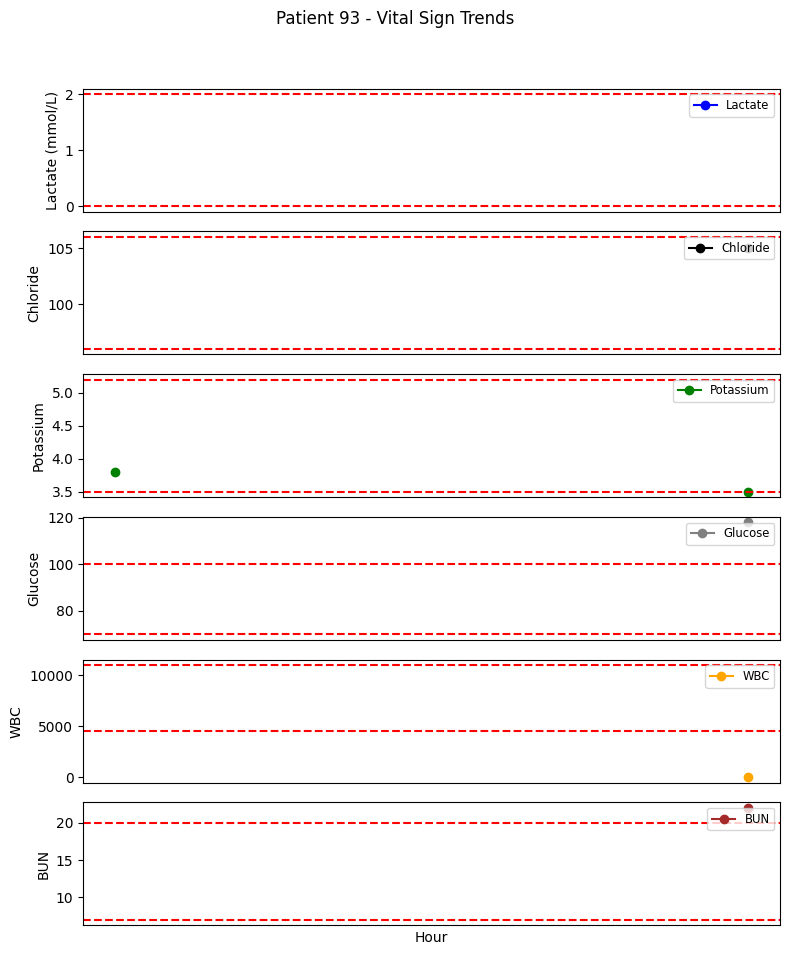

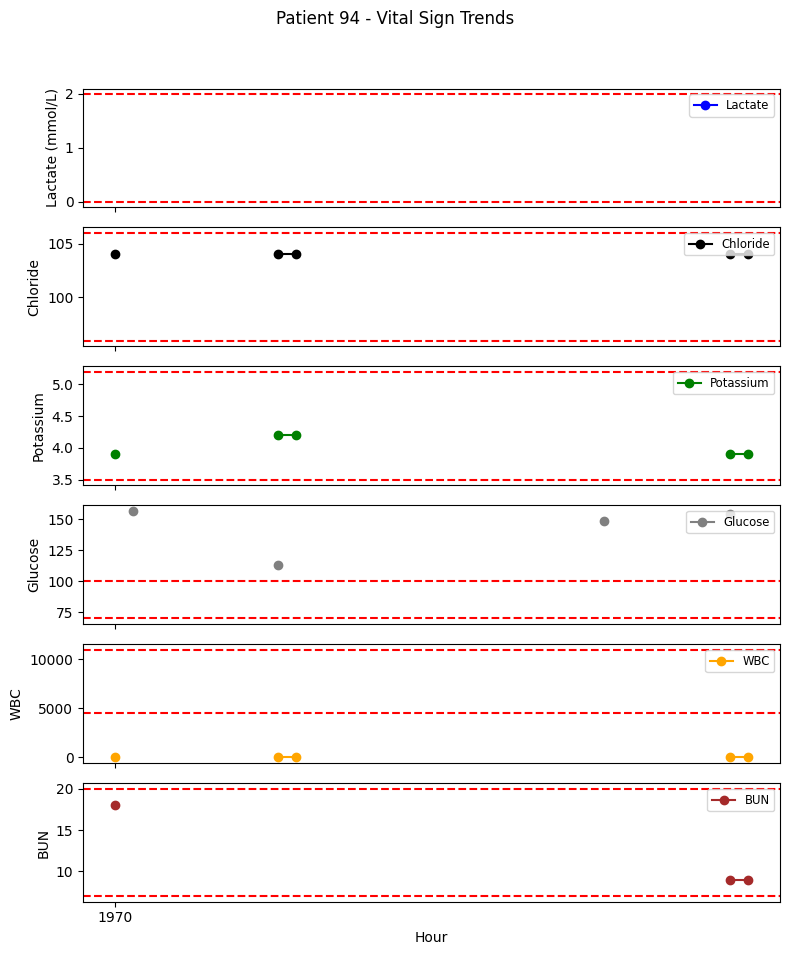

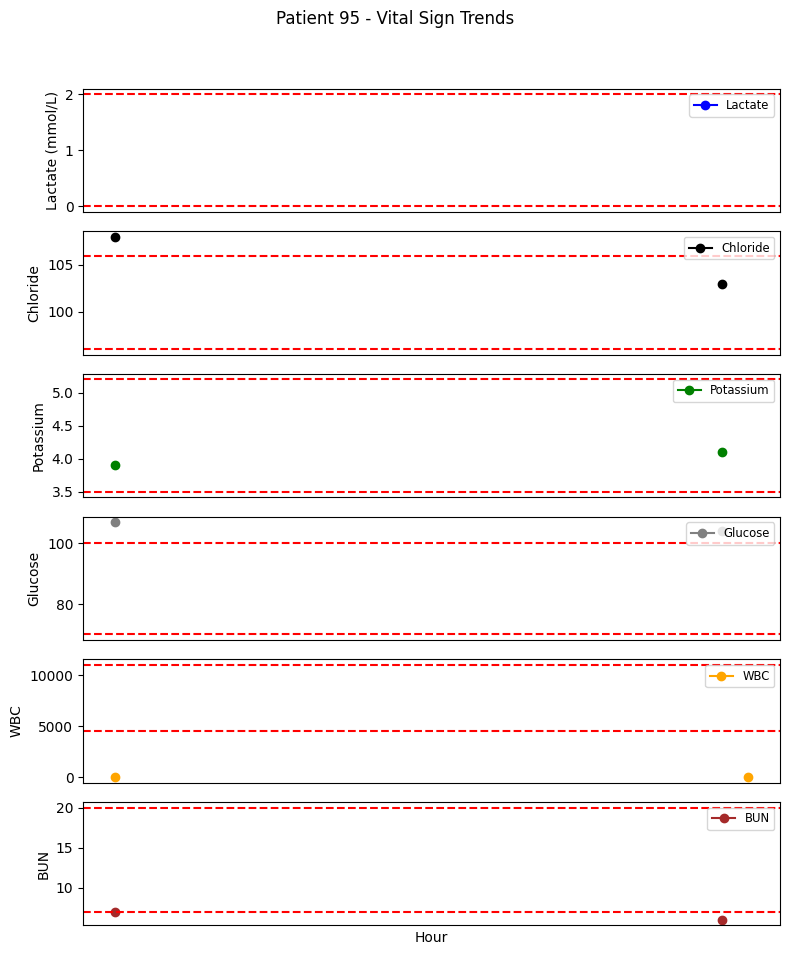

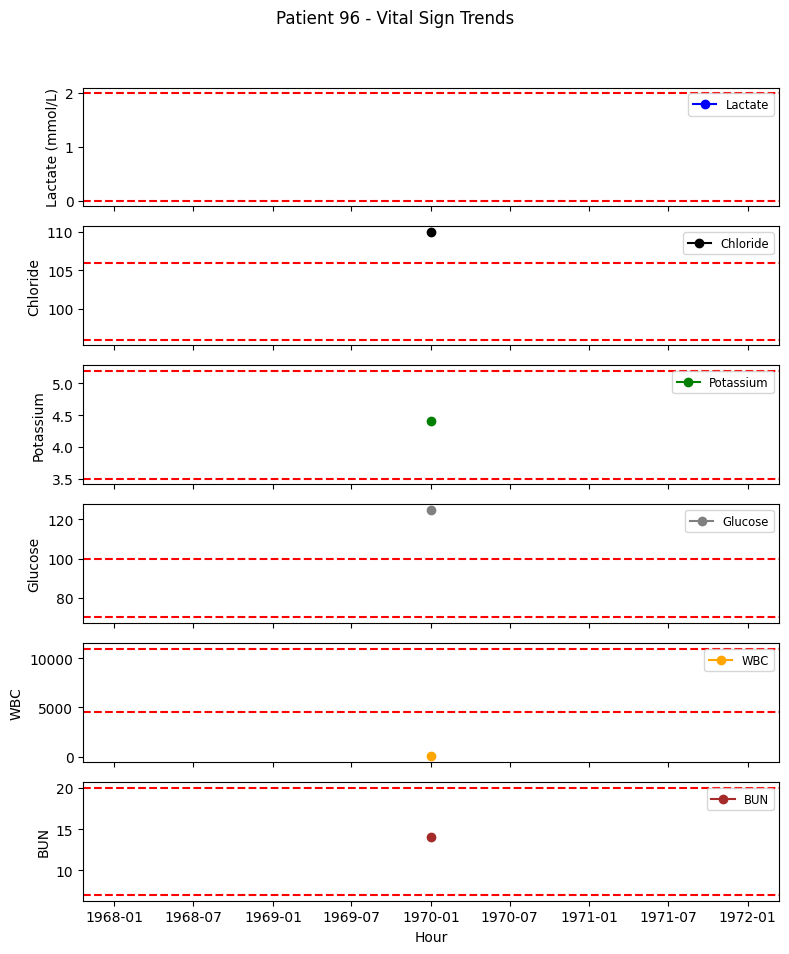

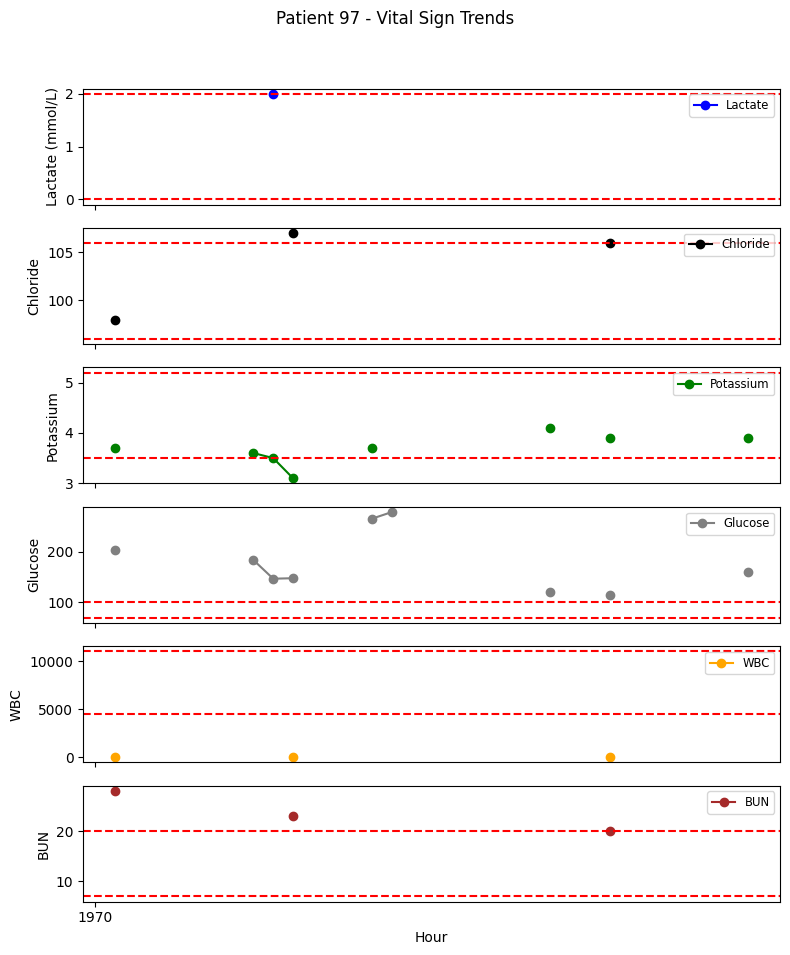

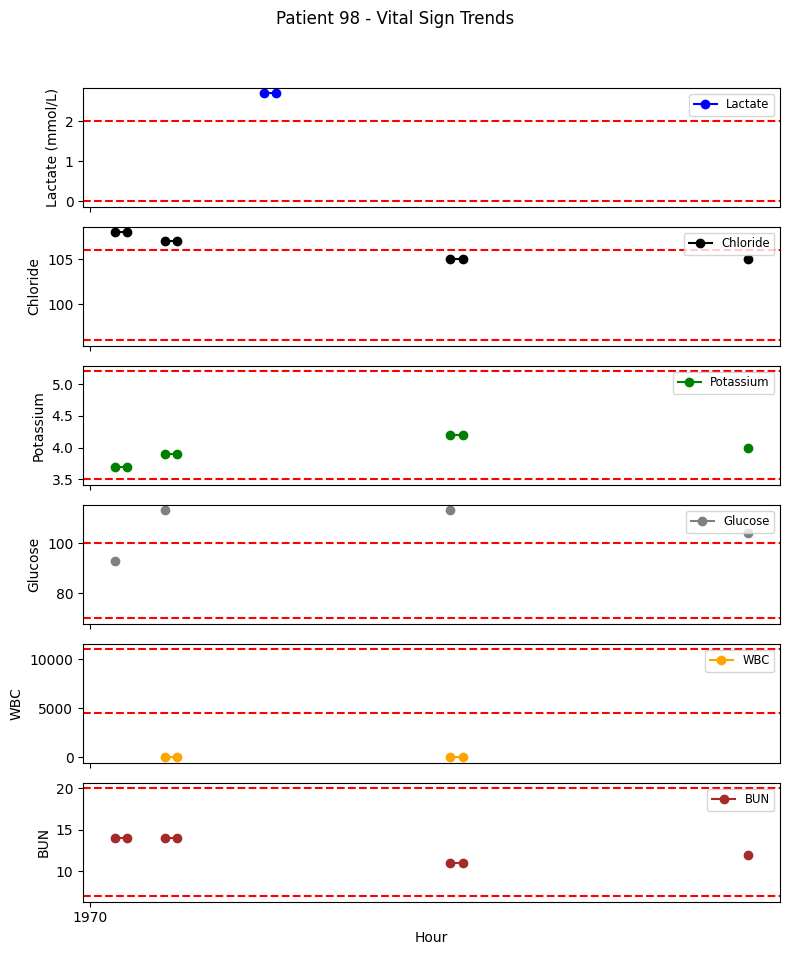

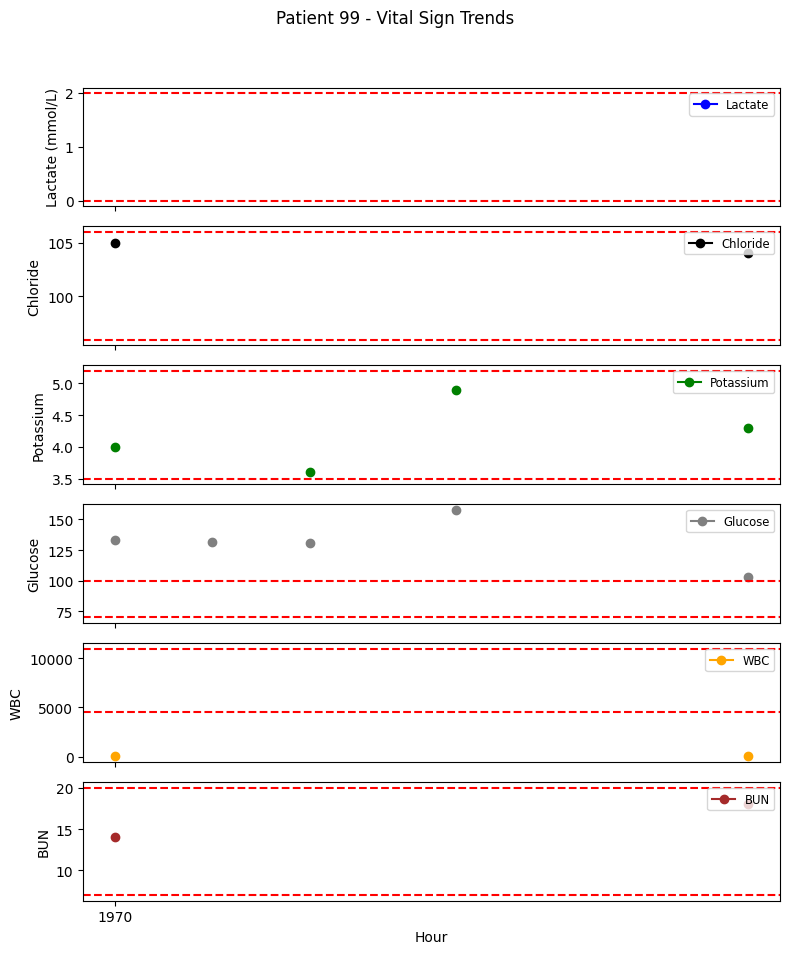

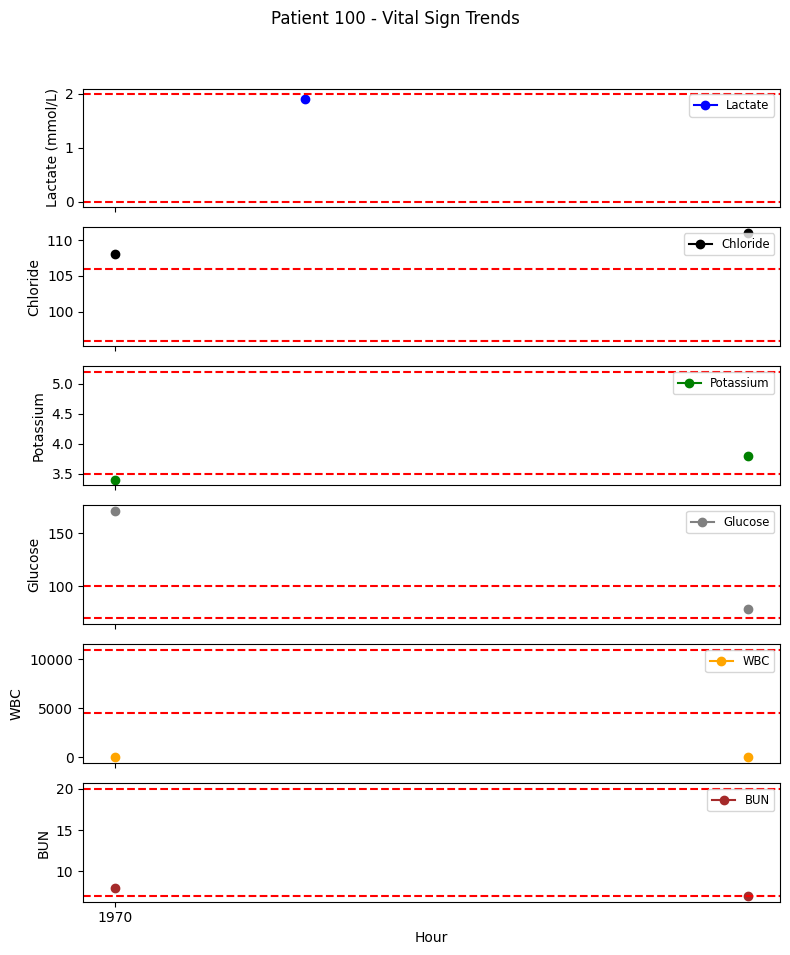

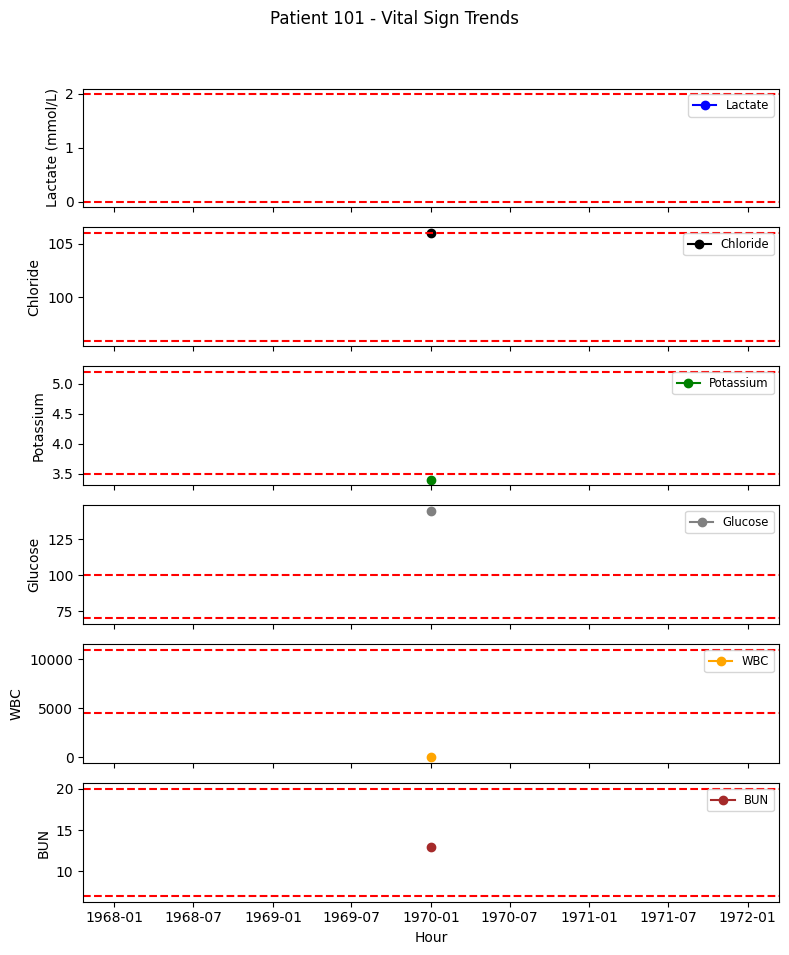

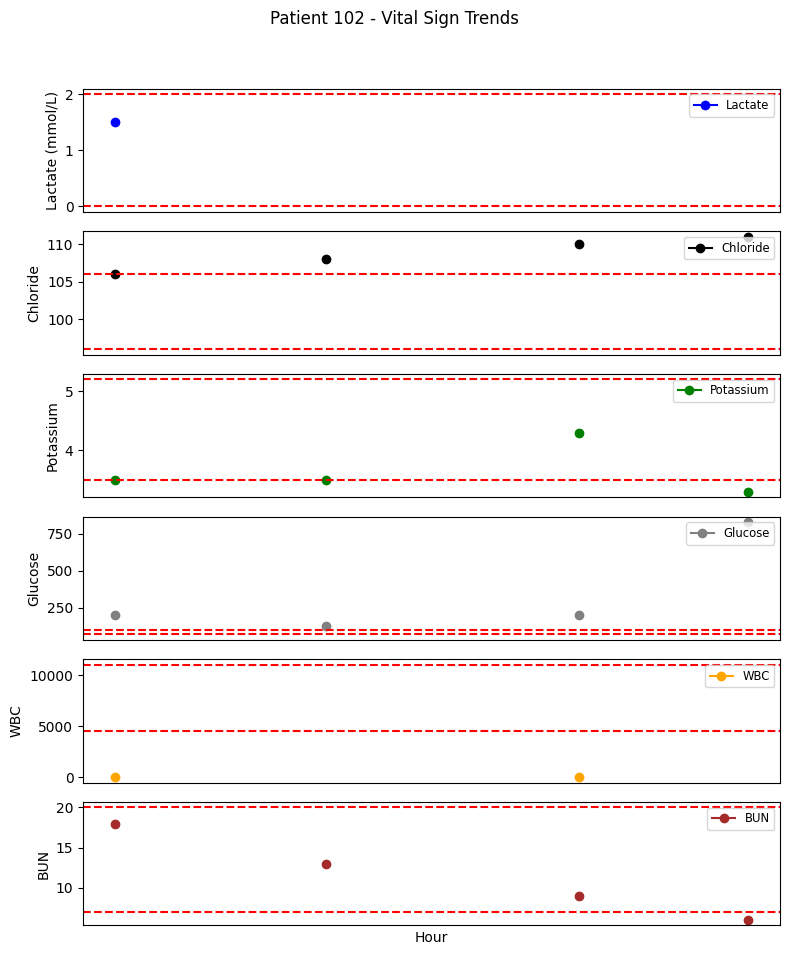

KeyboardInterrupt: 

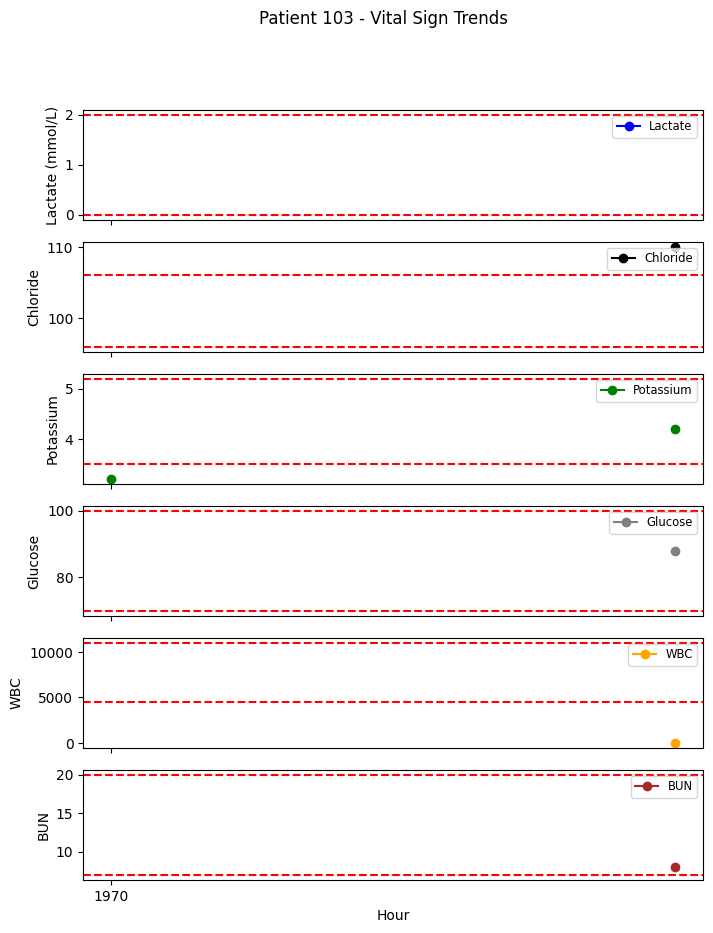

In [9]:
# Group data by 'Patient_ID'
grouped_data = data.groupby('Patient_ID')

# Threshold values (using tuples for threshold ranges)
thresholds = {
    'Lactate': (0,2),  
    'Chloride': (96,106),
    'Potassium': (3.5, 5.2),
    'Glucose' : (70,100),
    'WBC' : (4500,11000),
    'BUN' : (7,20)
}

# Define vital signs and their colors
vital_signs = ['Lactate', 'Chloride', 'Potassium', 'Glucose', 'WBC', 'BUN']
colors = {'Lactate': 'blue', 'Chloride': 'black', 'Potassium': 'green', 'Glucose': 'gray', 'WBC': 'orange', 'BUN': 'brown'}

# Iterate through each patient group
for patient_id, patient_data in grouped_data:
    # Parse DateTime column as datetime
    patient_data['Hour'] = pd.to_datetime(patient_data['Hour'])
    
    # Create a 4-row grid for subplots
    fig, axs = plt.subplots(6, 1, figsize=(8, 10), sharex=True)  # sharex=True ensures the x-axis is shared
    
    # Plot each vital sign in a separate subplot
    for i, vital_sign in enumerate(vital_signs):
        ax = axs[i]  # Get the current subplot
        
        # Plot vital sign data with different colors based on the specified colors dictionary
        vital_color = colors.get(vital_sign, 'red')  # Default color is red
        ax.plot(patient_data['Hour'], patient_data[vital_sign], marker='o', linestyle='-', color=vital_color, label=vital_sign)

        # Plot threshold lines
        lower_threshold, upper_threshold = thresholds.get(vital_sign, (None, None))
        if lower_threshold is not None:
            ax.axhline(y=lower_threshold, color='r', linestyle='--')
        if upper_threshold is not None:
            ax.axhline(y=upper_threshold, color='r', linestyle='--')
        
        # Set y-axis labels for each vital sign
        if vital_sign == 'Lactate':
            ax.set_ylabel('Lactate (mmol/L)')
        elif vital_sign == 'Chloride':
            ax.set_ylabel('Chloride')
        elif vital_sign == 'Potassium':
            ax.set_ylabel('Potassium')
        elif vital_sign == 'Glucose':
            ax.set_ylabel('Glucose')
        elif vital_sign == 'WBC':
            ax.set_ylabel('WBC')
        else:
            ax.set_ylabel('BUN')
            
        
        # Check if vital sign is outside of the threshold range
        lower_threshold_alert = (patient_data[vital_sign] < lower_threshold).any() if lower_threshold else False
        upper_threshold_alert = (patient_data[vital_sign] > upper_threshold).any() if upper_threshold else False
    
    # Set x-axis label only for the bottom subplot
    axs[-1].set_xlabel('Hour')
    
    # Set a title for the entire plot (general plot for each patient)
    plt.suptitle(f'Patient {patient_id} - Vital Sign Trends')
    
    # Add a legend for each subplot
    for ax in axs:
        ax.legend(loc='upper right', fontsize='small')
    
    # Adjust layout and show the plot for the current patient
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add space at the top for the suptitle
    plt.show()
